In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#df = pd.read_table("./data/donnees_credit.txt", header=0, index_col=False, delimiter="\t", encoding="utf-8")
df = pd.read_csv("./data/bank-preprocessed2.csv", sep = ',', index_col= 0)

In [3]:
df

age          job  marital          education default  housing  \
0     18-30  blue-collar  married           basic.9y      no      yes   
1     30-40     services   single        high.school      no       no   
2     18-30     services  married        high.school      no      yes   
3     30-40     services  married           basic.9y      no  unknown   
4     40-50       admin.  married  university.degree      no      yes   
...     ...          ...      ...                ...     ...      ...   
4114  18-30       admin.  married           basic.6y      no      yes   
4115  30-40       admin.  married        high.school      no      yes   
4116  18-30      student   single        high.school      no       no   
4117    50+       admin.  married        high.school      no       no   
4118  30-40   management   single        high.school      no      yes   

         loan    contact month day_of_week  campaign  previous   y  
0          no   cellular   may         fri         2         0  no  
1          no  telephone   may         fri         4         0  no  
2          no  telephone   jun         wed         1         0  no  
3     unknown  telephone   jun         fri         3         0  no  
4          no   cellular   nov         mon         1         0  no  
...       ...        ...   ...         ...       ...       ...  ..  
4114      yes   cellular   jul         thu         1         0  no  
4115       no  telephone   jul         fri         1         0  no  
4116       no   cellular   may         mon         2         1  no  
4117       no   cellular   aug         fri         1         0  no  
4118       no   cellular   nov         wed         1         0  no  

[4119 rows x 13 columns]

In [23]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
y = pd.DataFrame(LabelEncoder().fit_transform(df['y']))

df['previous'].corr(y)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3904 and the array at index 1 has size 1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4119 entries, 0 to 4118
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4119 non-null   object
 1   job          4119 non-null   object
 2   marital      4119 non-null   object
 3   education    4119 non-null   object
 4   default      4119 non-null   object
 5   housing      4119 non-null   object
 6   loan         4119 non-null   object
 7   contact      4119 non-null   object
 8   month        4119 non-null   object
 9   day_of_week  4119 non-null   object
 10  campaign     4119 non-null   int64 
 11  previous     4119 non-null   int64 
 12  y            4119 non-null   object
dtypes: int64(2), object(11)
memory usage: 450.5+ KB


In [5]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
campaign       0
previous       0
y              0
dtype: int64

#### ATTENTION: il y a des duplicats

In [6]:
df.duplicated().sum()

109

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4010 entries, 0 to 4118
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4010 non-null   object
 1   job          4010 non-null   object
 2   marital      4010 non-null   object
 3   education    4010 non-null   object
 4   default      4010 non-null   object
 5   housing      4010 non-null   object
 6   loan         4010 non-null   object
 7   contact      4010 non-null   object
 8   month        4010 non-null   object
 9   day_of_week  4010 non-null   object
 10  campaign     4010 non-null   int64 
 11  previous     4010 non-null   int64 
 12  y            4010 non-null   object
dtypes: int64(2), object(11)
memory usage: 438.6+ KB


In [9]:
for col in ["campaign", "previous"]:
    df[col] = df[col].astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4010 entries, 0 to 4118
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4010 non-null   object
 1   job          4010 non-null   object
 2   marital      4010 non-null   object
 3   education    4010 non-null   object
 4   default      4010 non-null   object
 5   housing      4010 non-null   object
 6   loan         4010 non-null   object
 7   contact      4010 non-null   object
 8   month        4010 non-null   object
 9   day_of_week  4010 non-null   object
 10  campaign     4010 non-null   object
 11  previous     4010 non-null   object
 12  y            4010 non-null   object
dtypes: object(13)
memory usage: 438.6+ KB


In [11]:
df.to_csv('./data/bank-prepocessed-cleaned.csv')

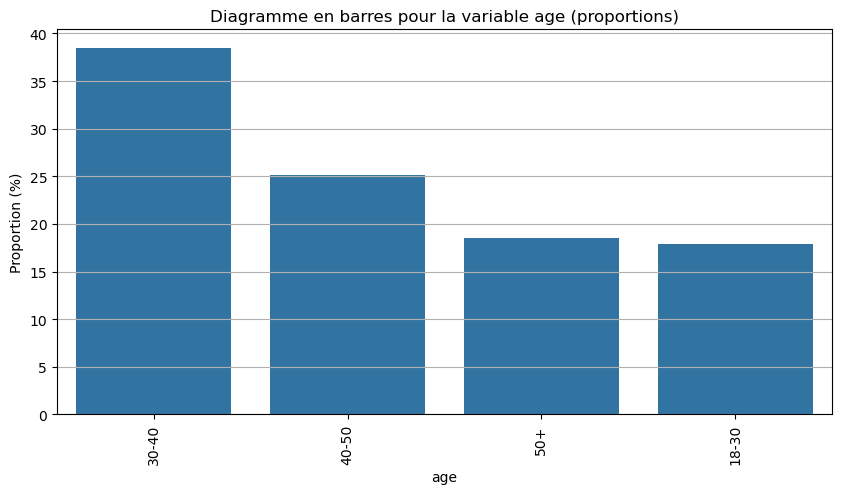

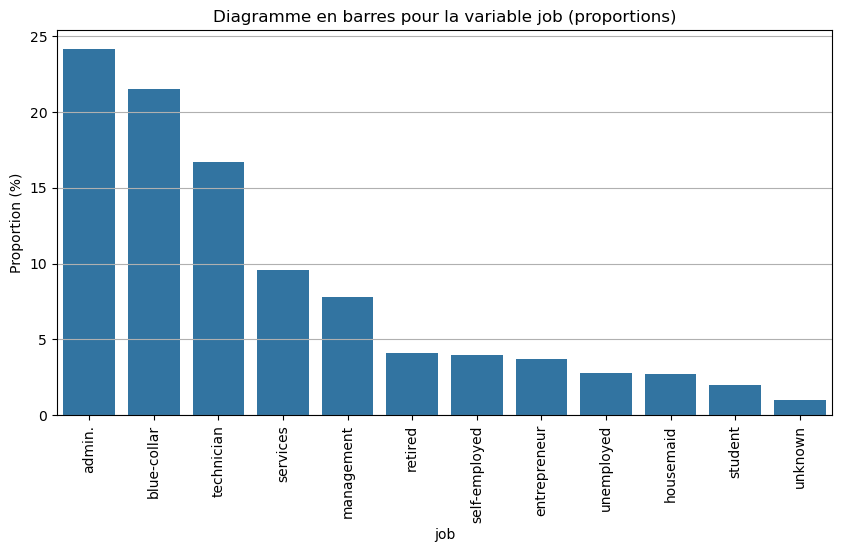

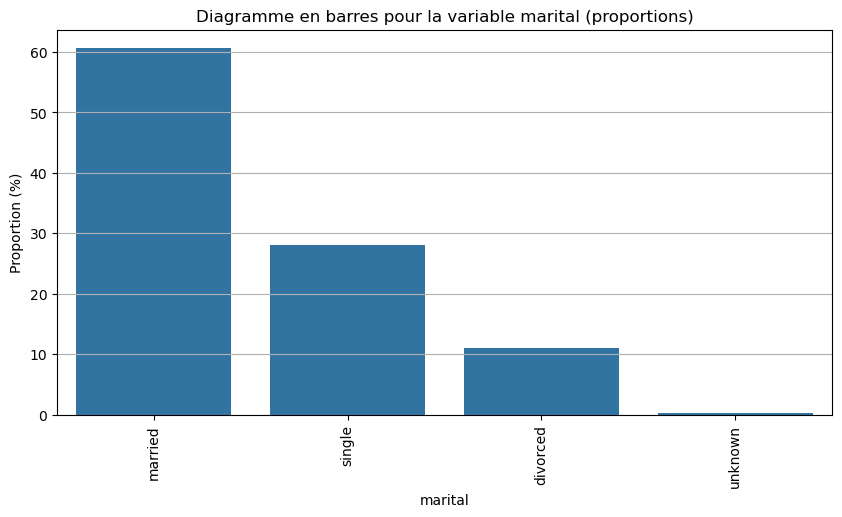

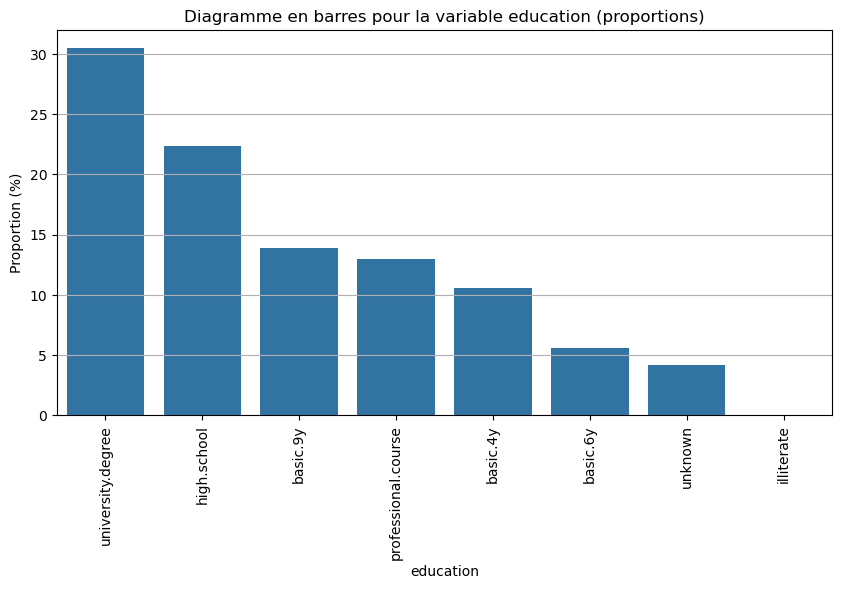

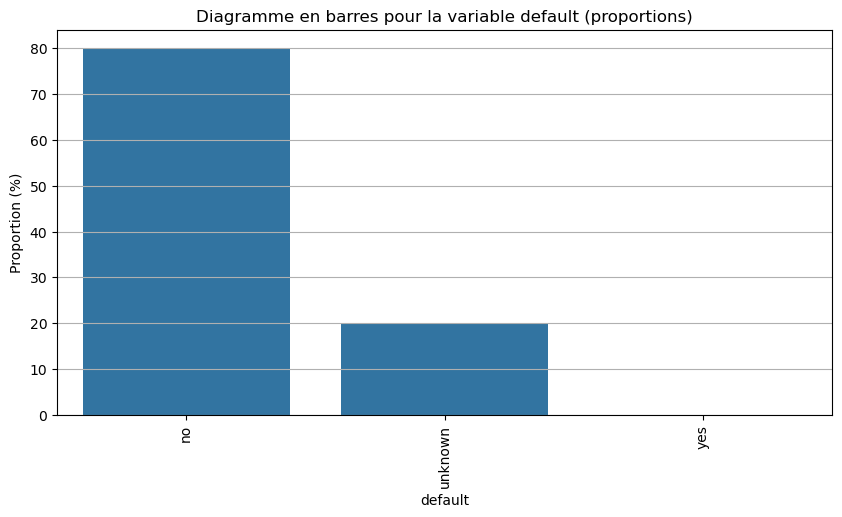

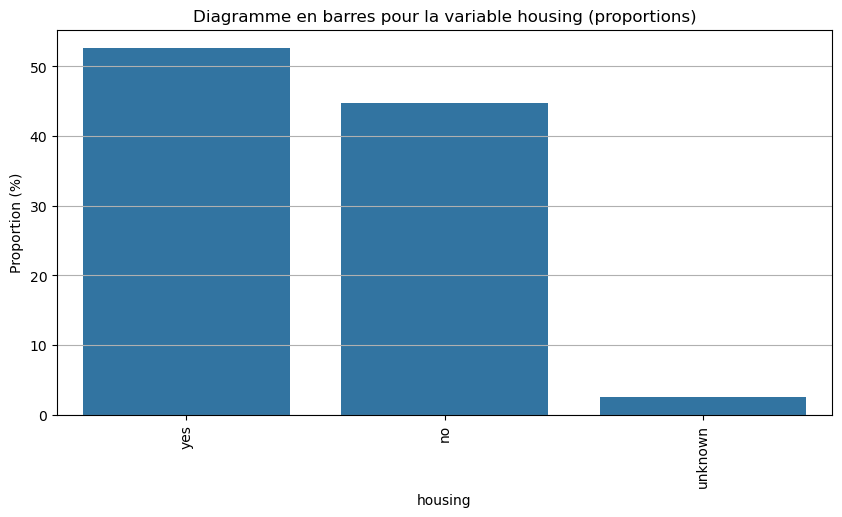

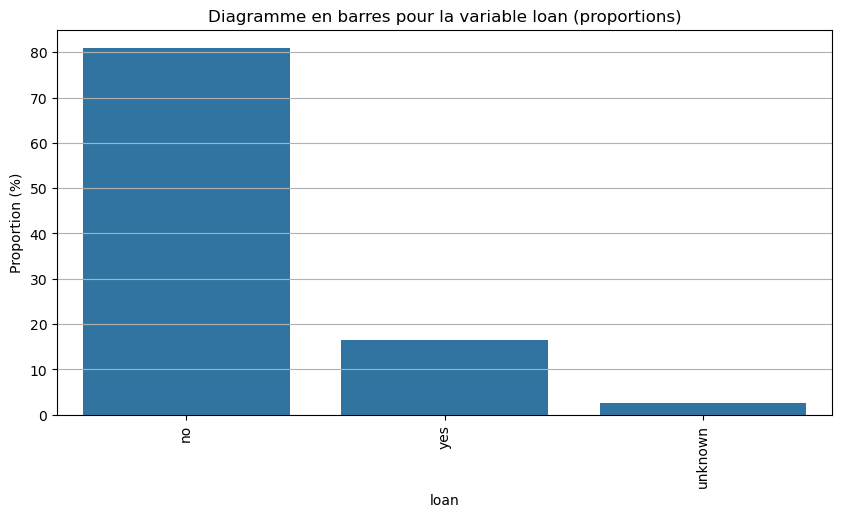

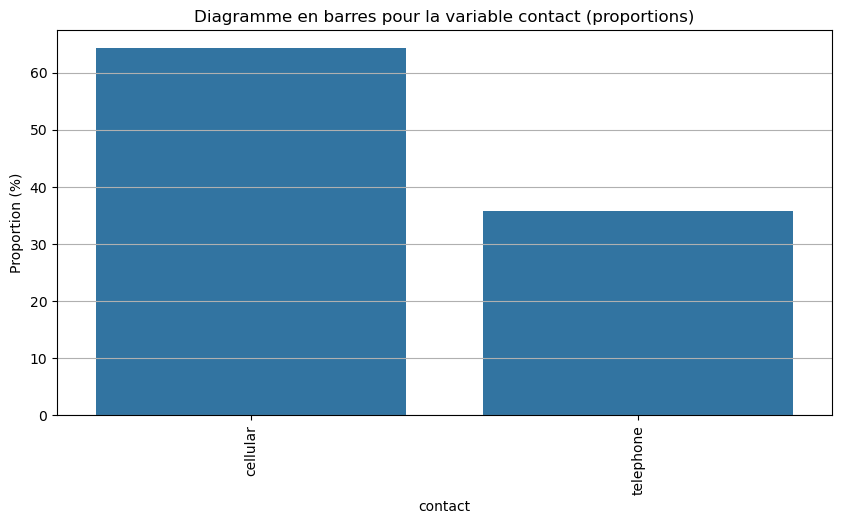

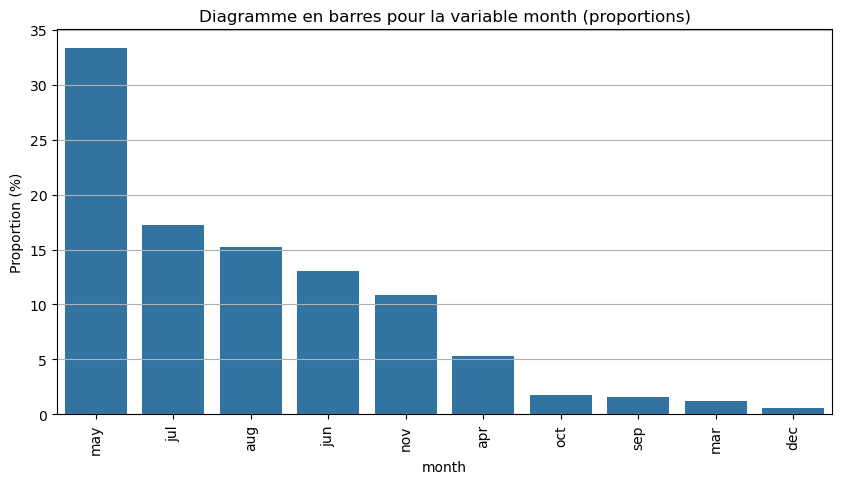

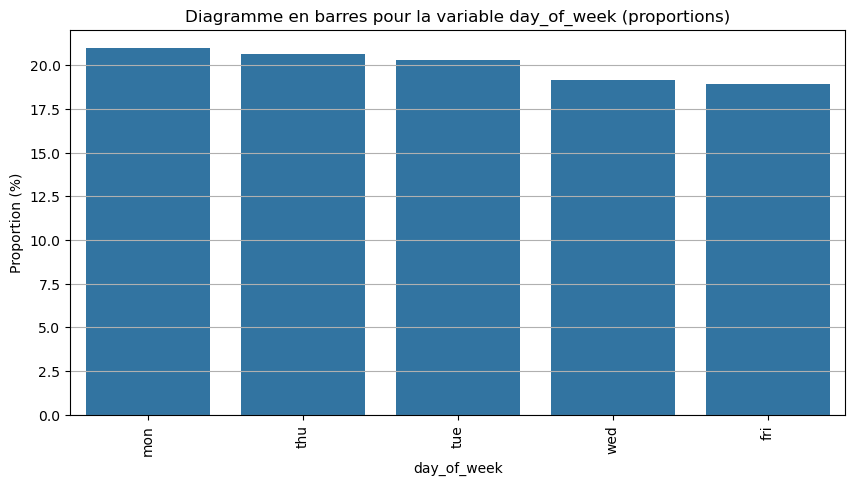

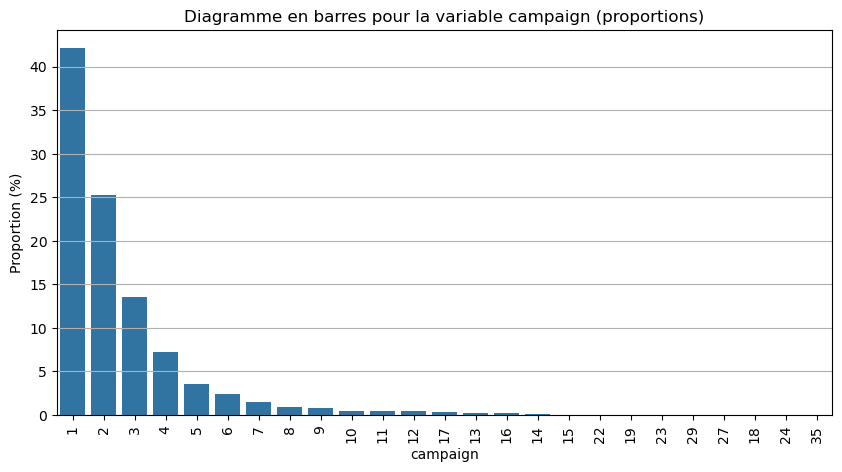

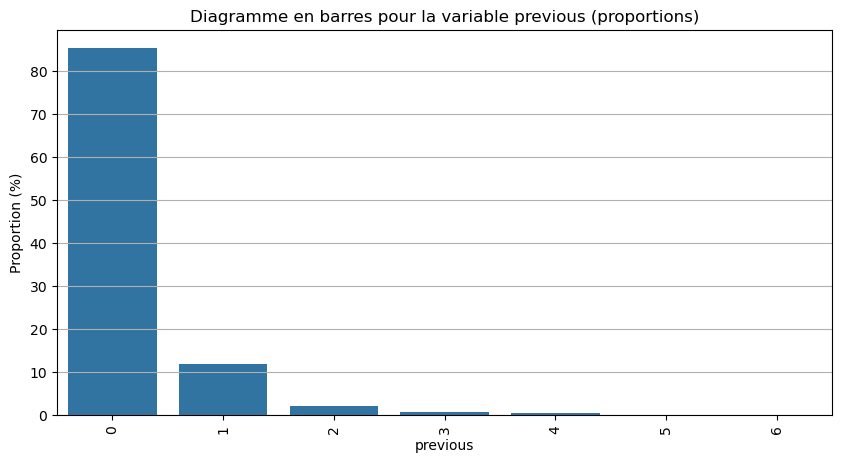

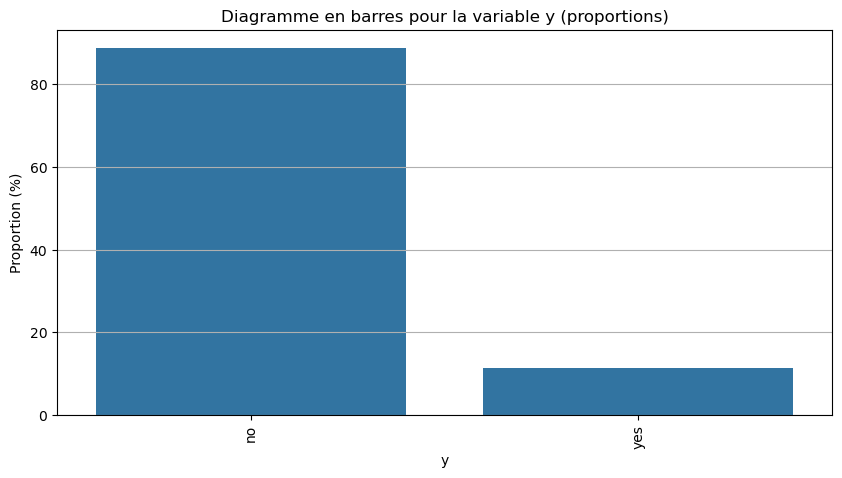

In [12]:
for col in df.columns:
    plt.figure(figsize=(10, 5))
    plt.grid()
    proportions = df[col].value_counts(normalize=True) * 100
    sns.barplot(x=proportions.index, y=proportions.values)
    plt.title(f"Diagramme en barres pour la variable {col} (proportions)")
    plt.ylabel('Proportion (%)')
    plt.xticks(rotation=90)
    
    plt.show()

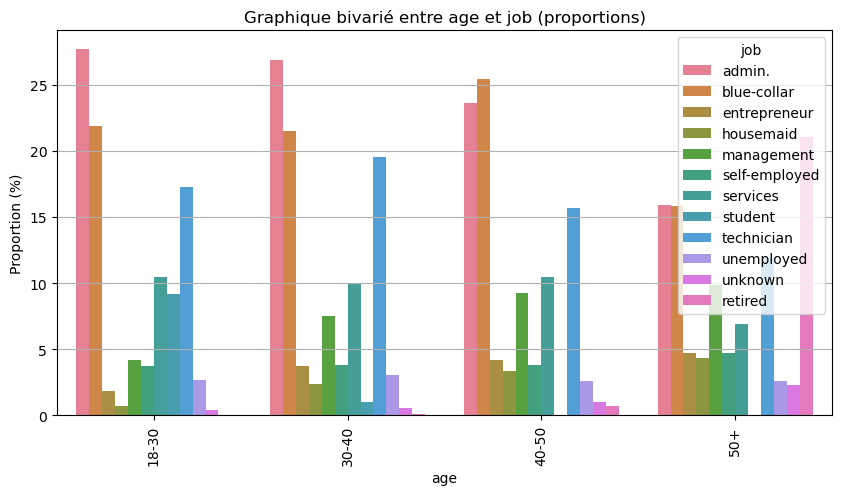

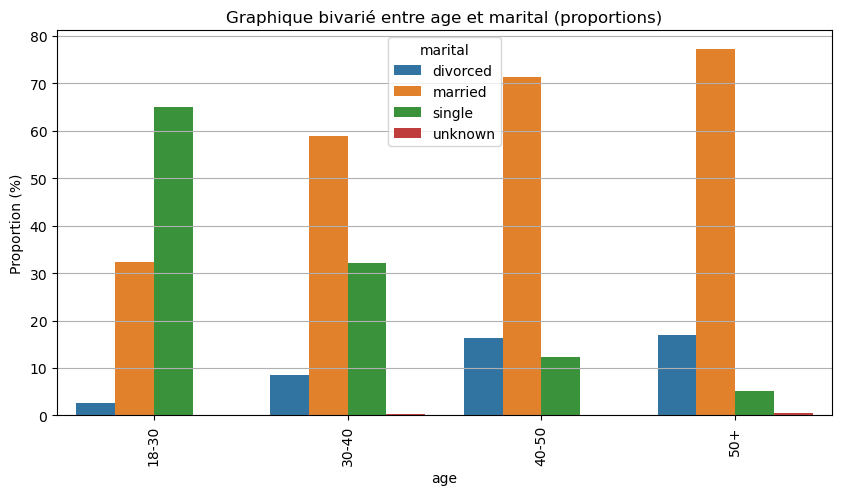

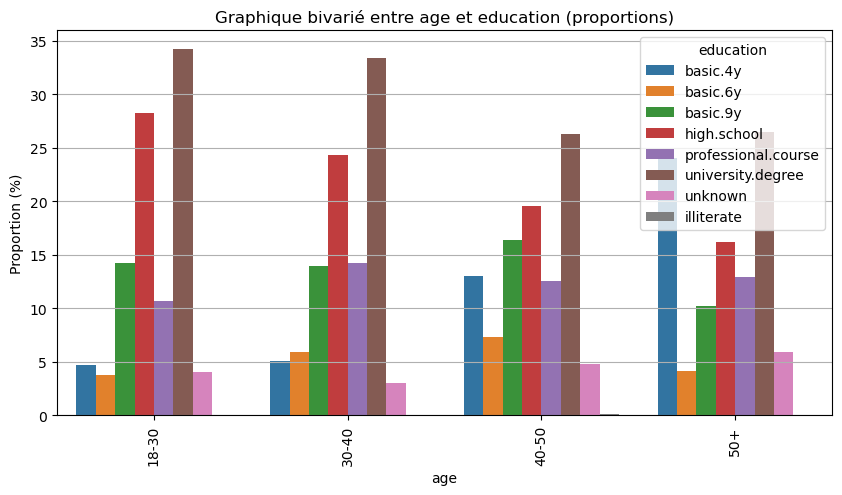

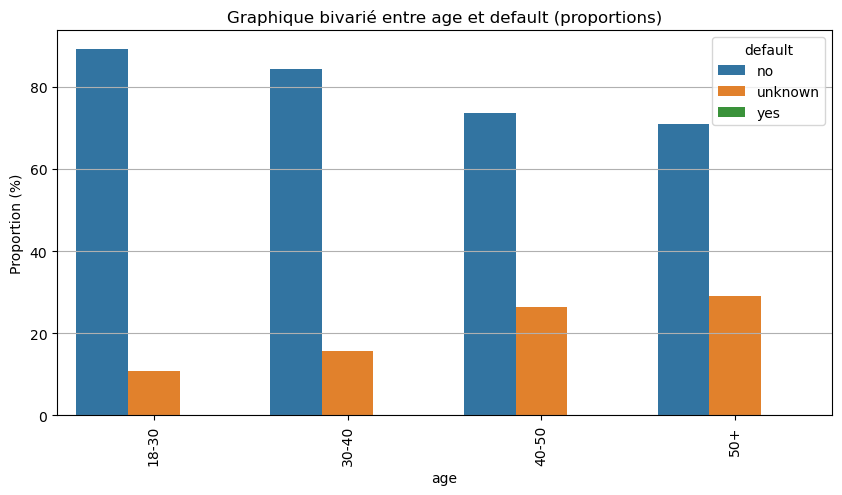

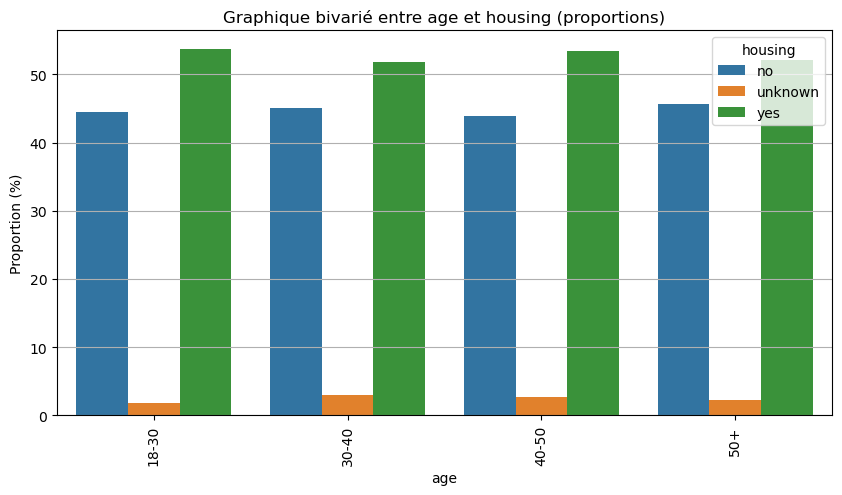

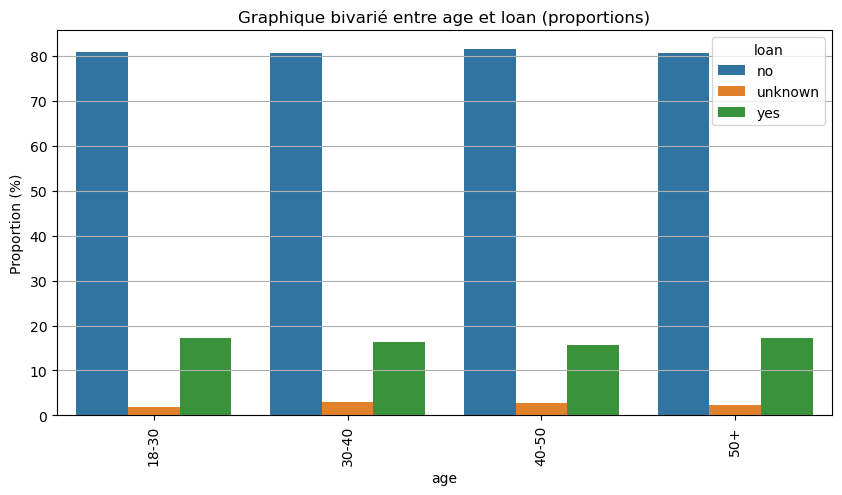

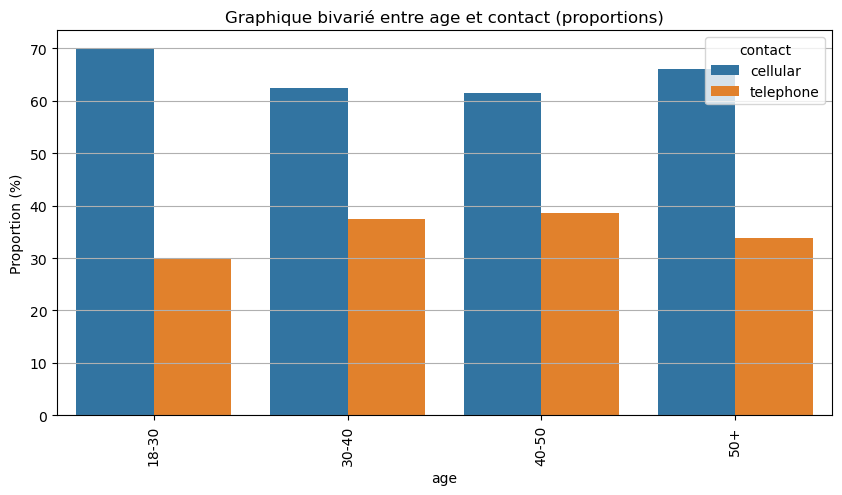

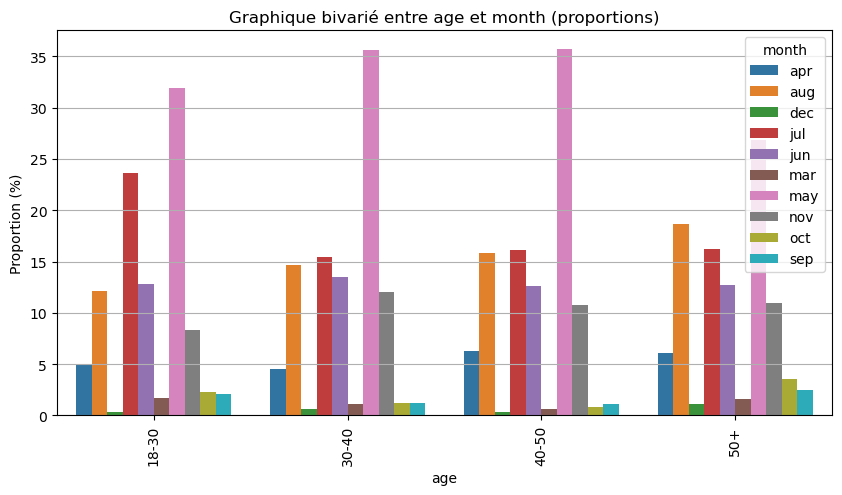

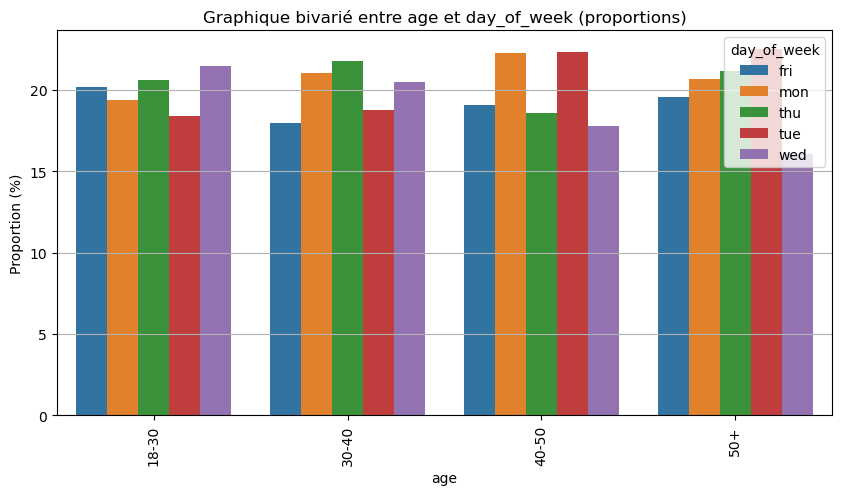

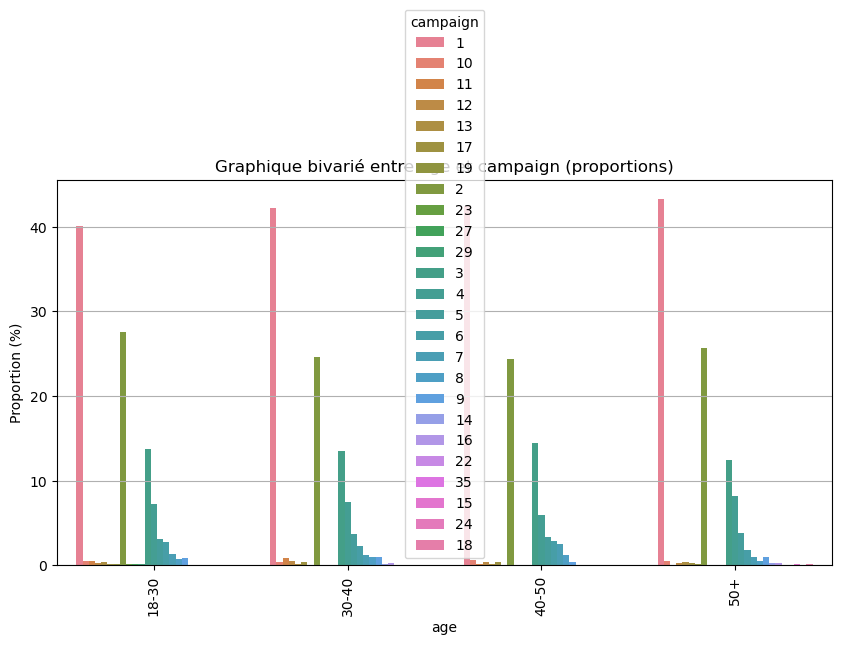

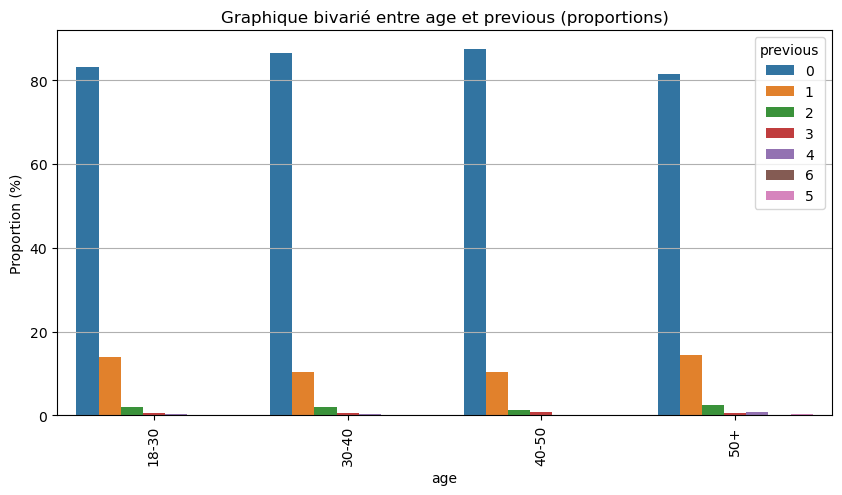

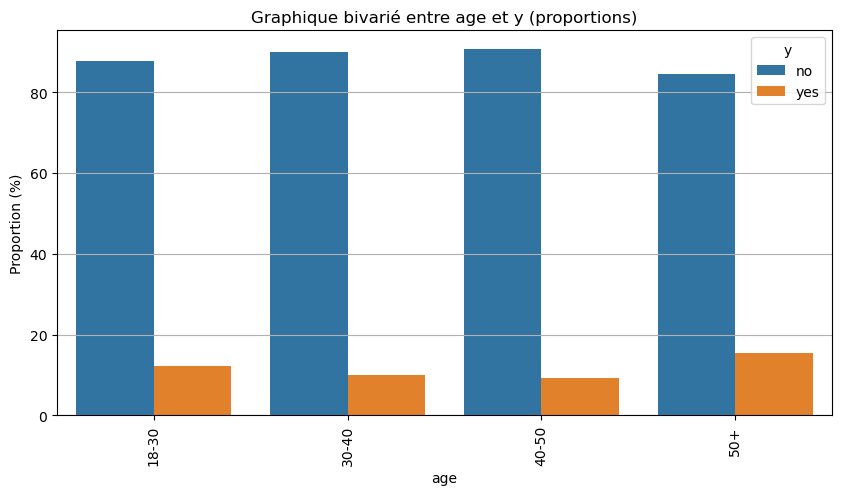

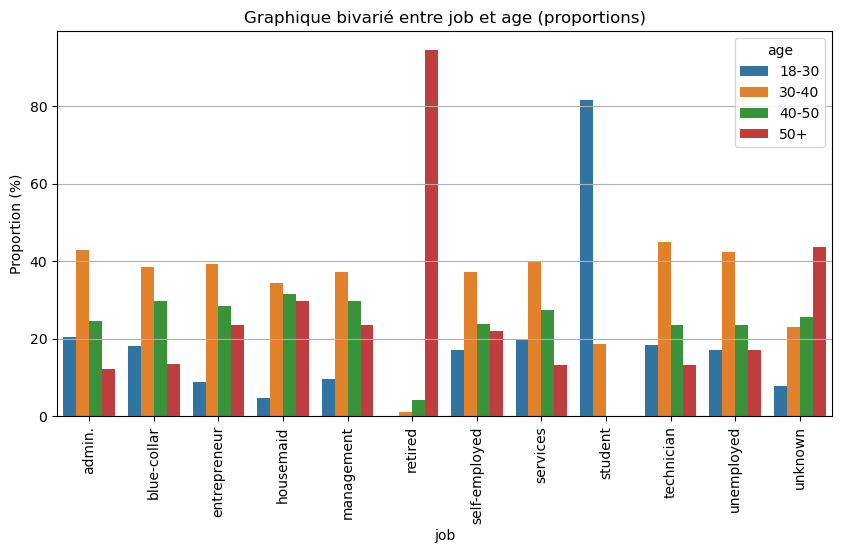

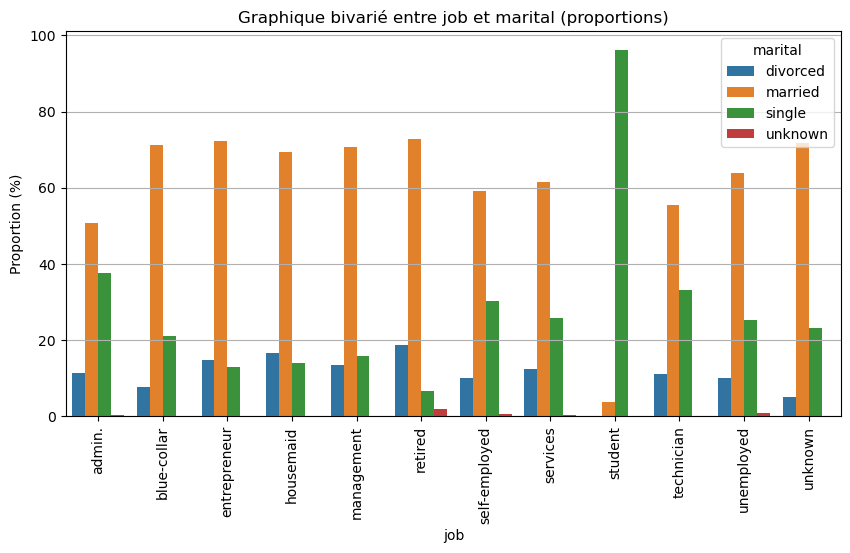

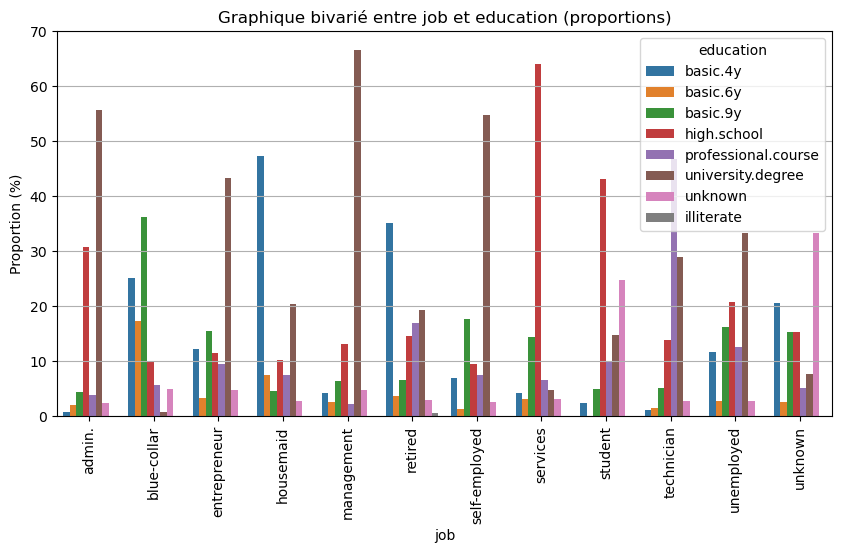

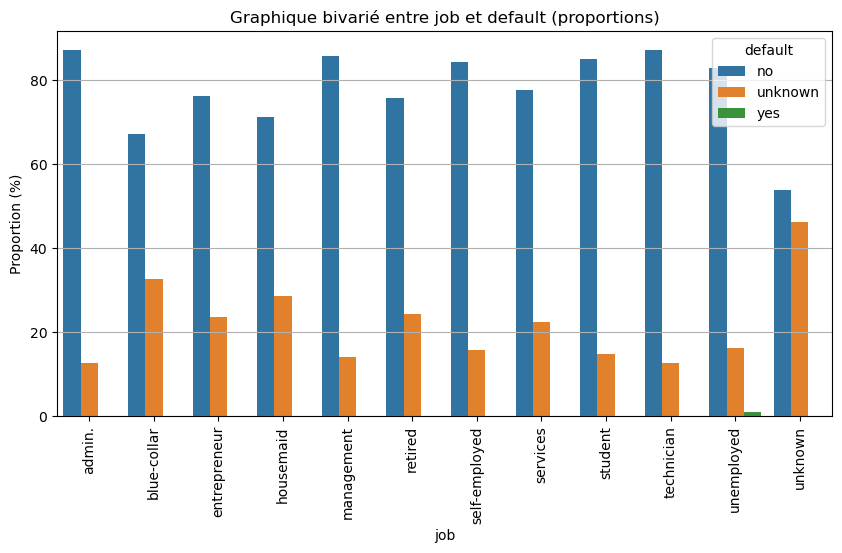

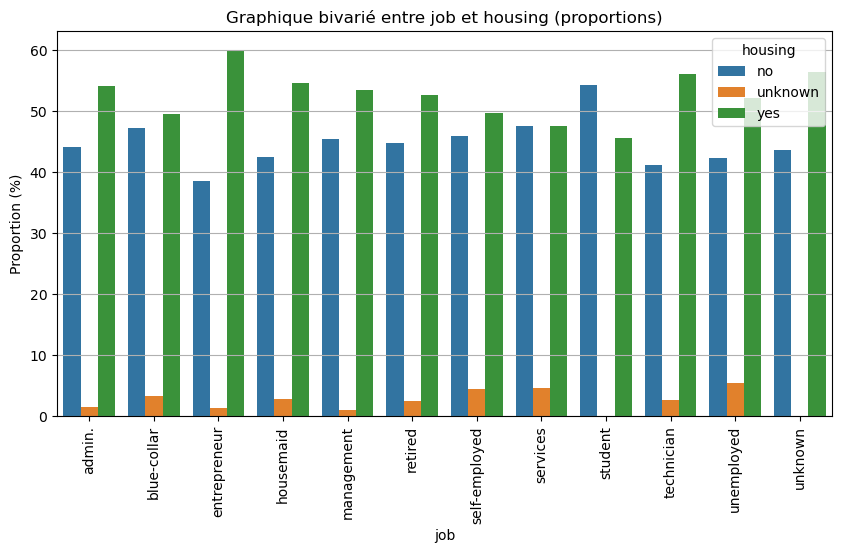

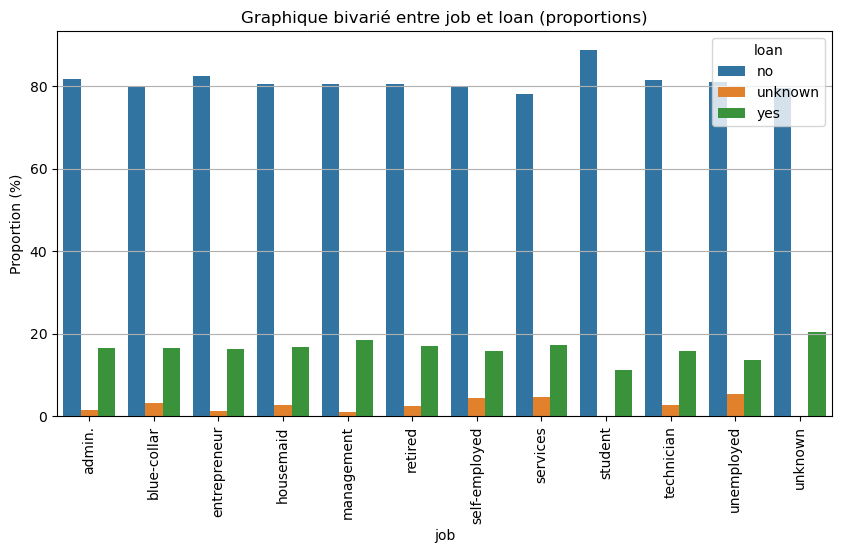

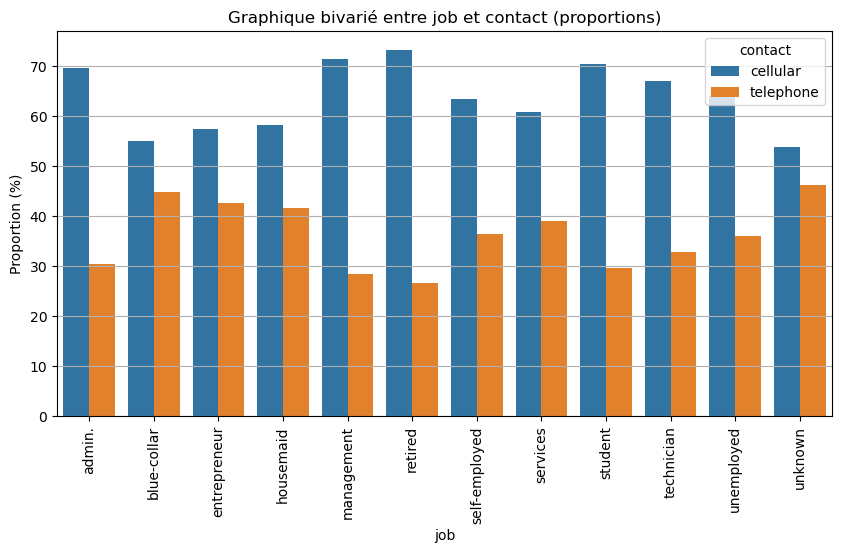

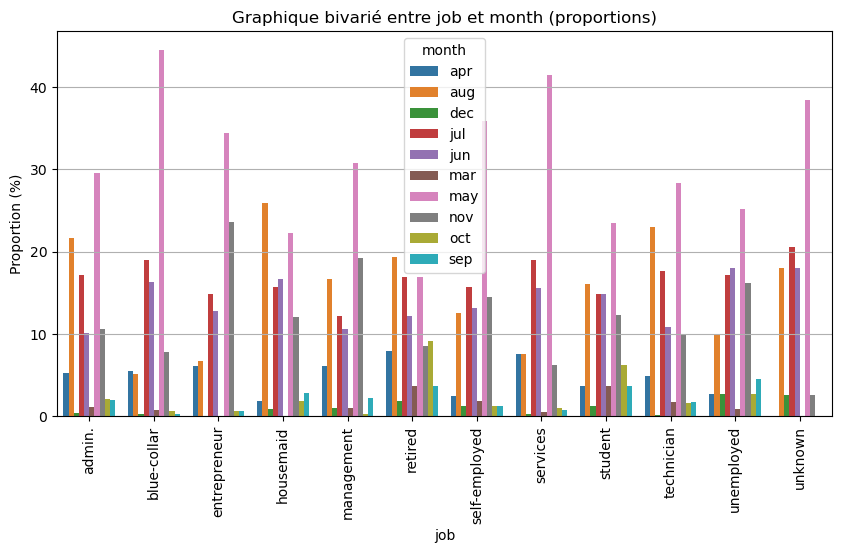

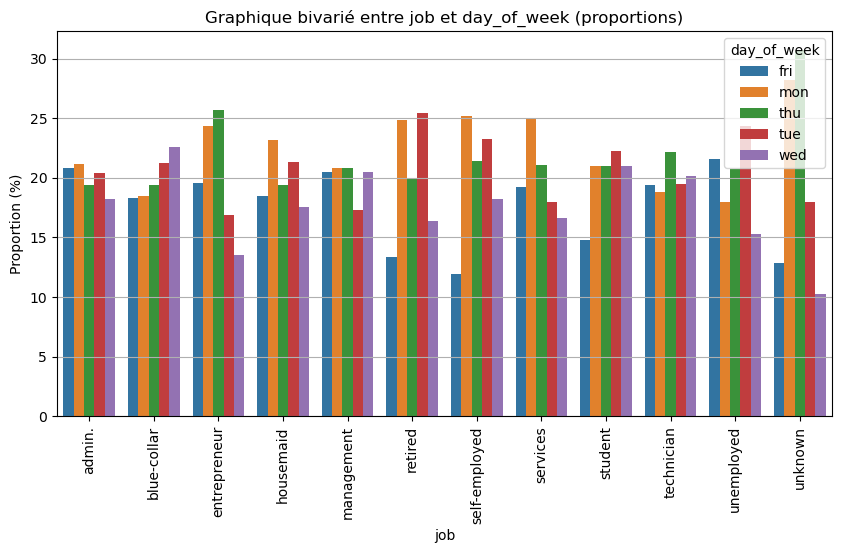

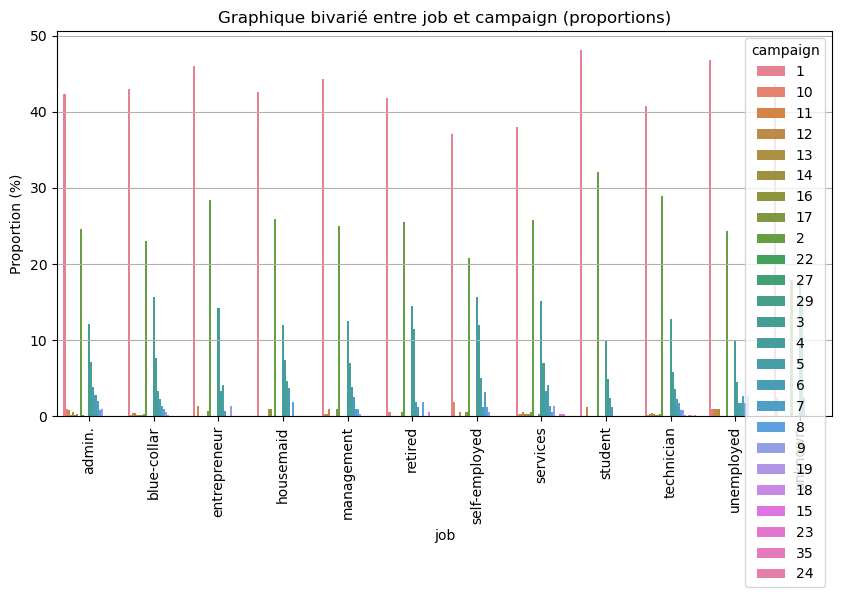

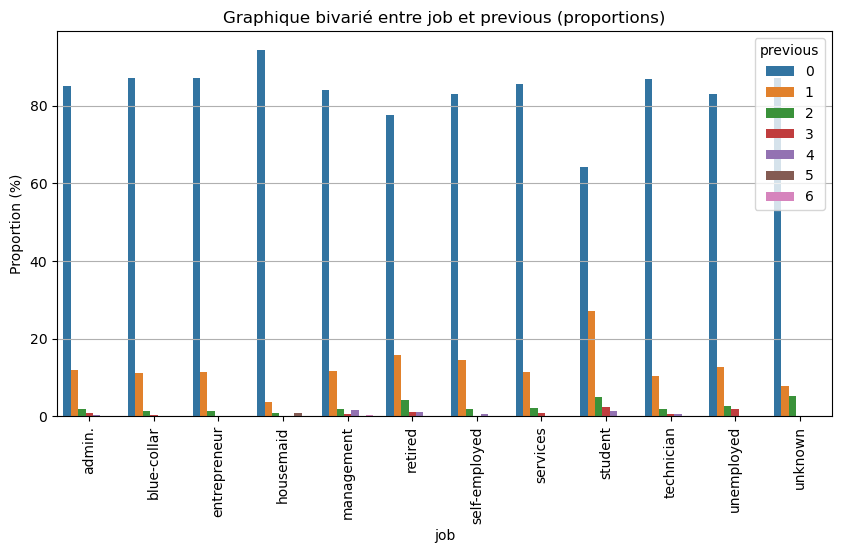

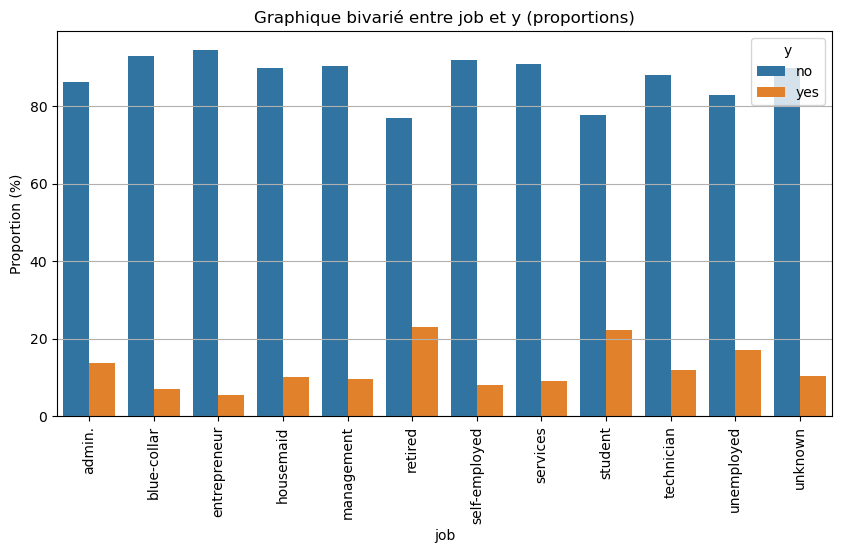

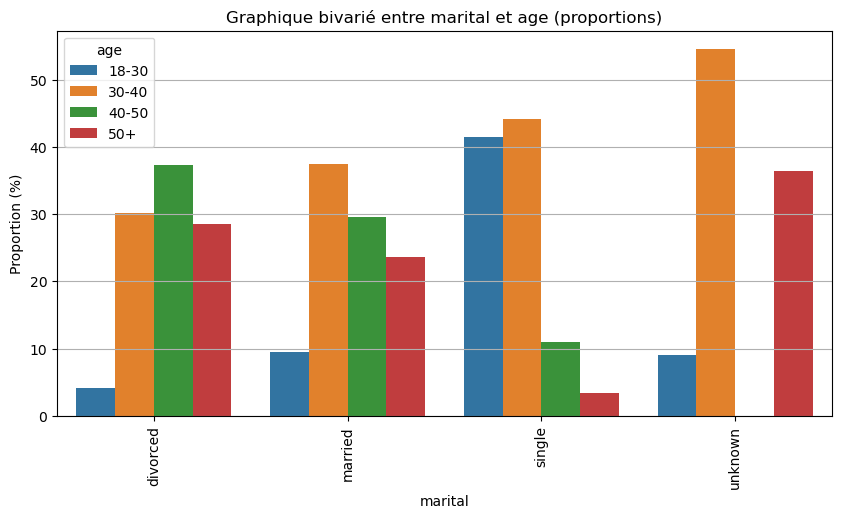

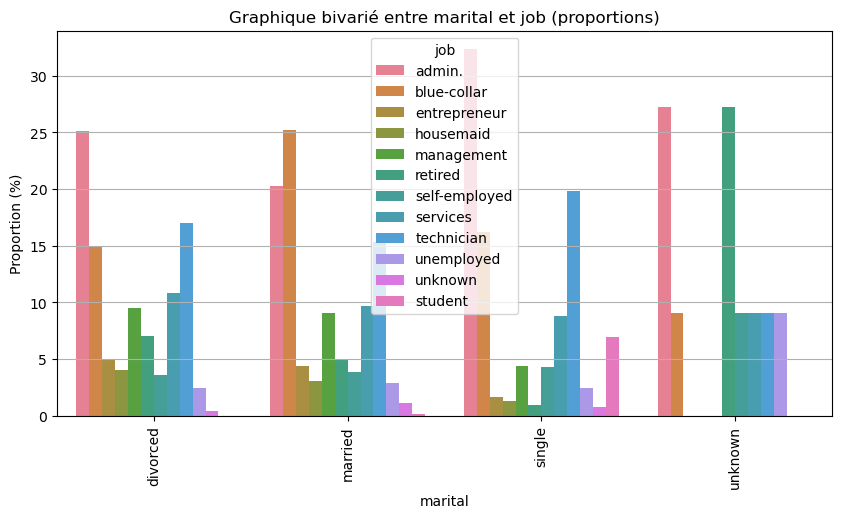

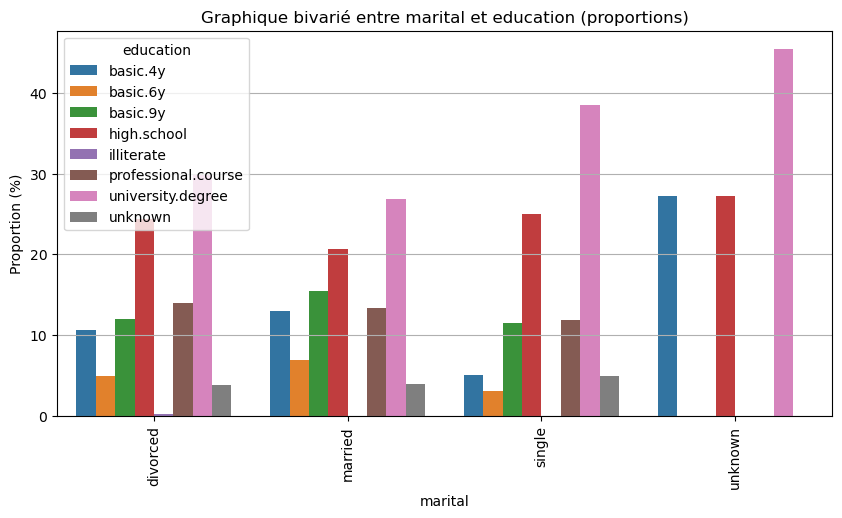

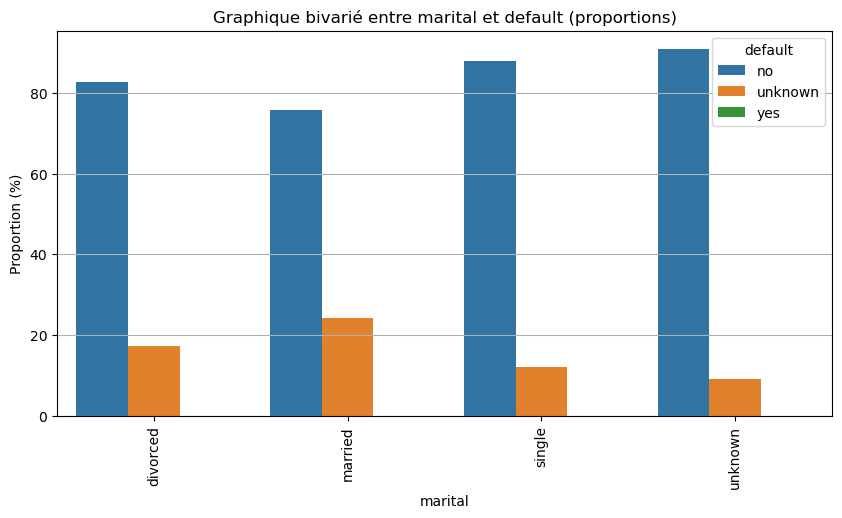

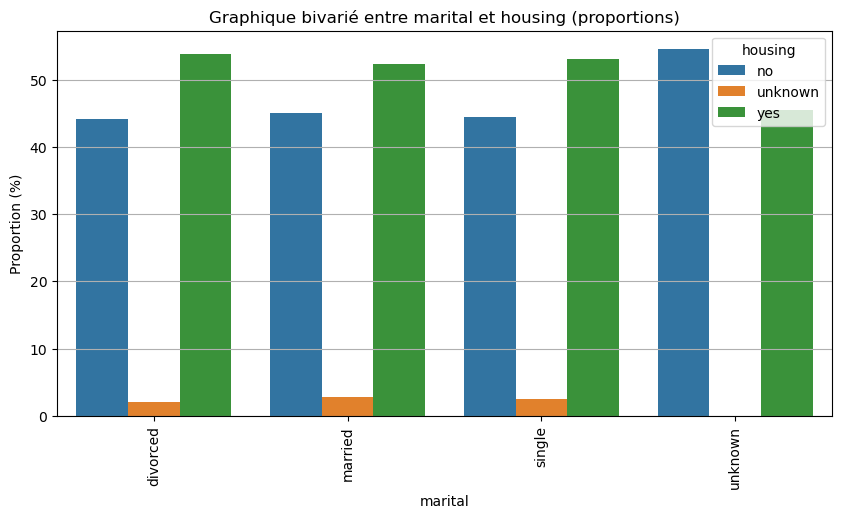

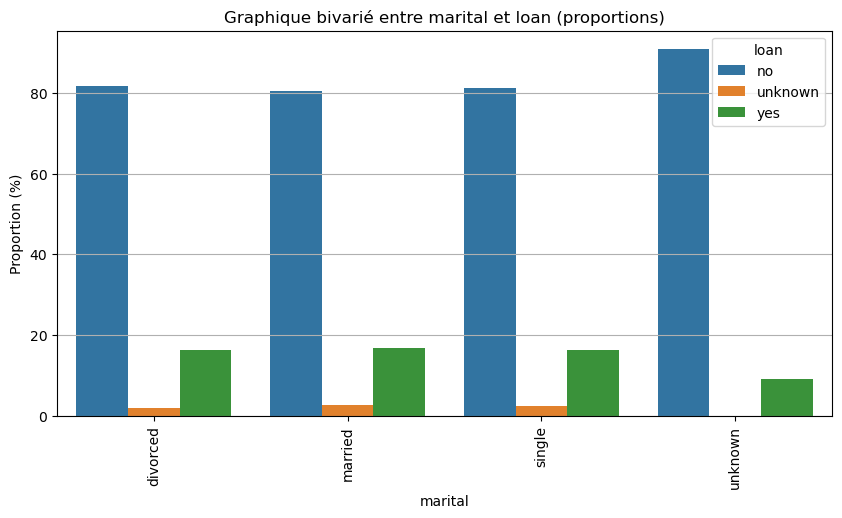

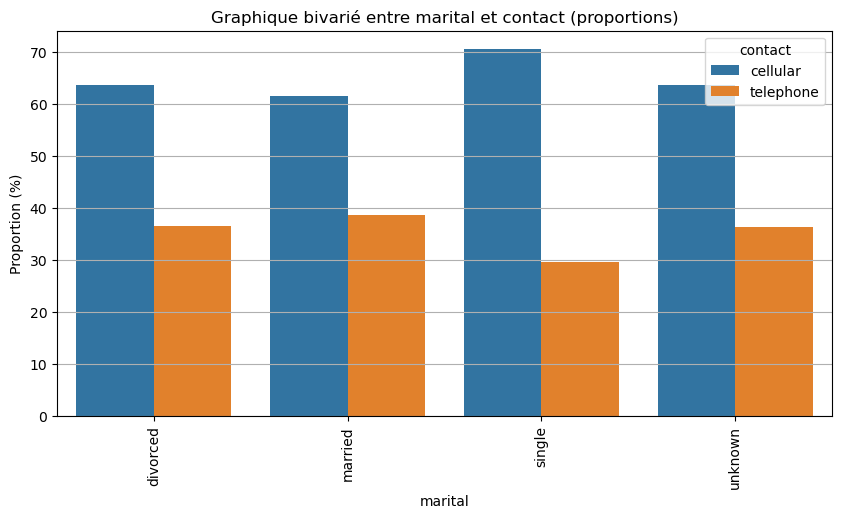

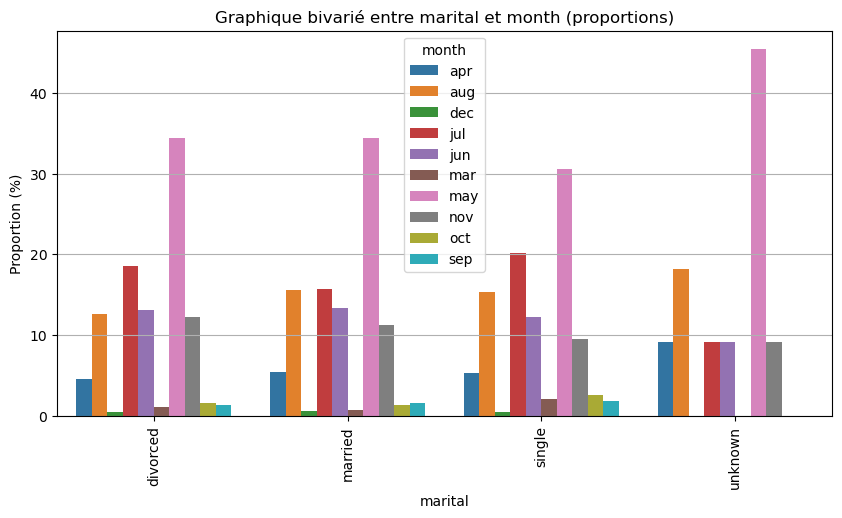

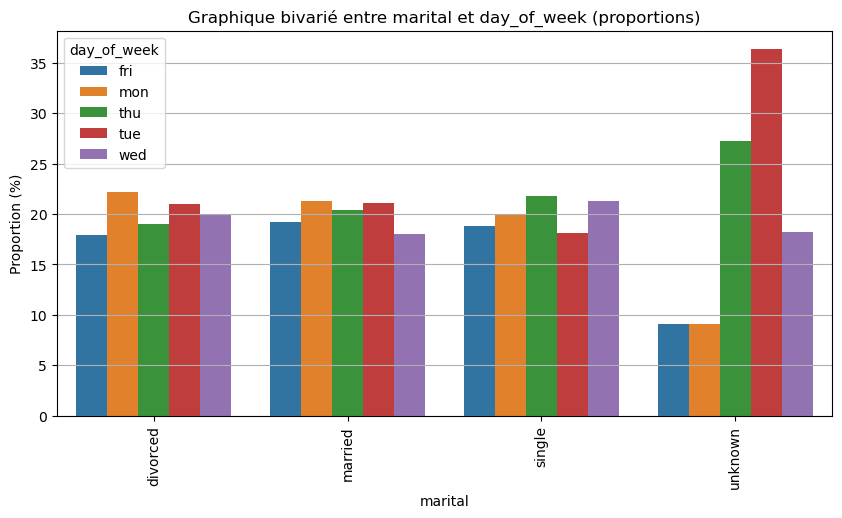

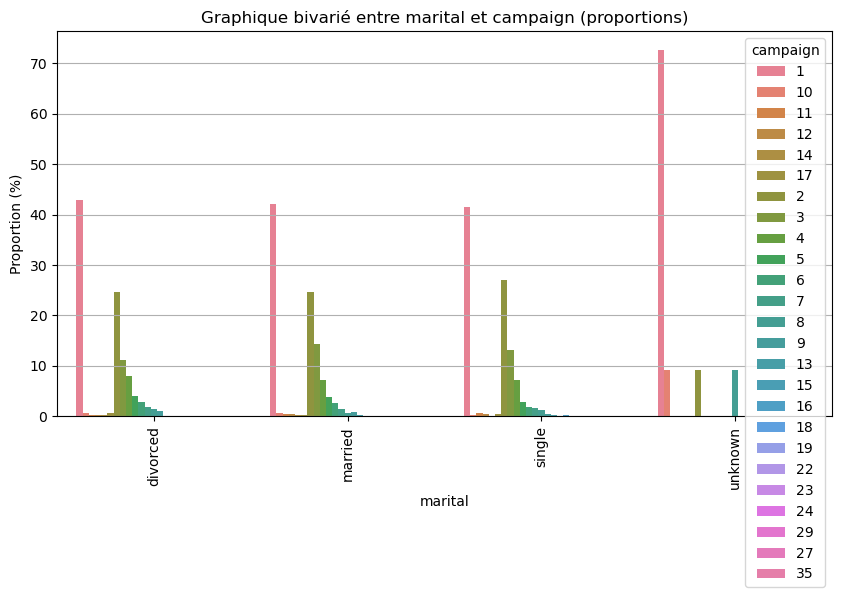

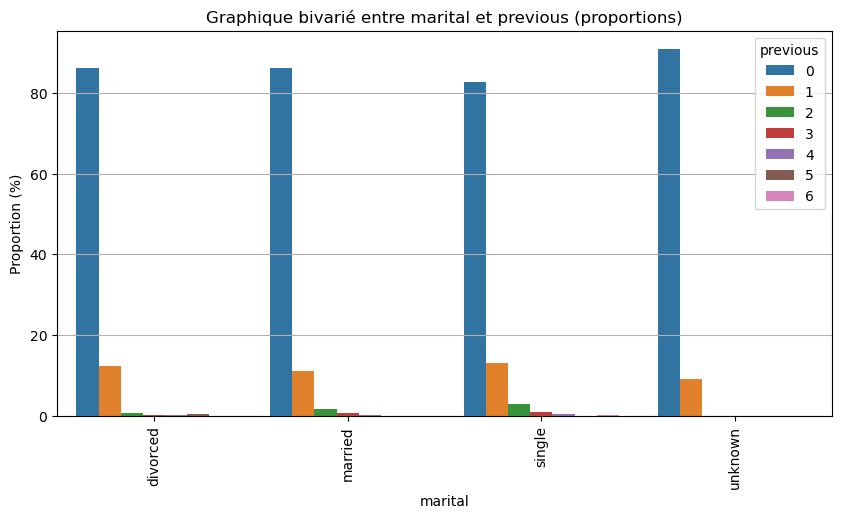

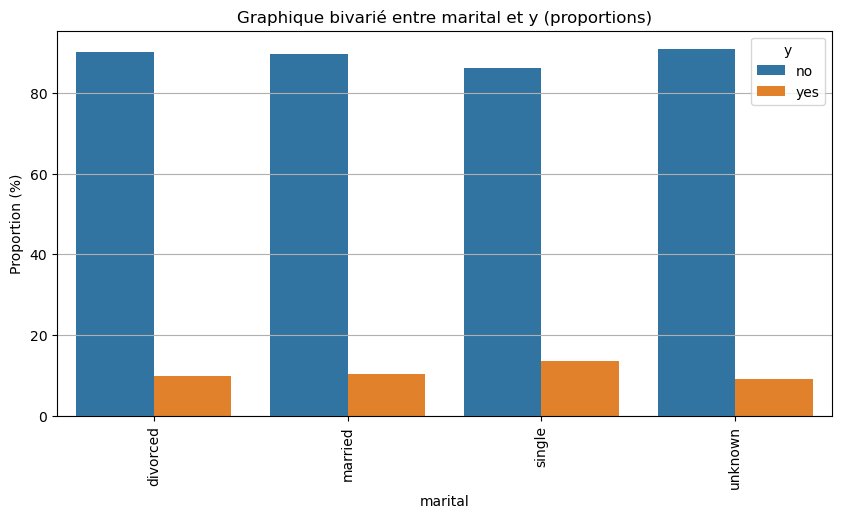

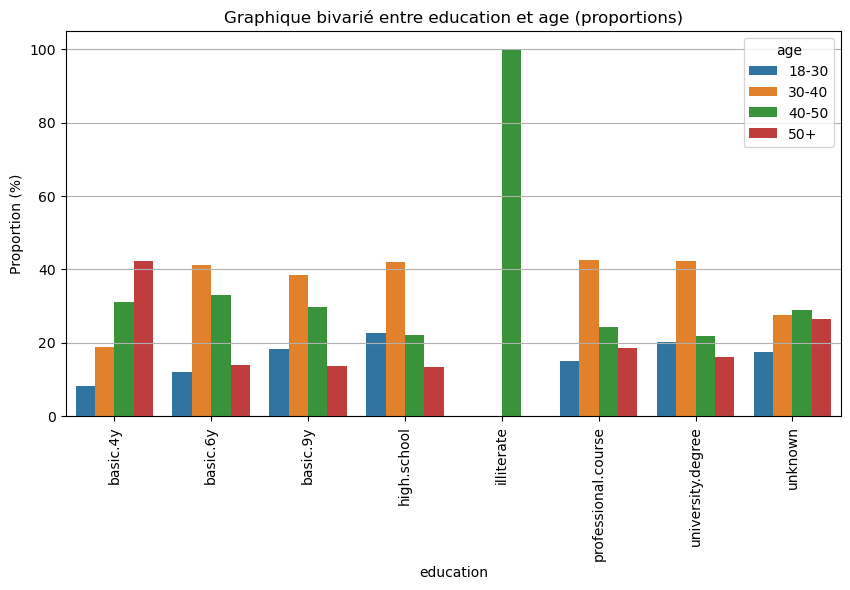

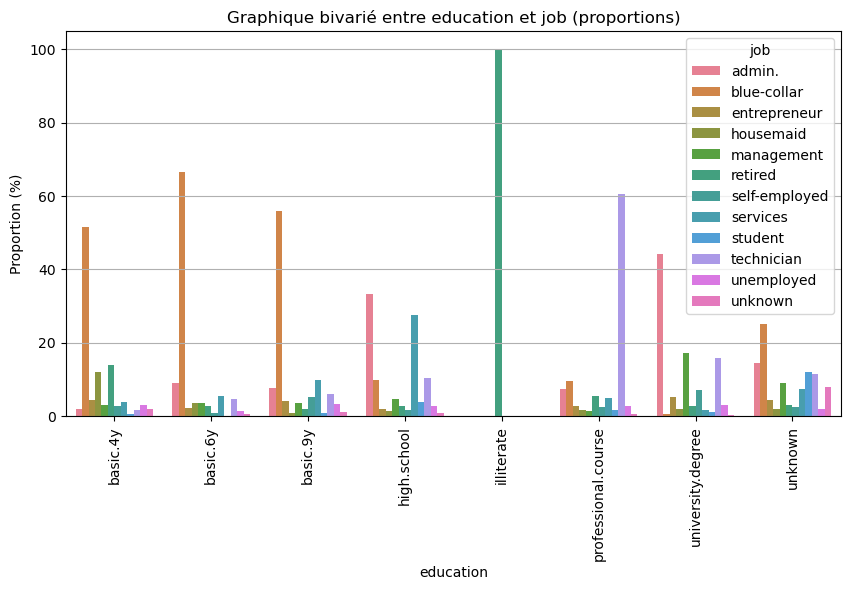

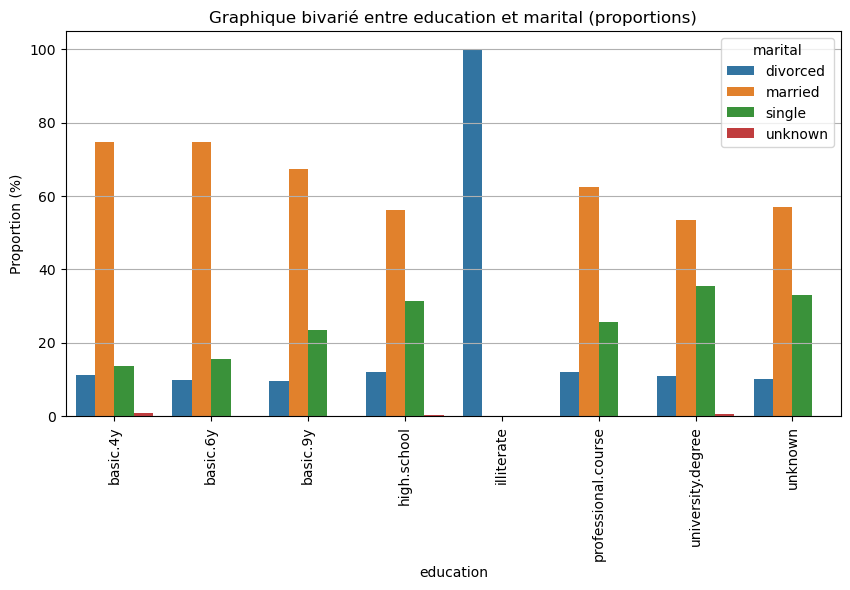

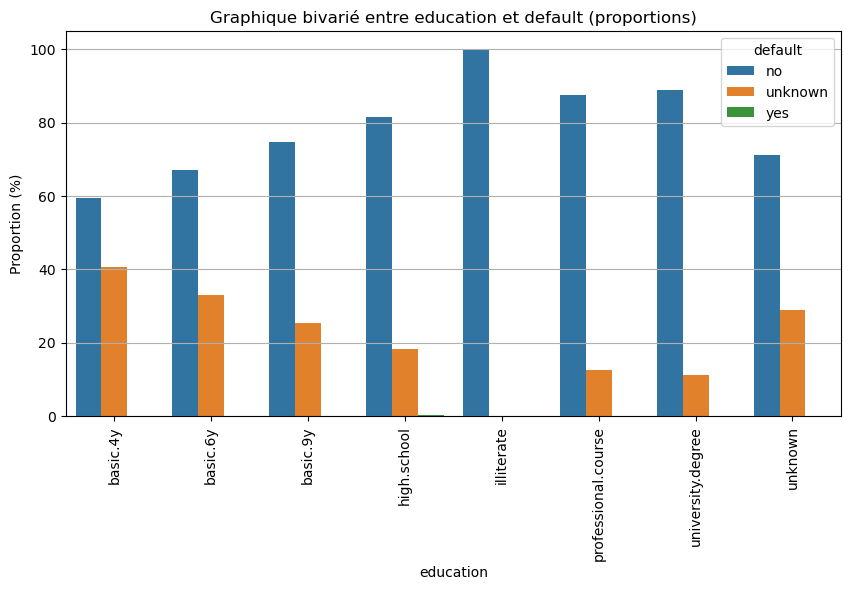

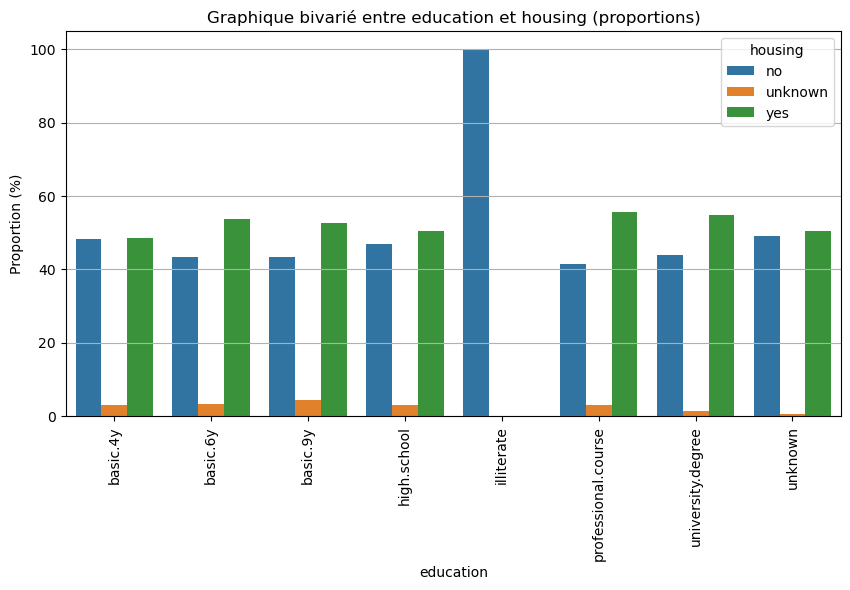

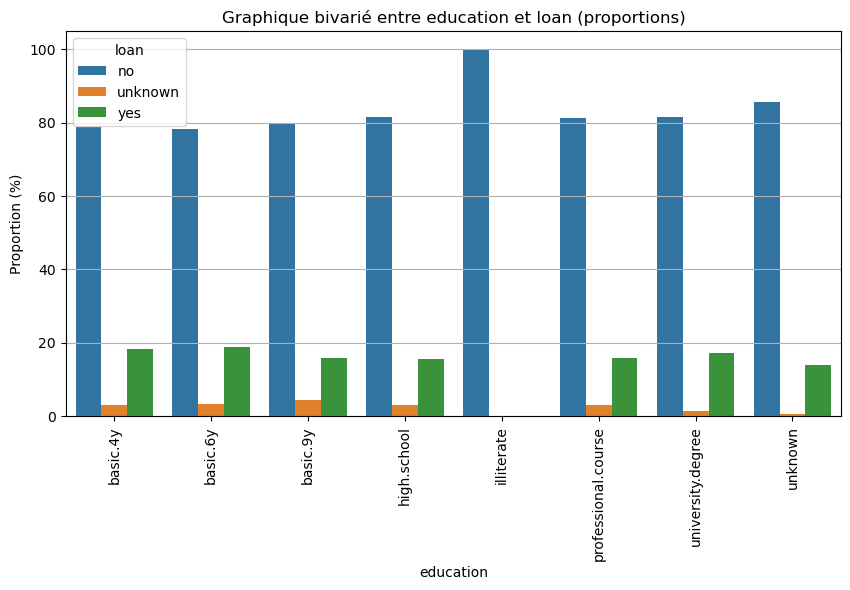

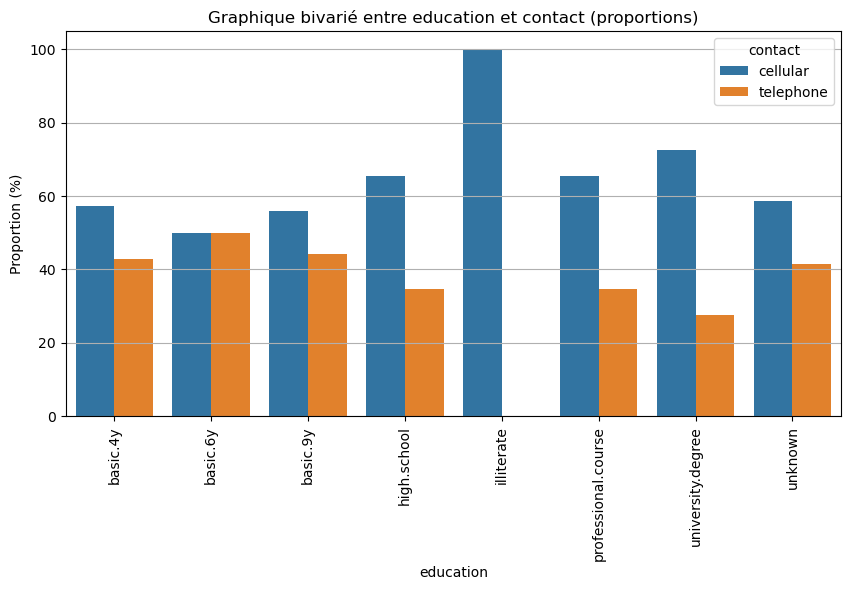

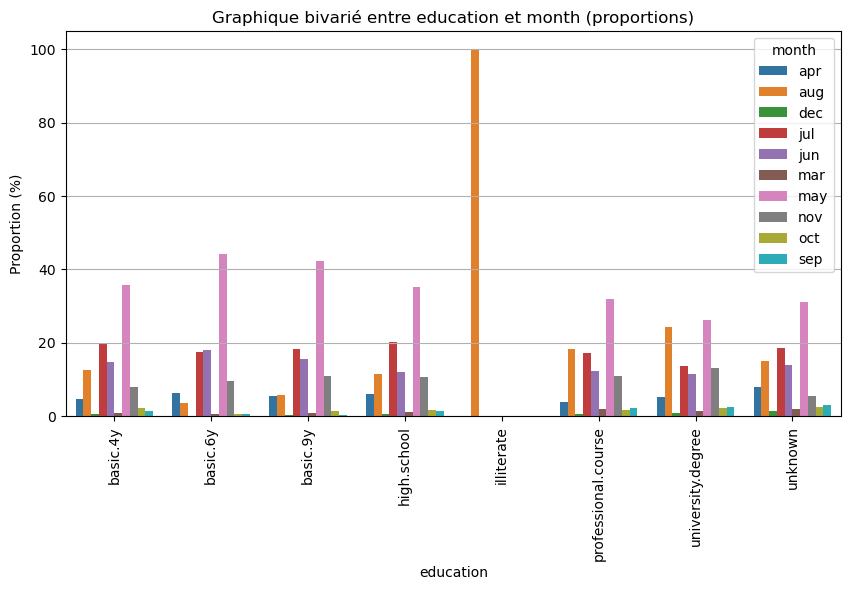

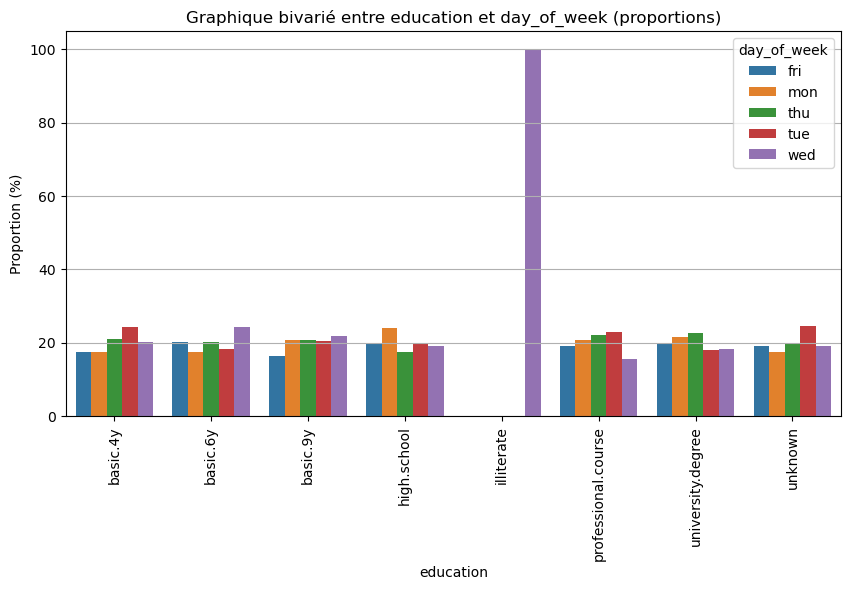

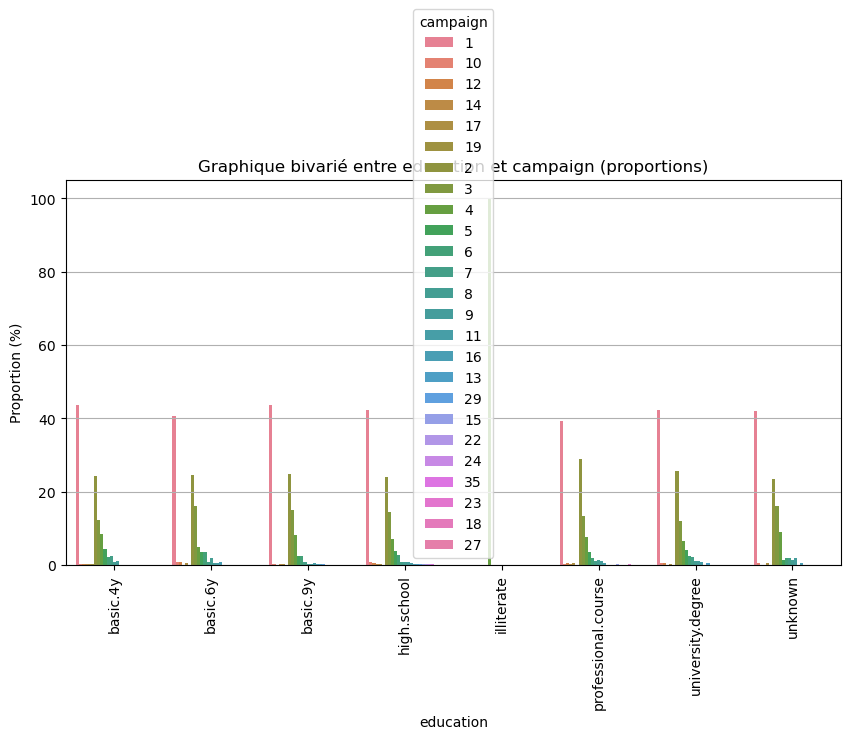

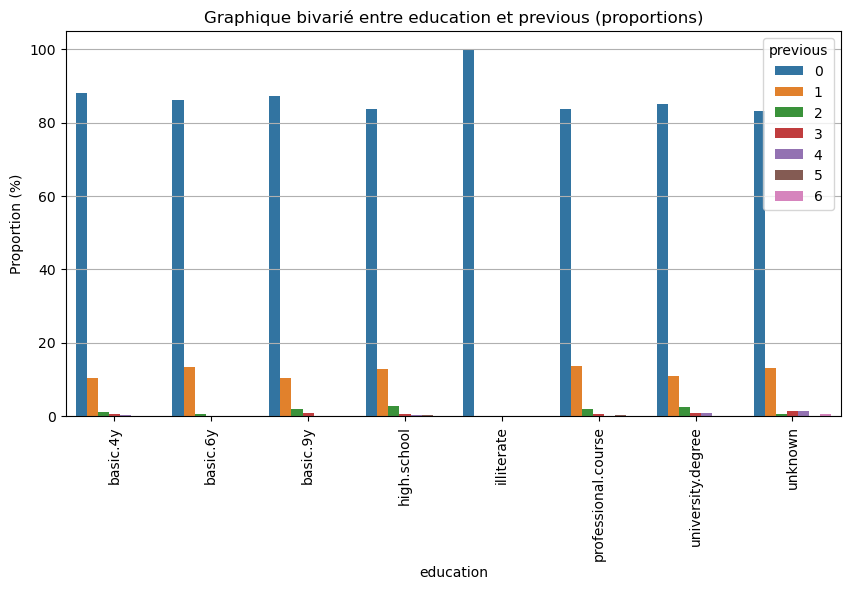

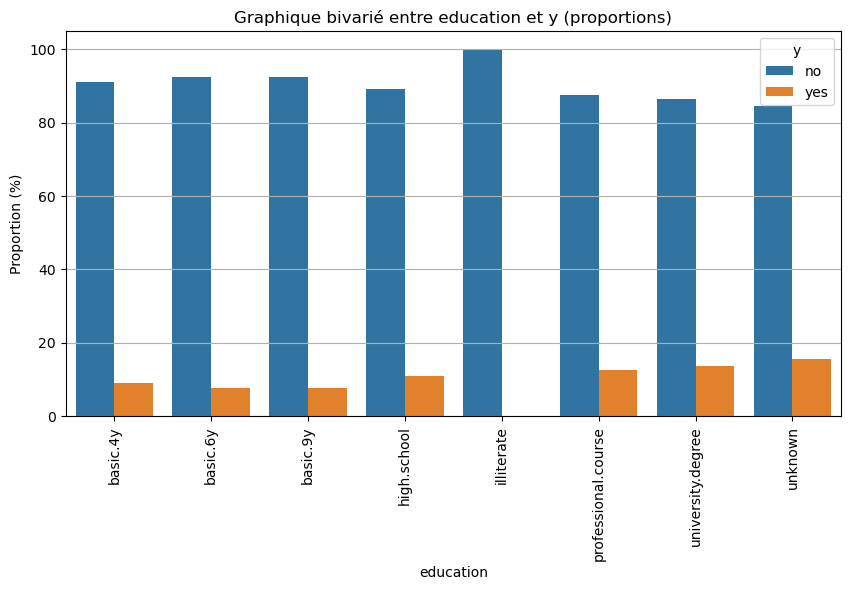

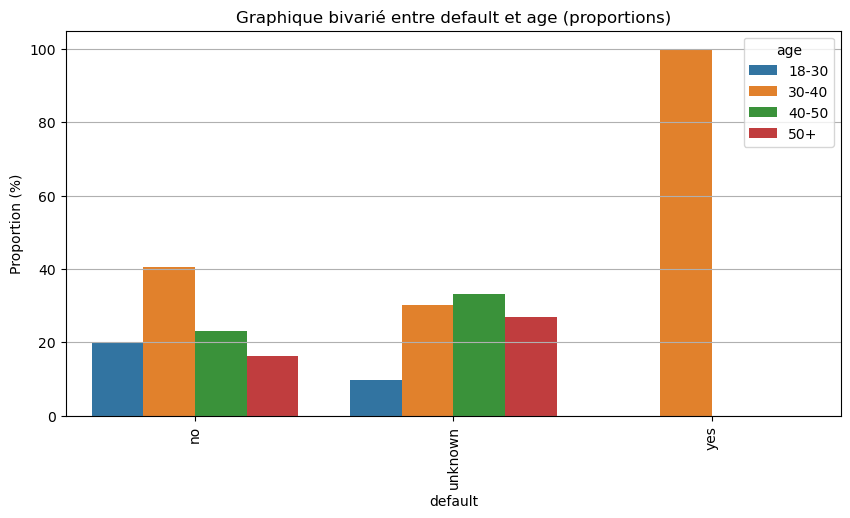

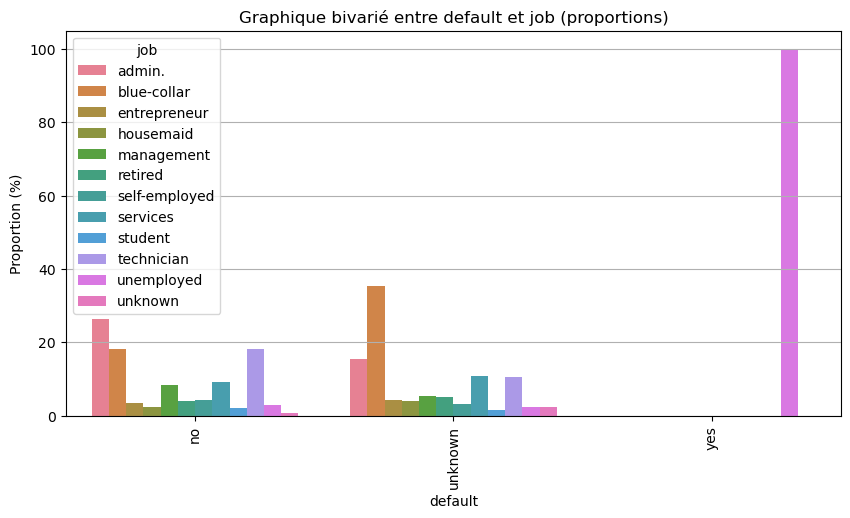

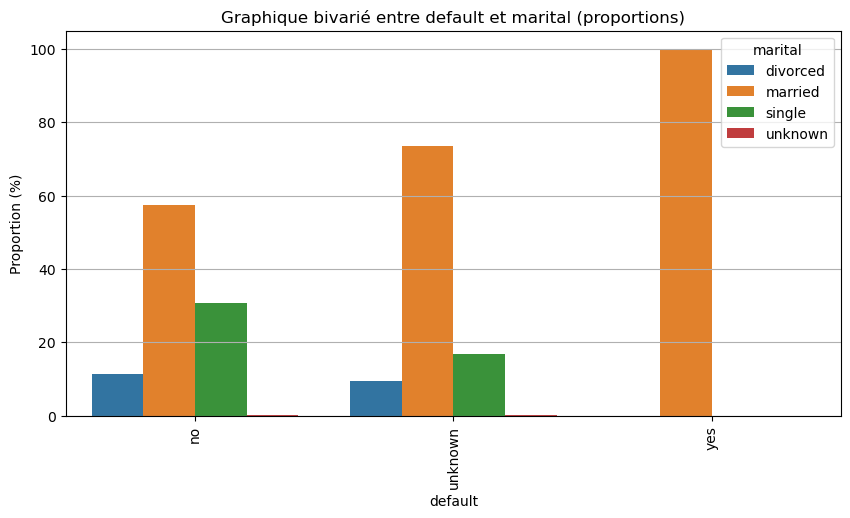

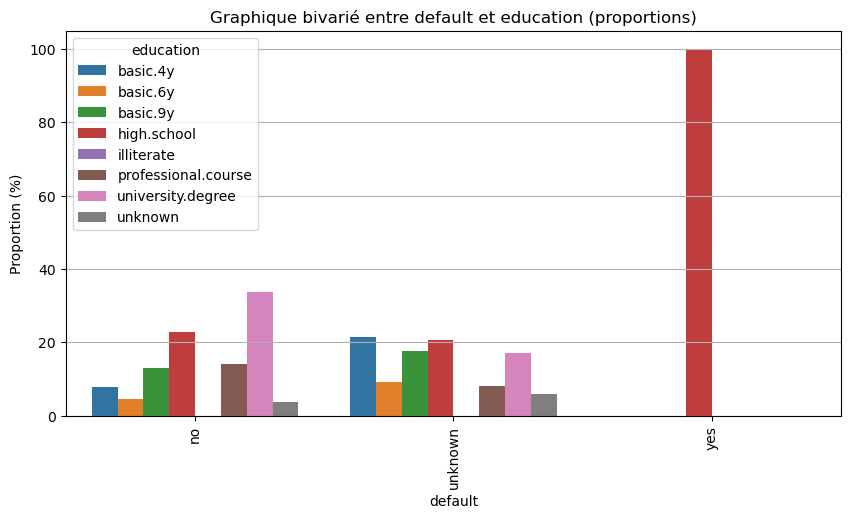

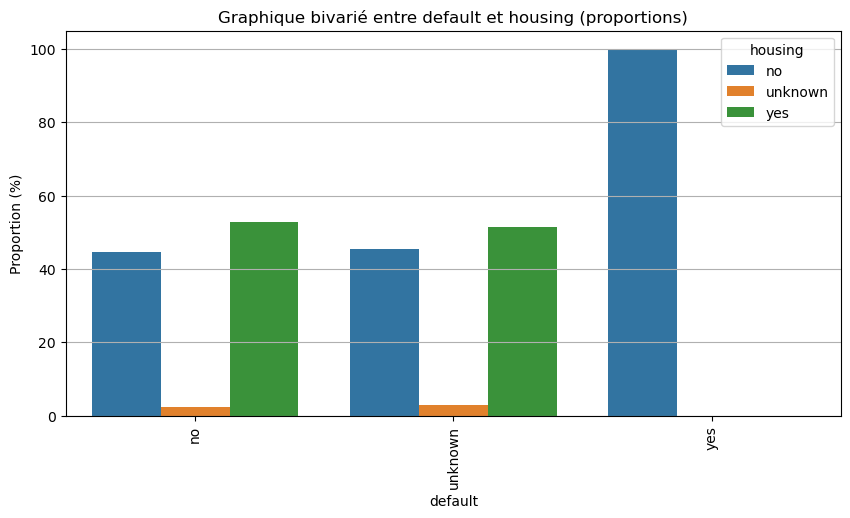

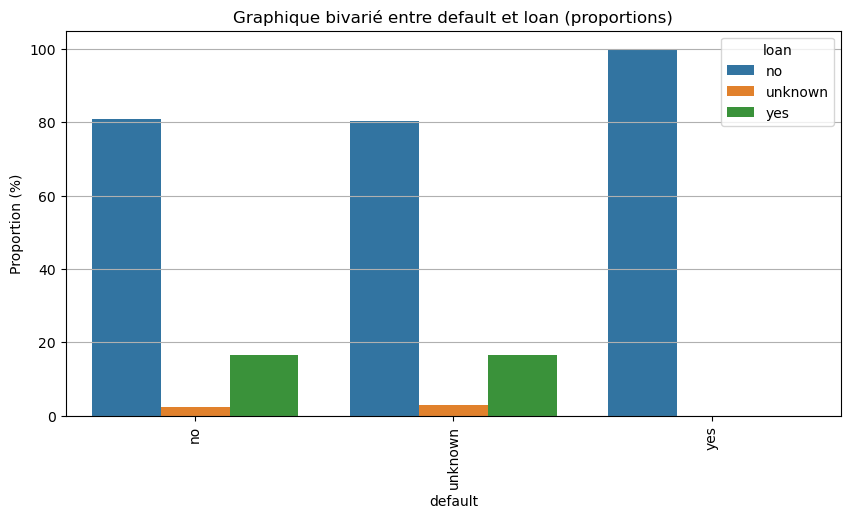

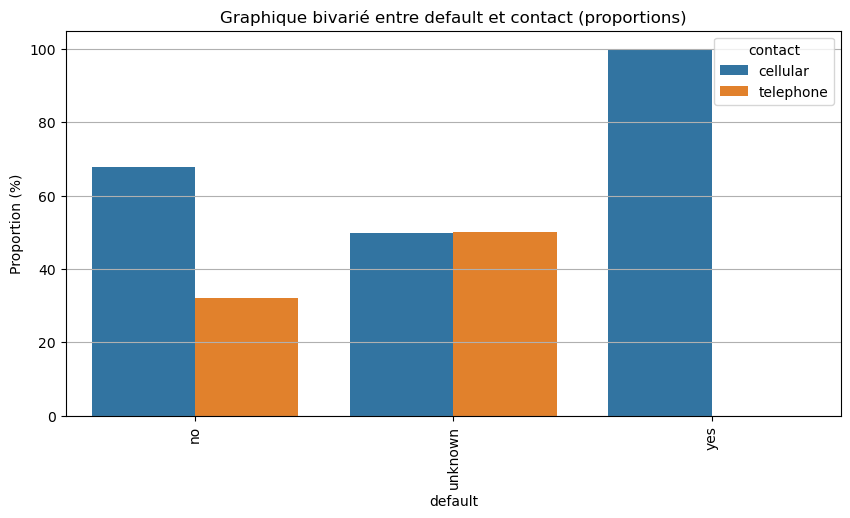

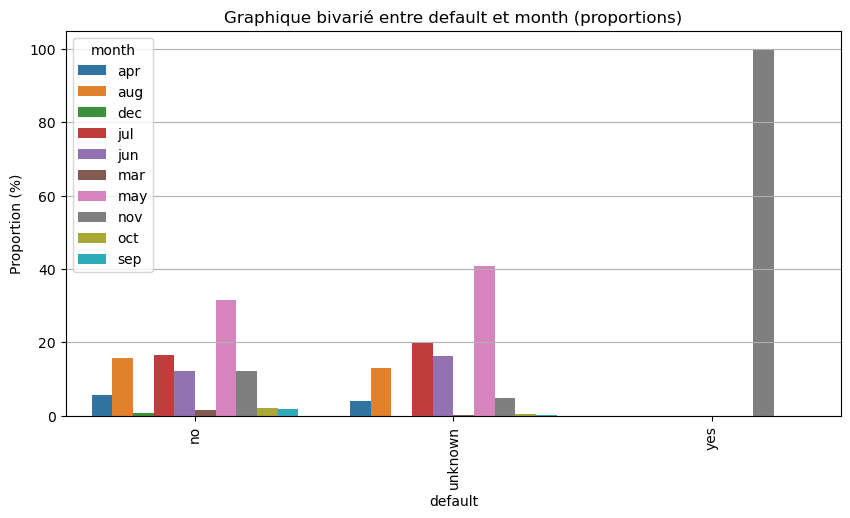

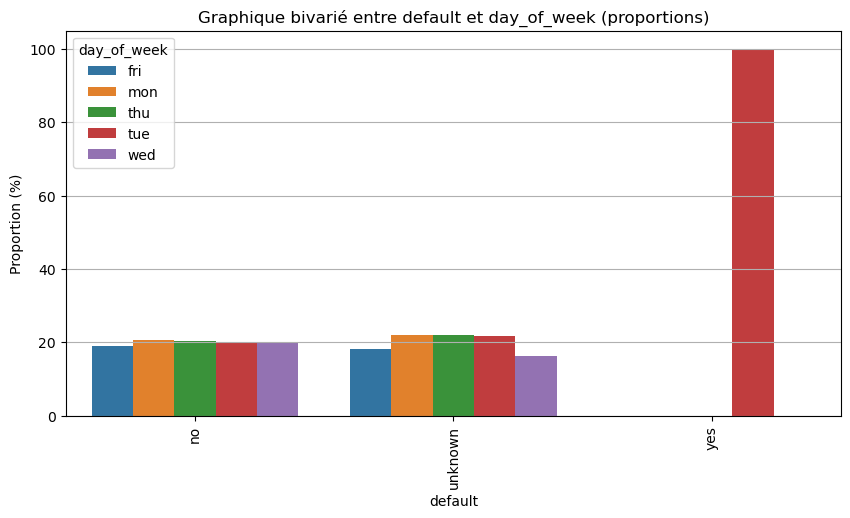

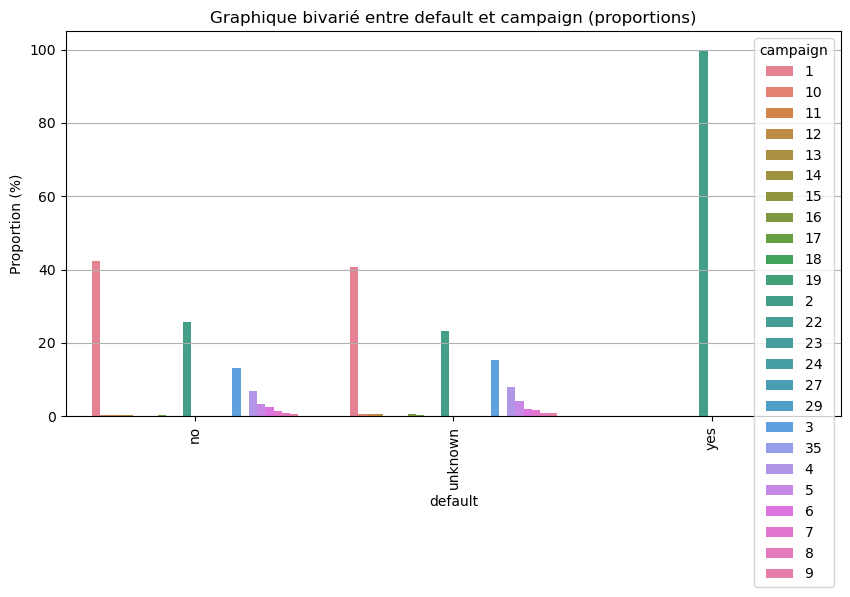

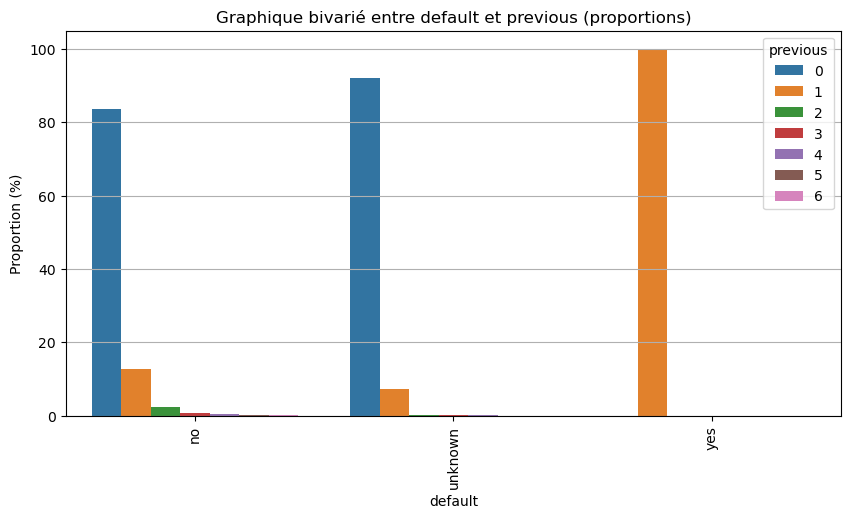

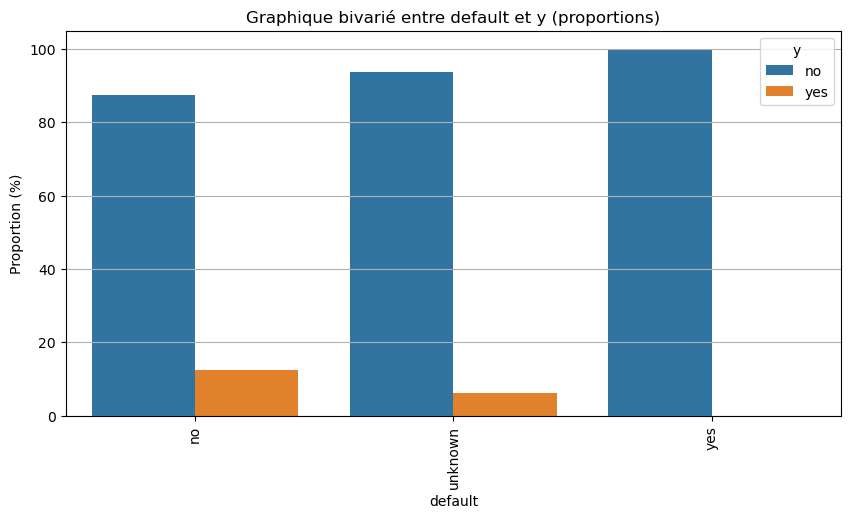

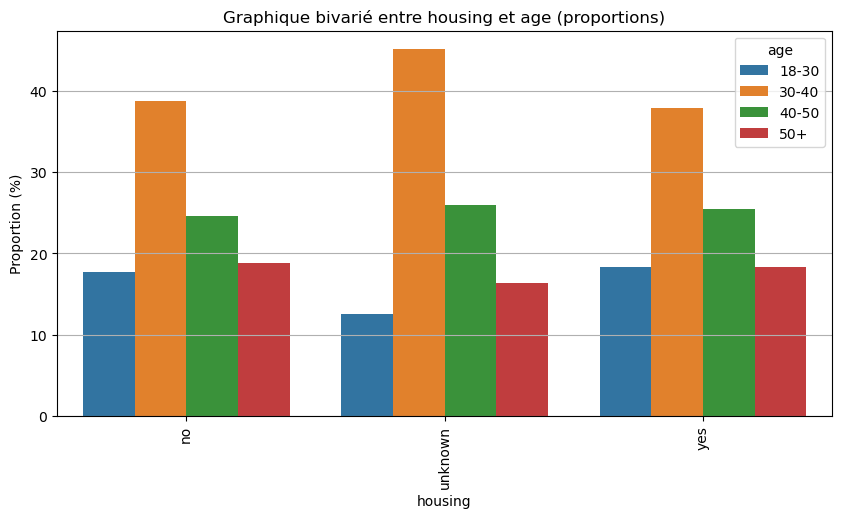

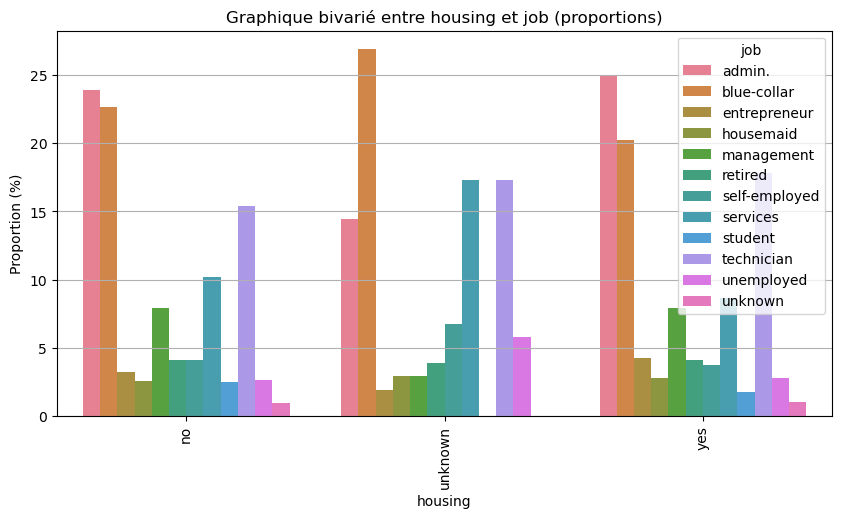

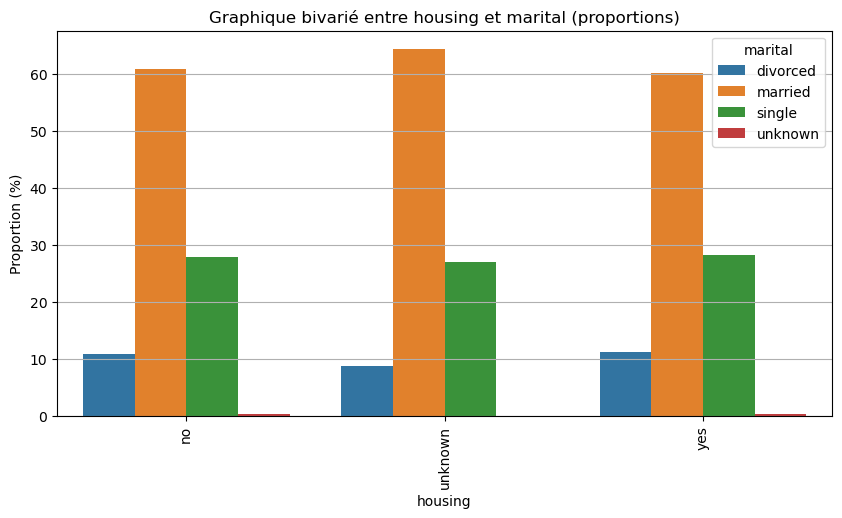

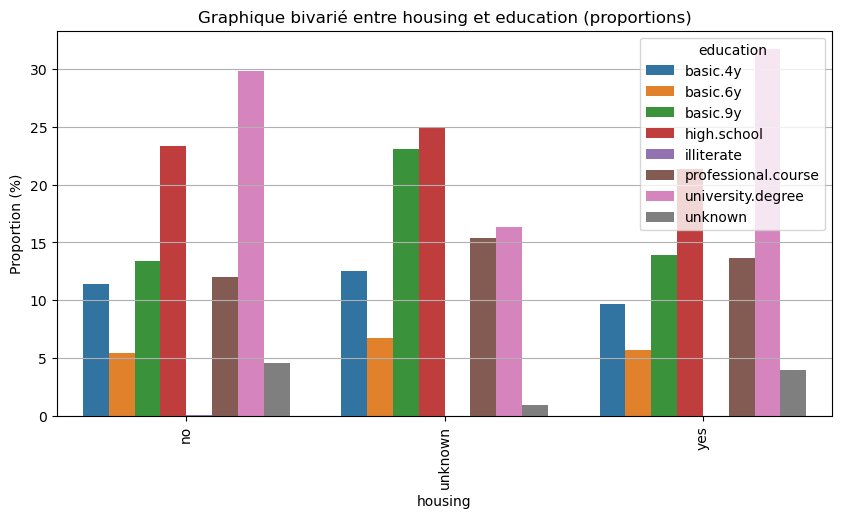

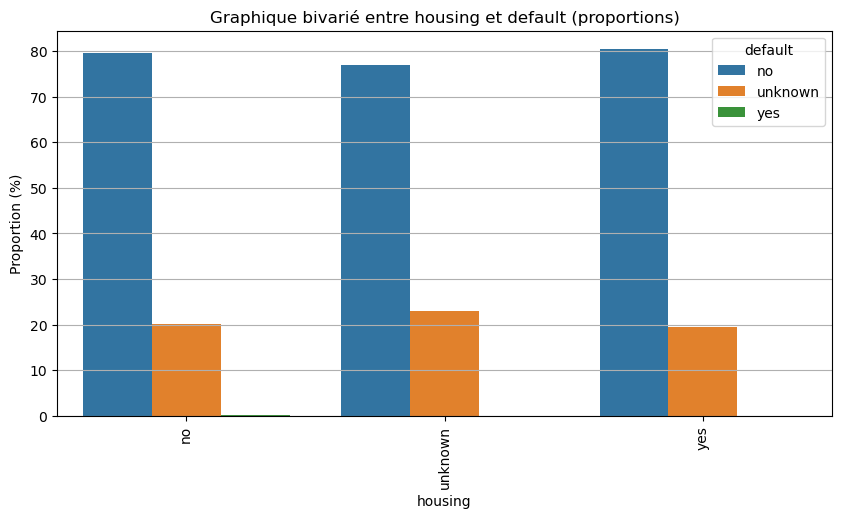

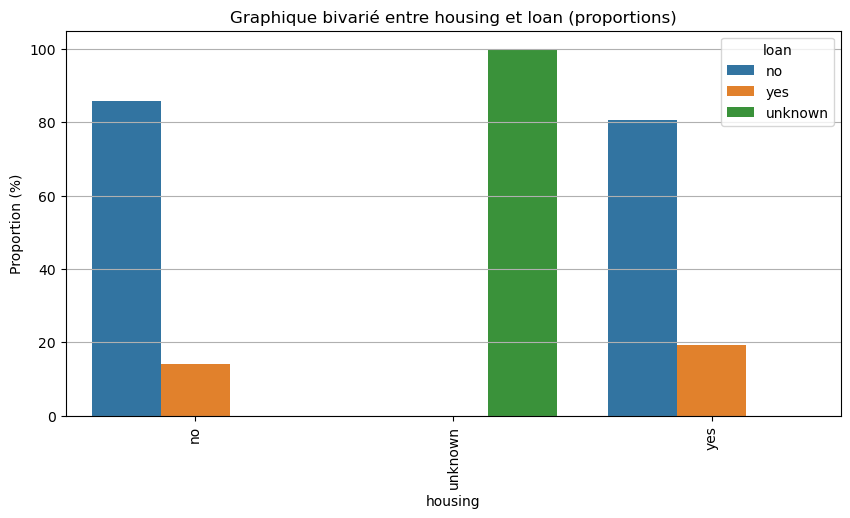

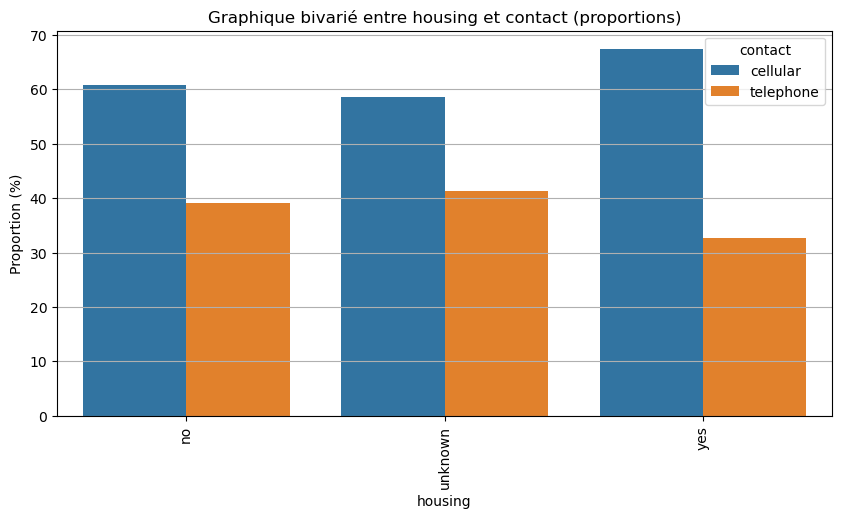

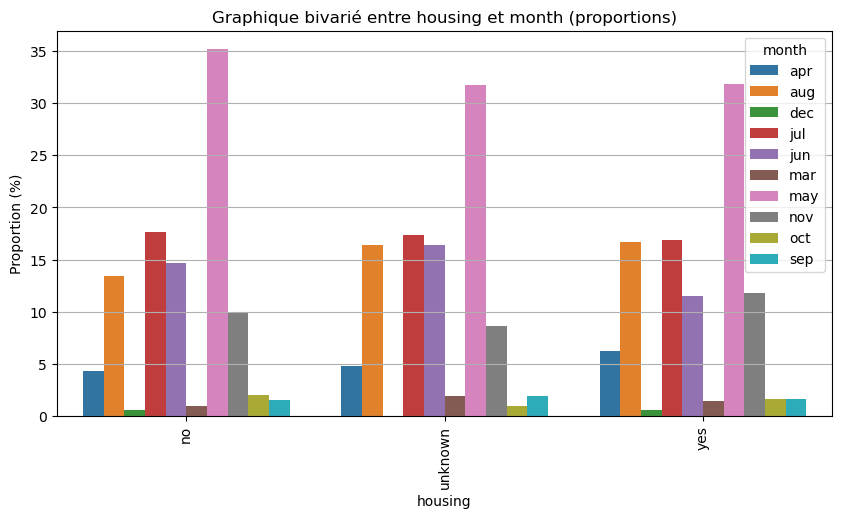

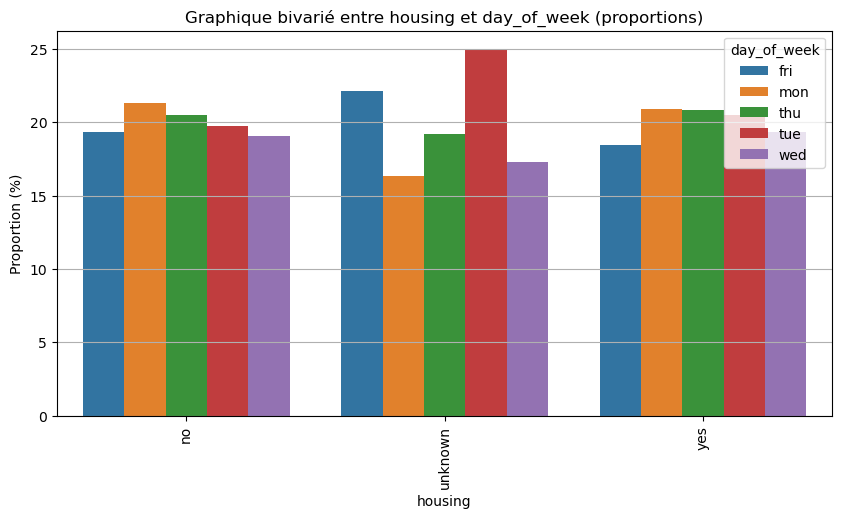

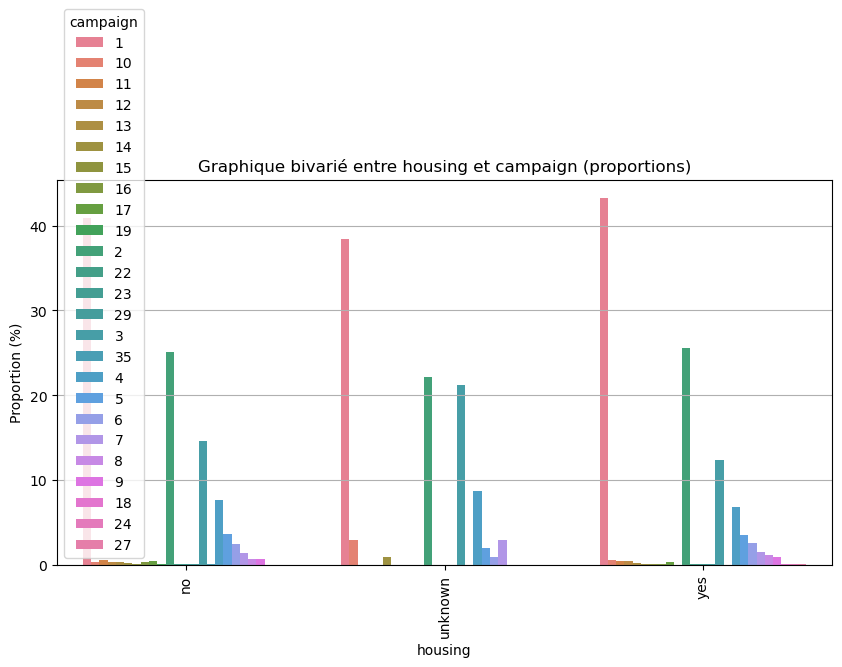

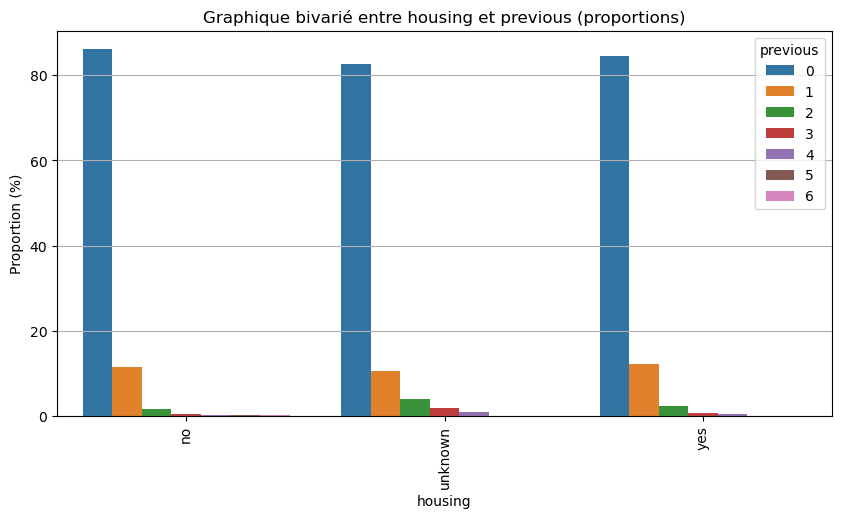

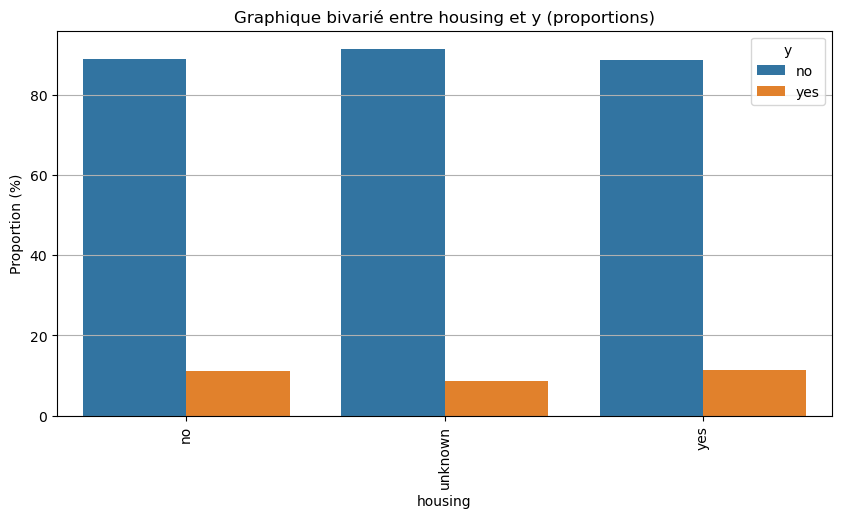

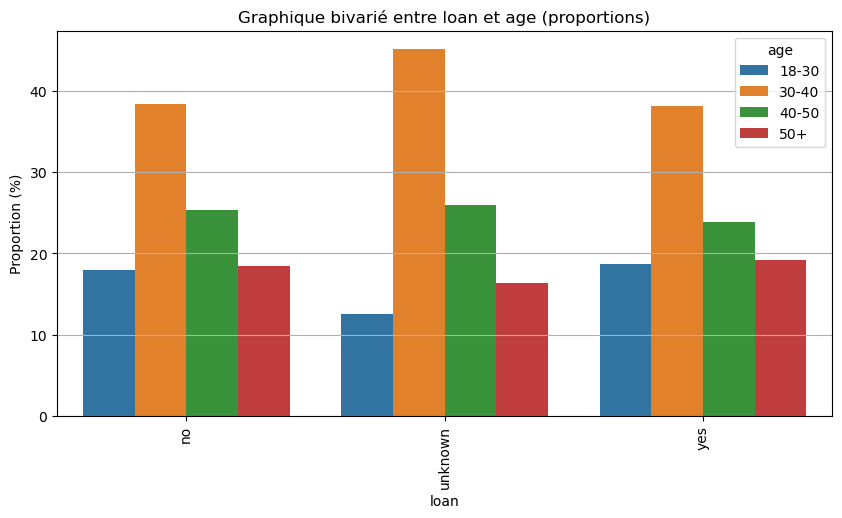

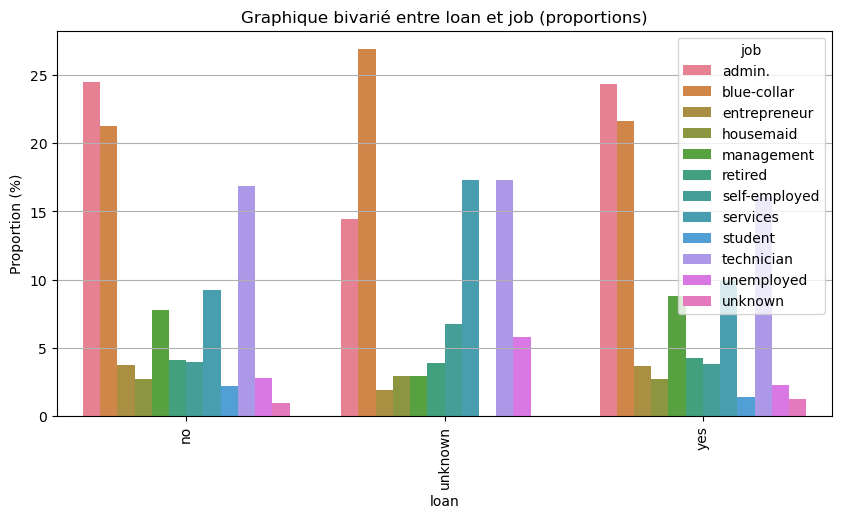

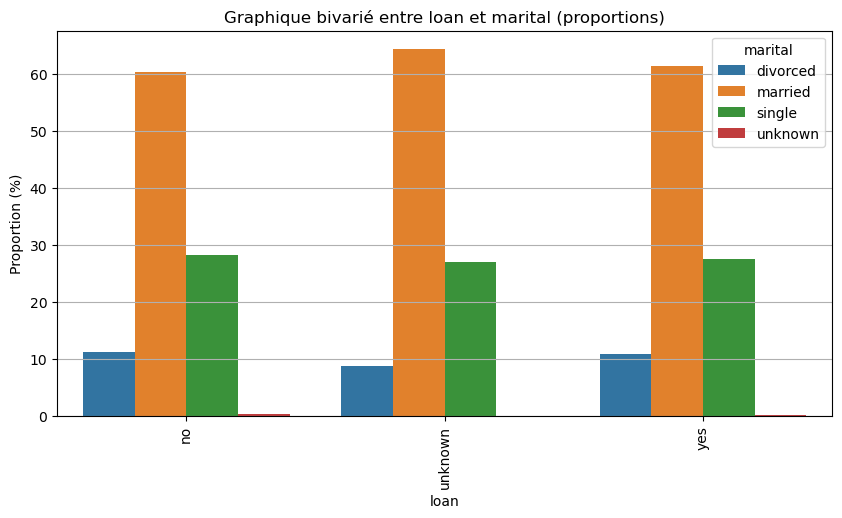

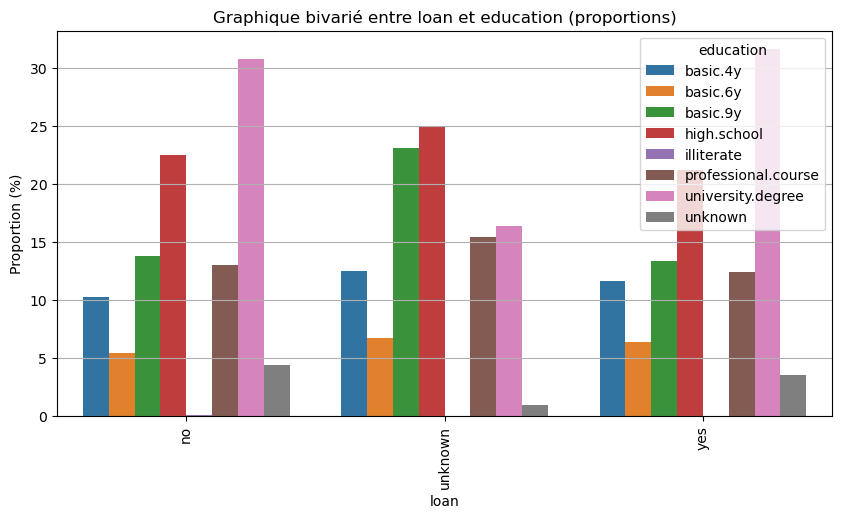

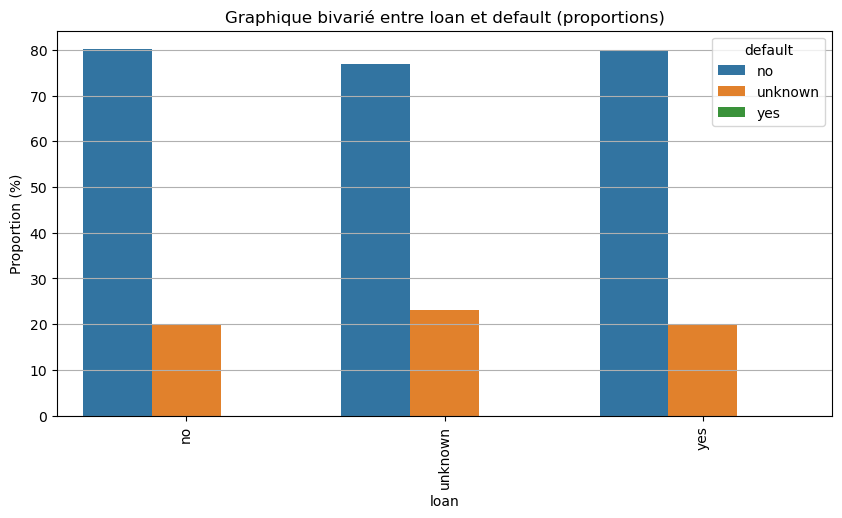

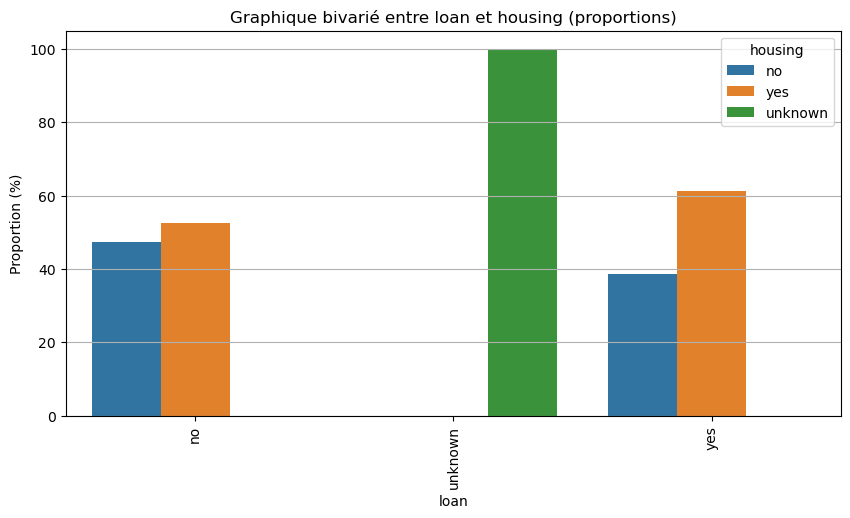

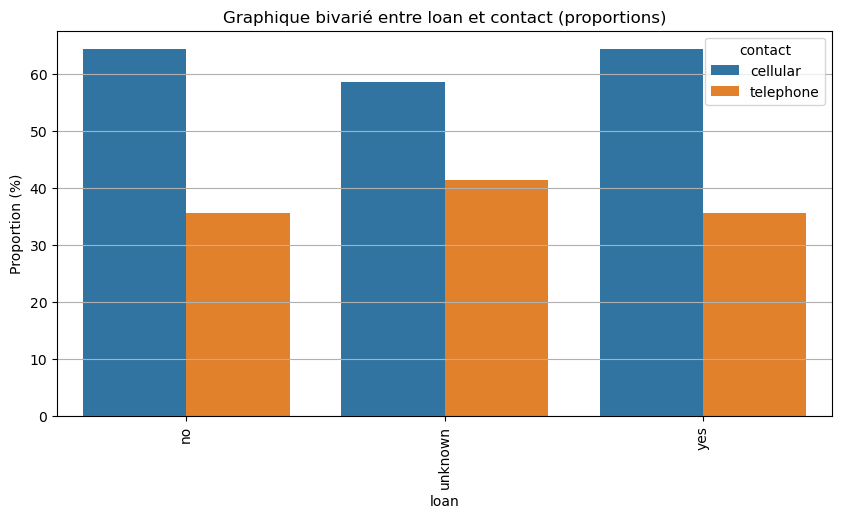

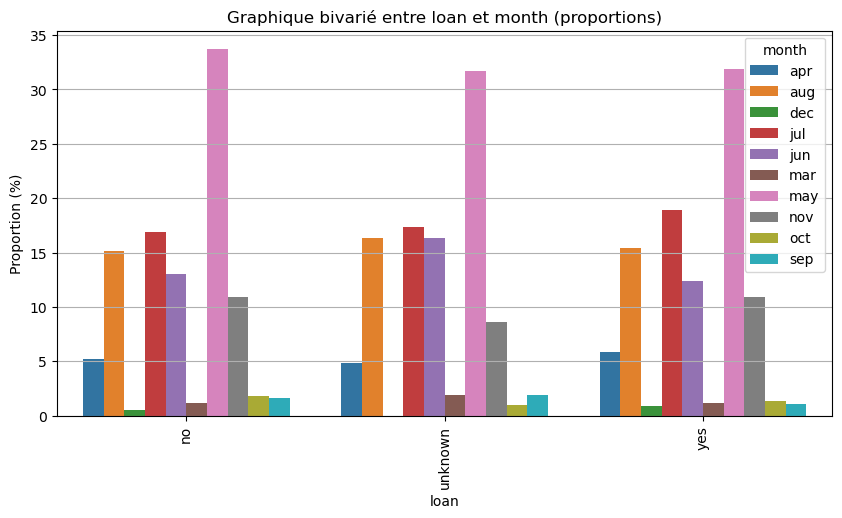

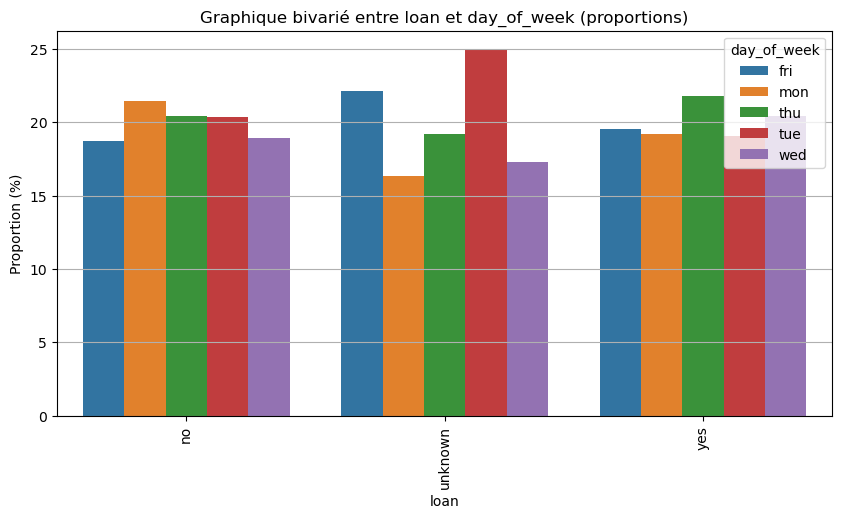

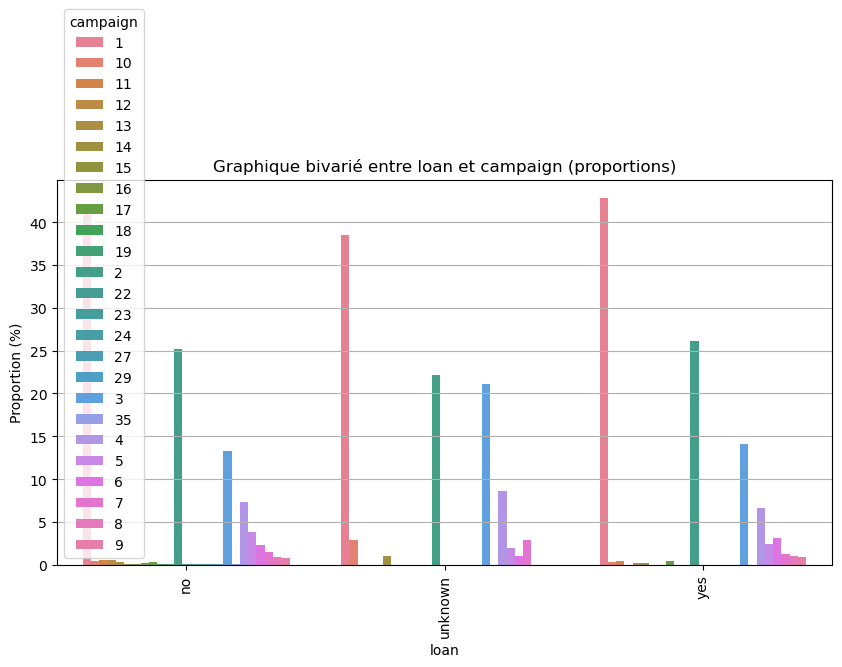

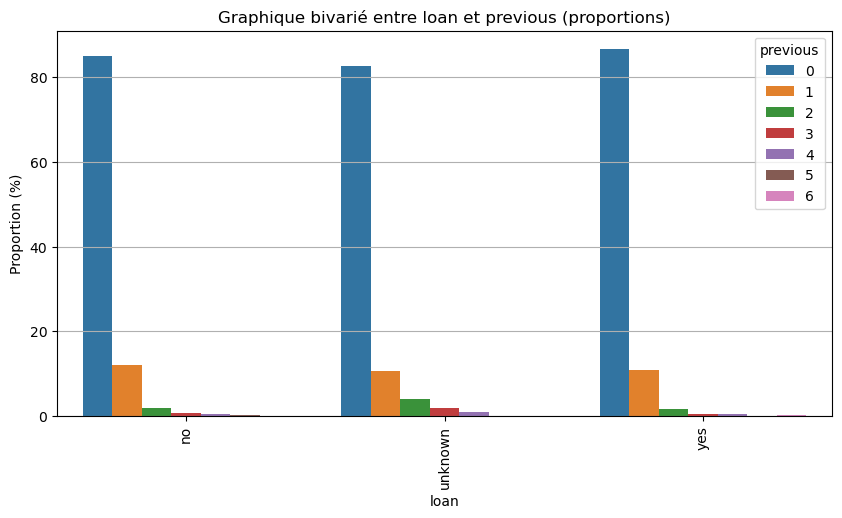

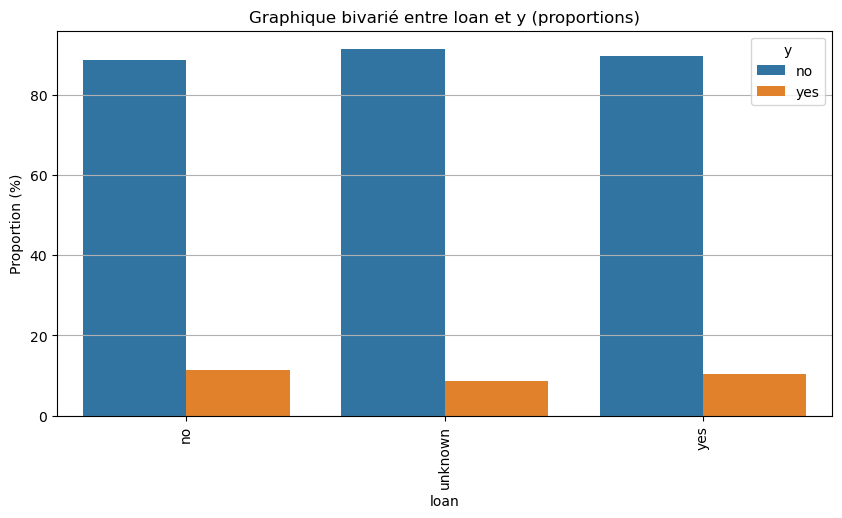

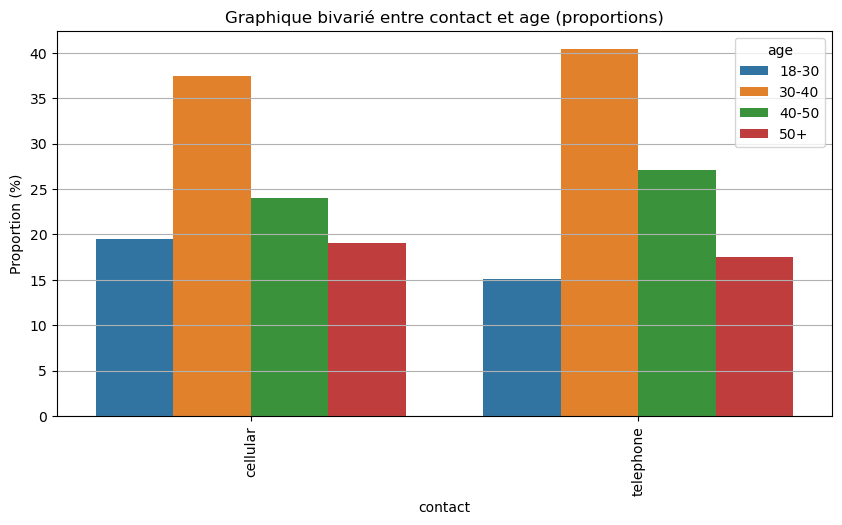

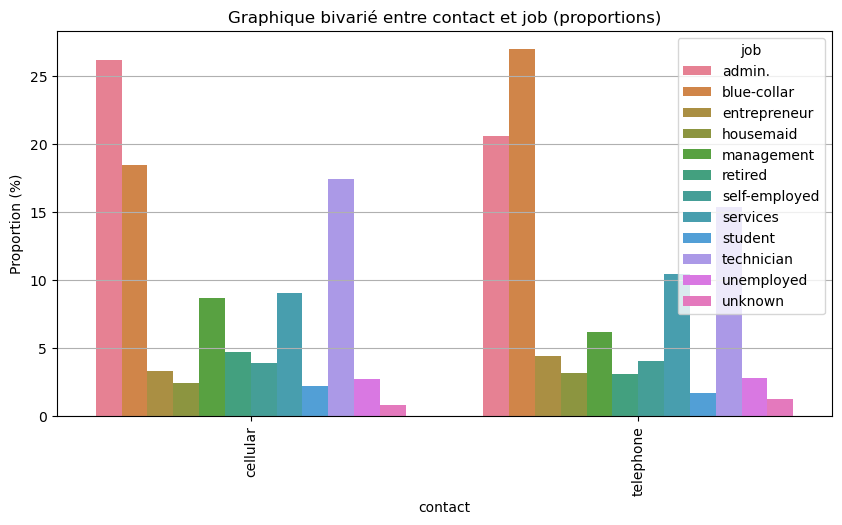

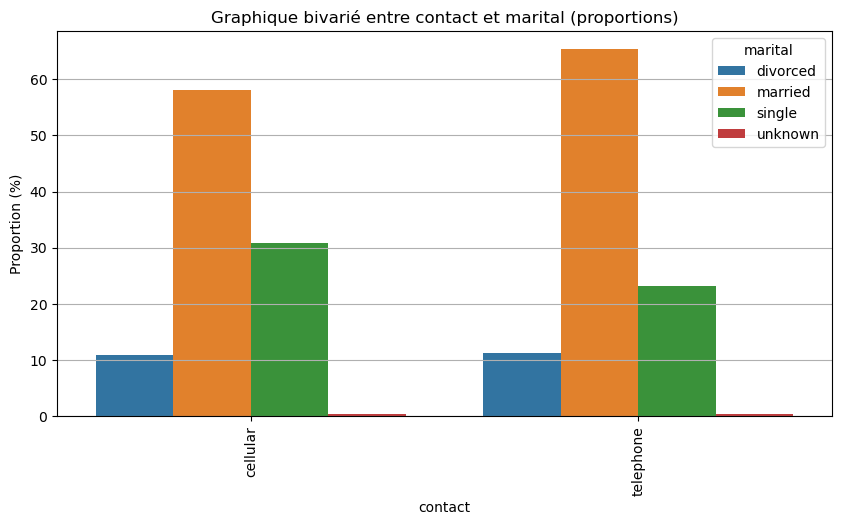

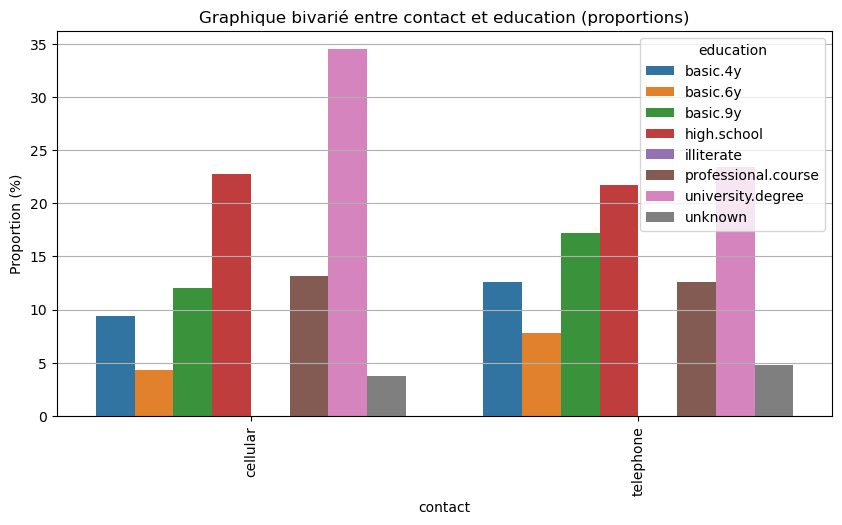

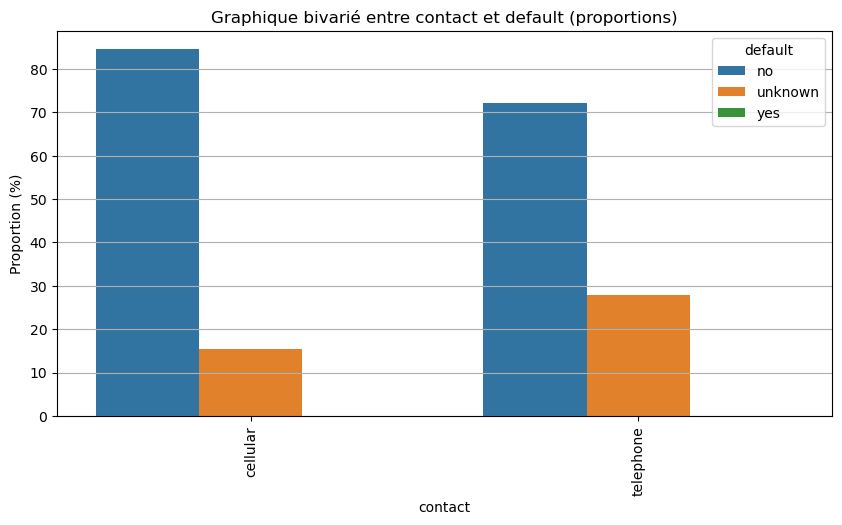

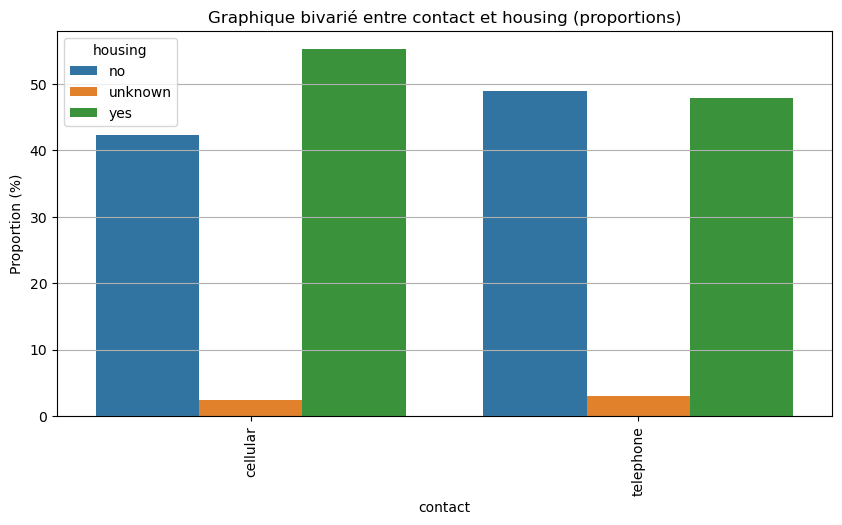

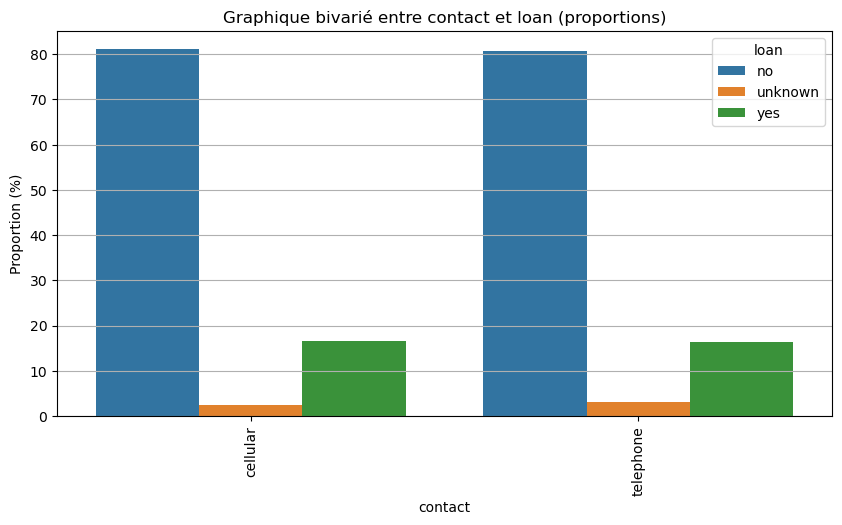

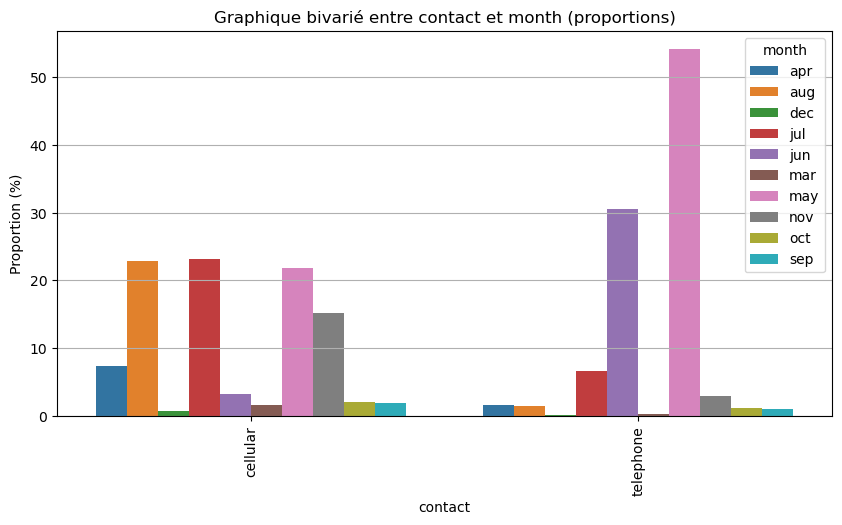

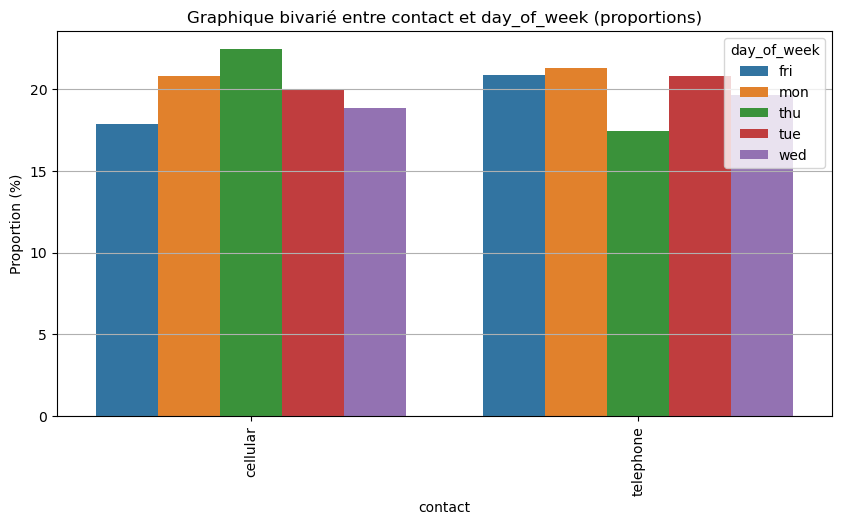

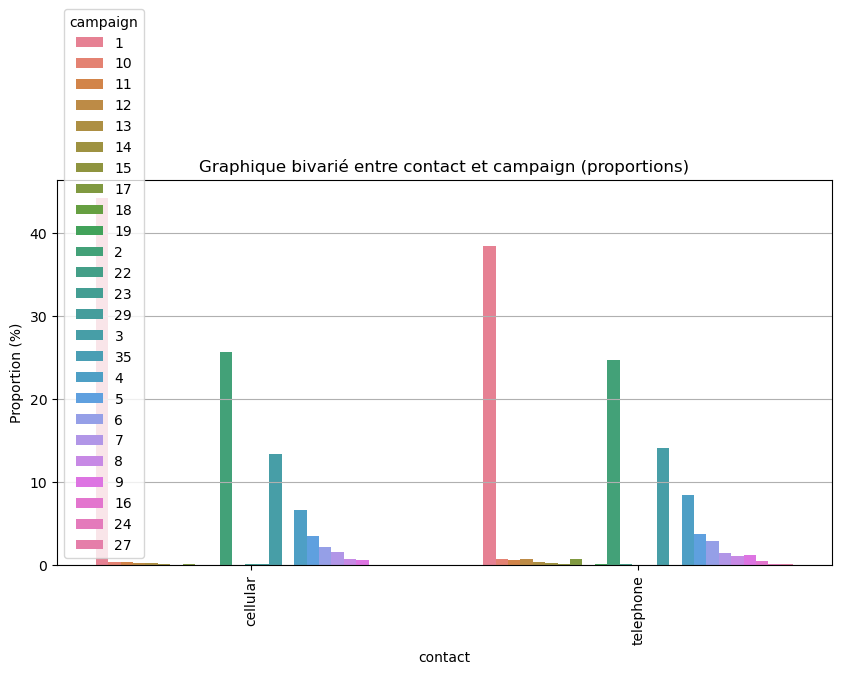

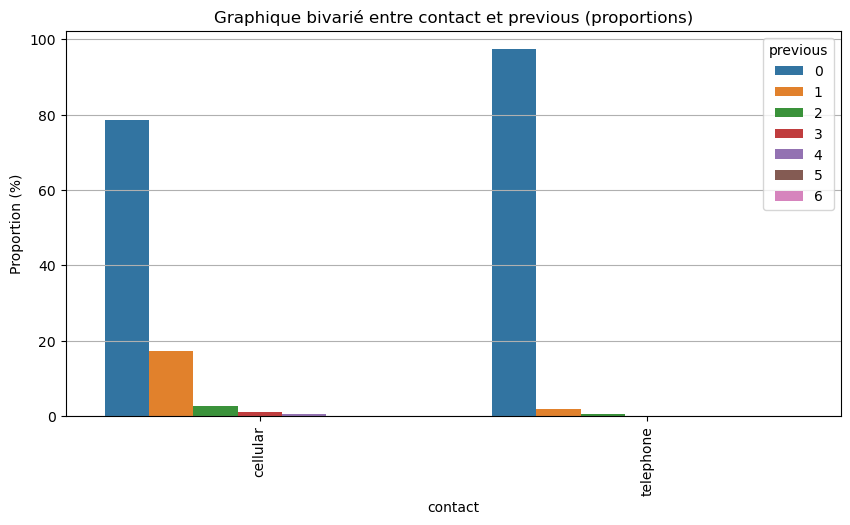

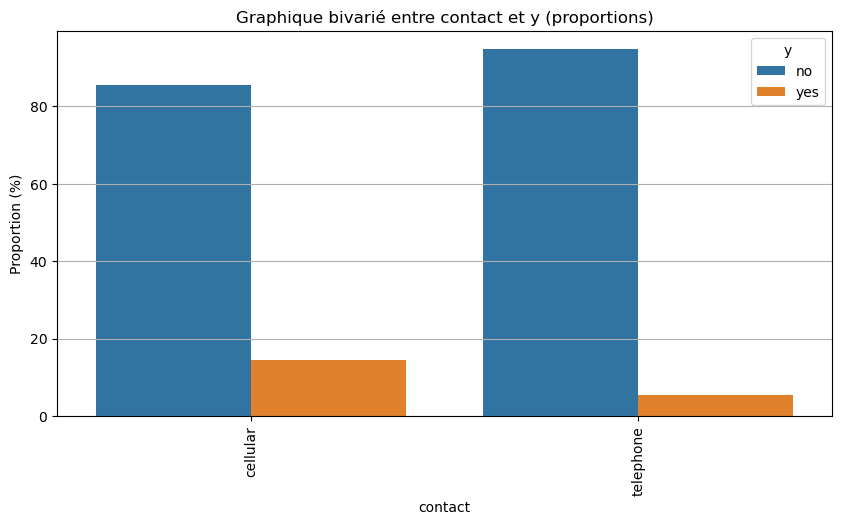

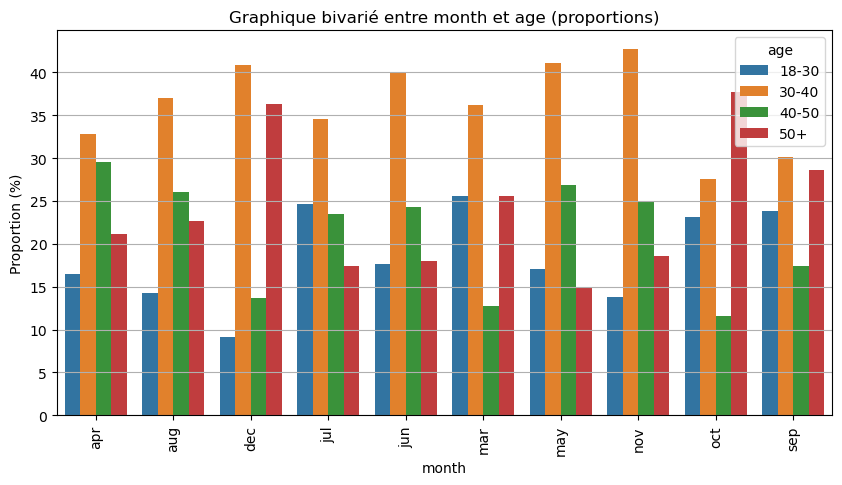

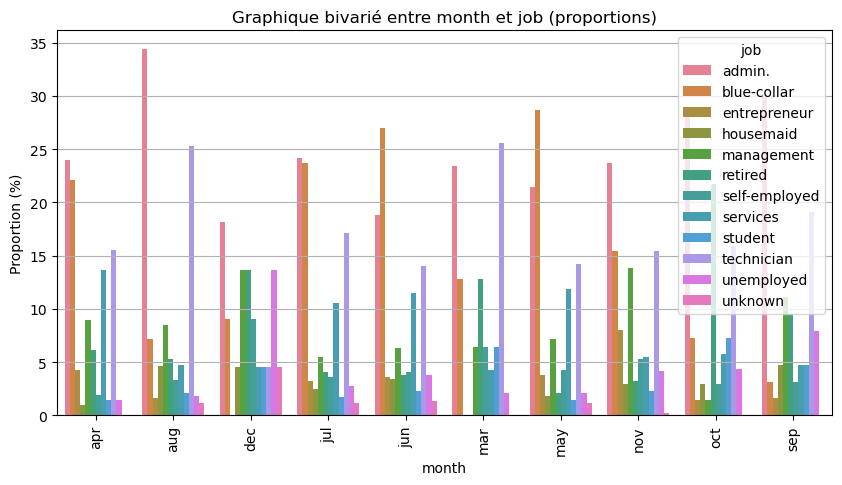

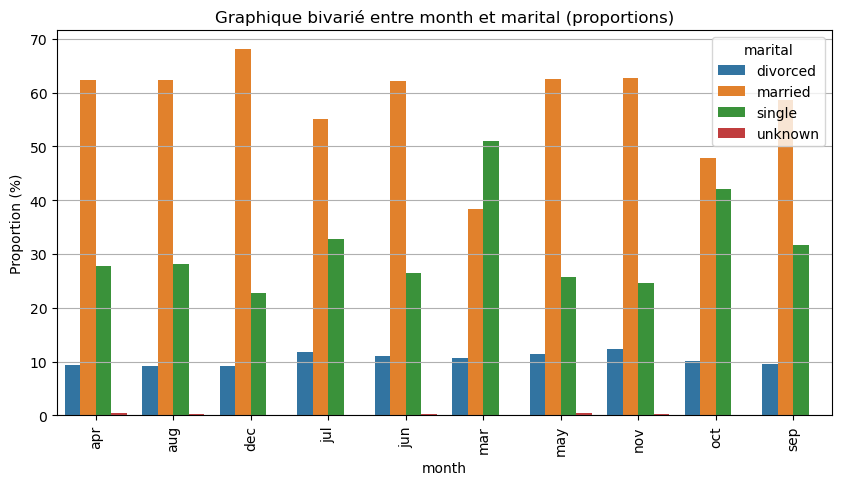

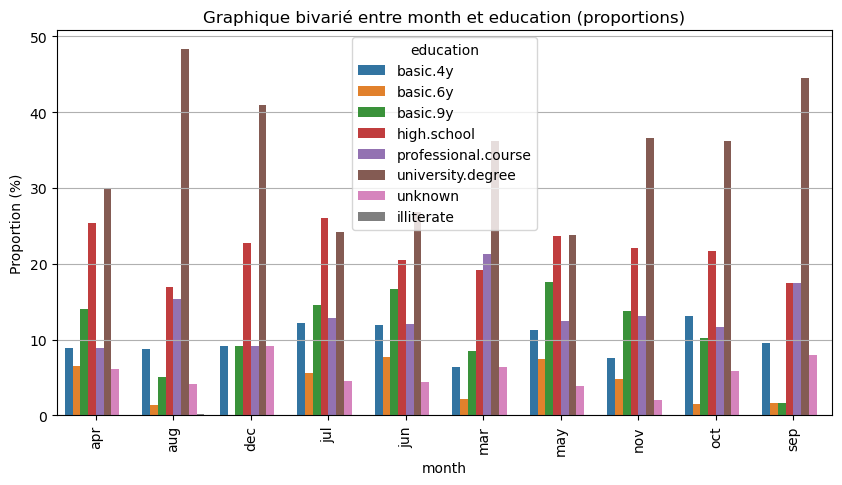

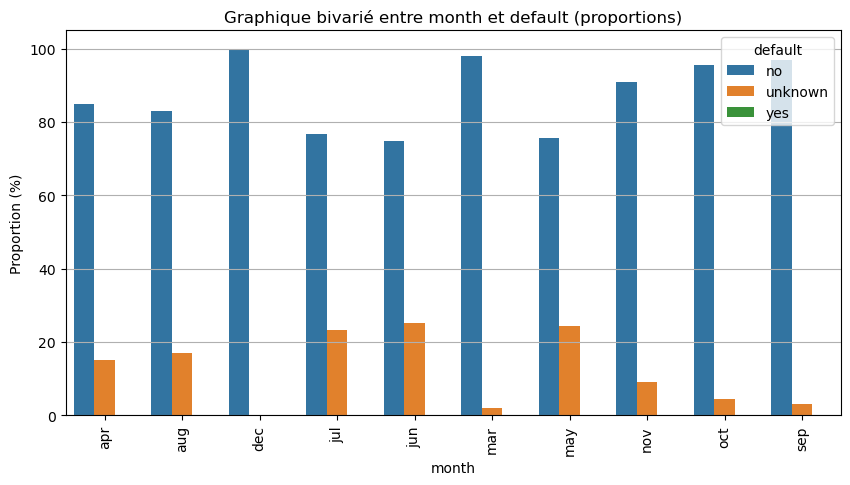

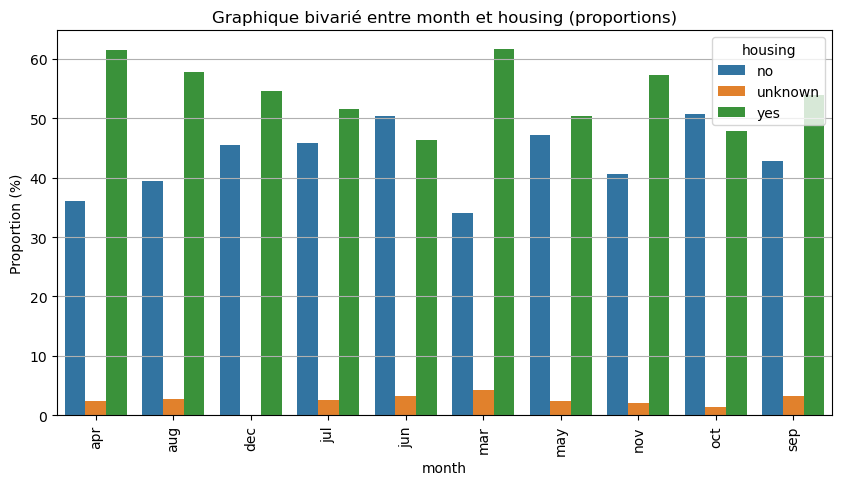

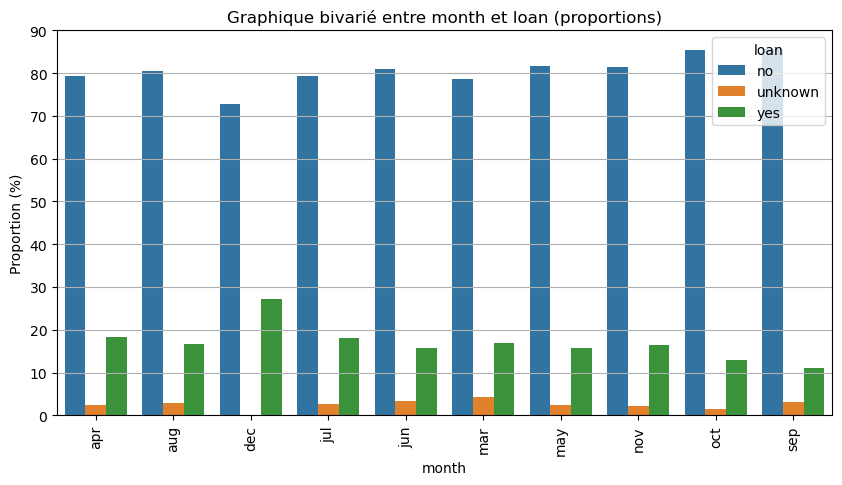

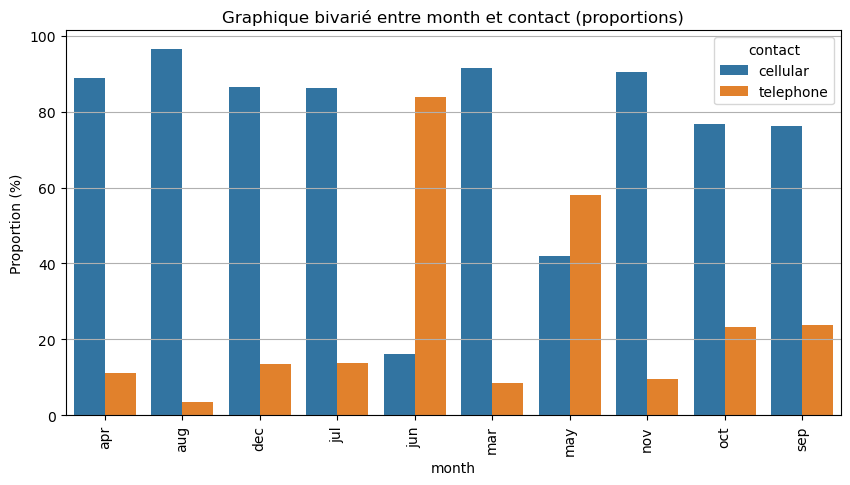

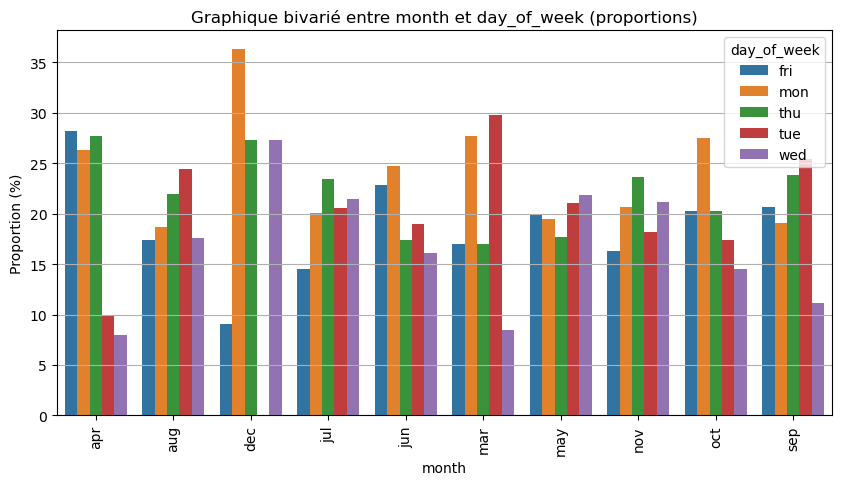

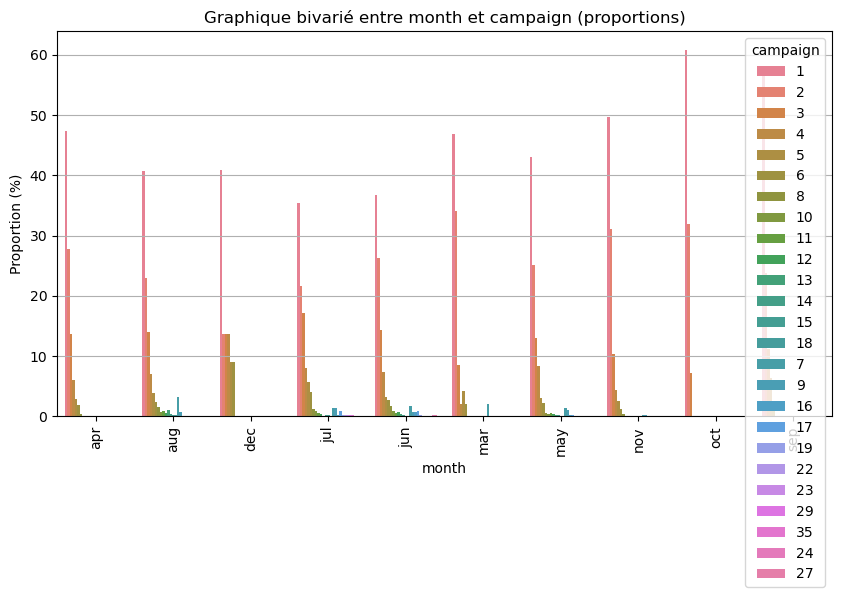

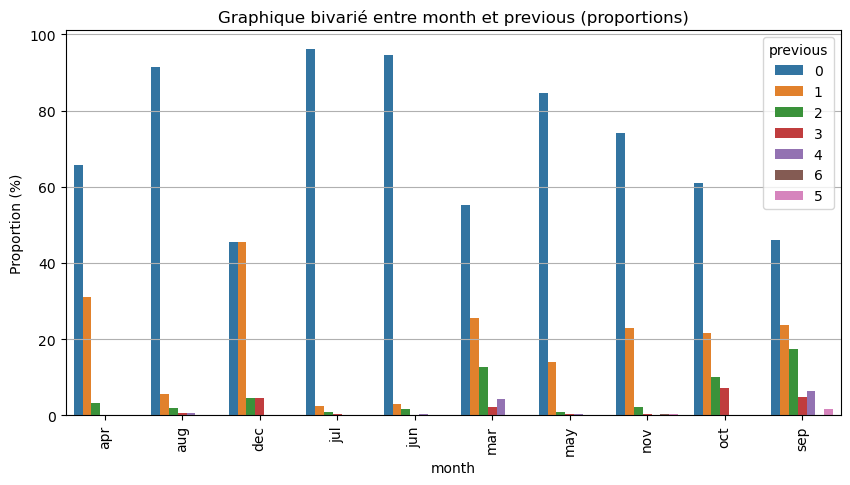

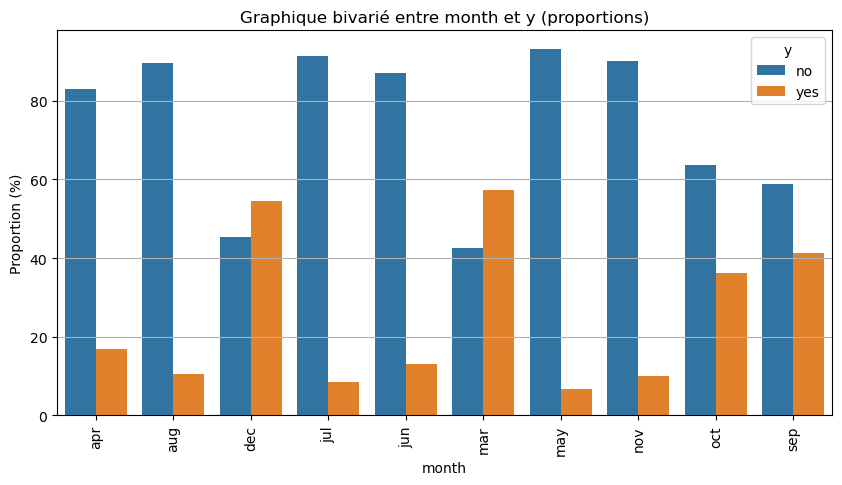

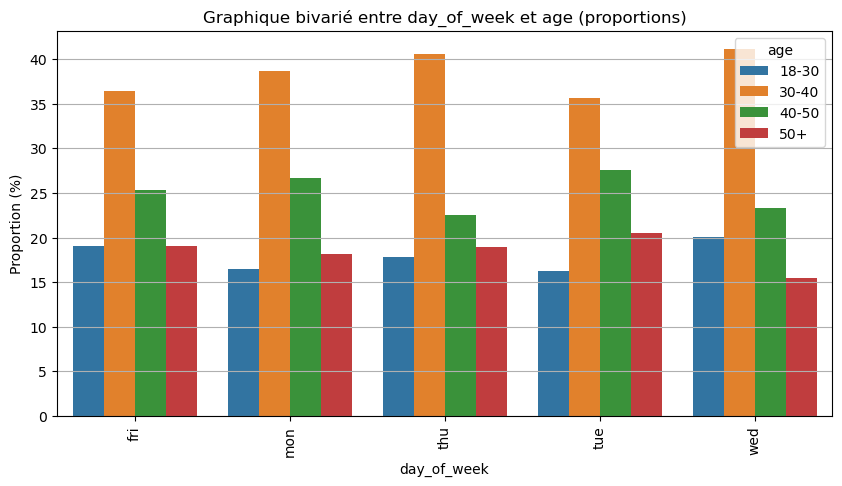

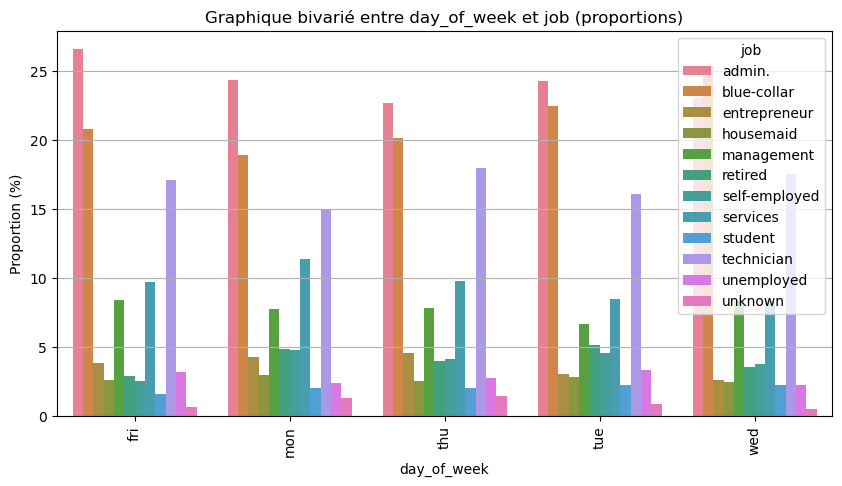

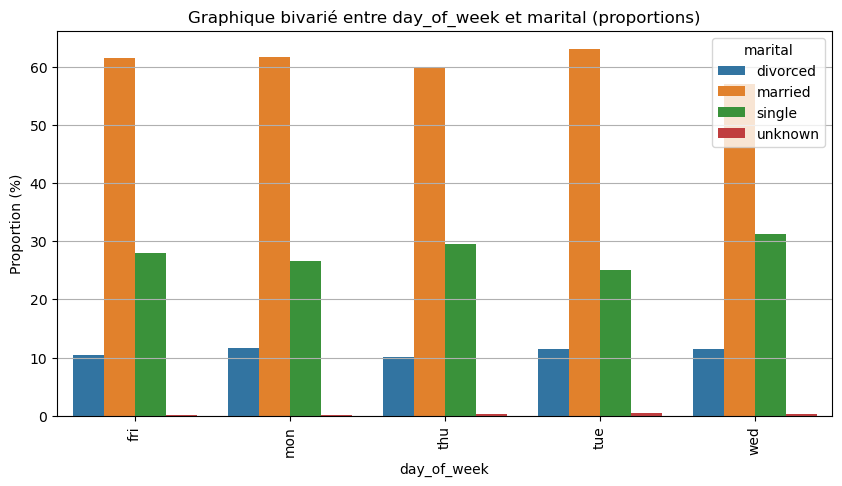

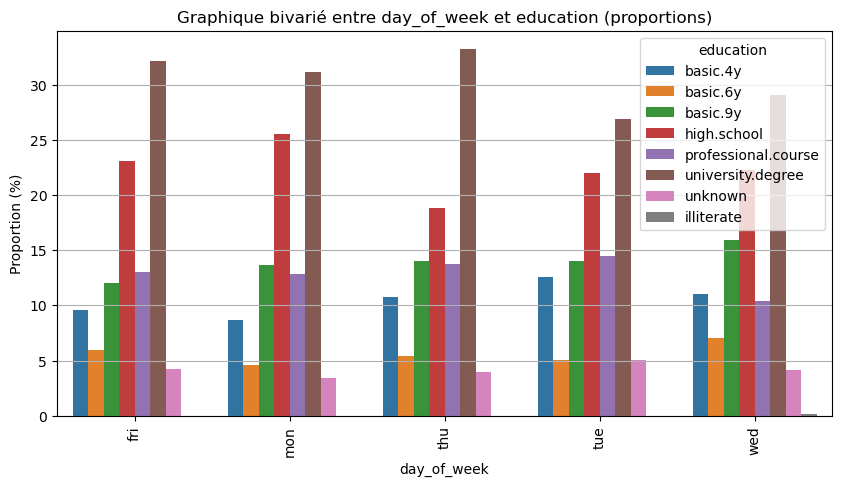

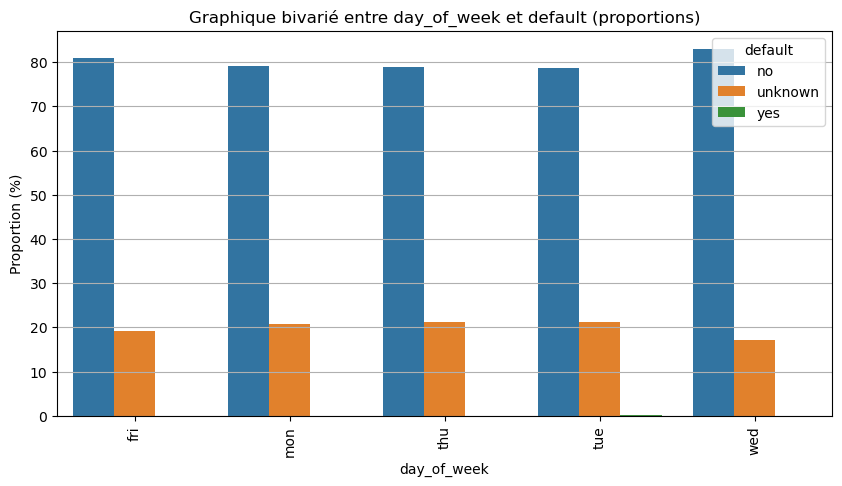

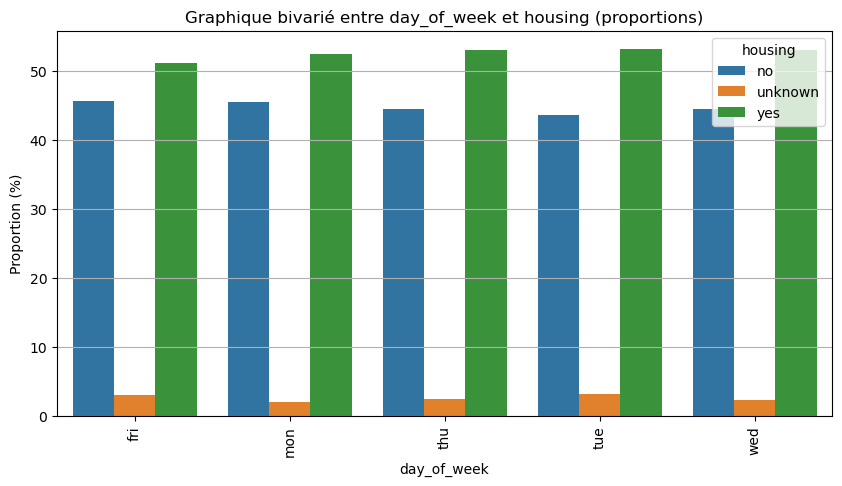

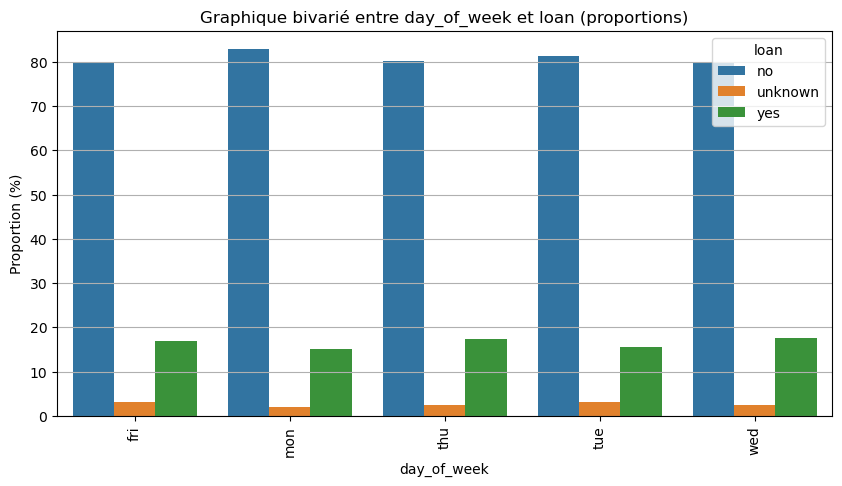

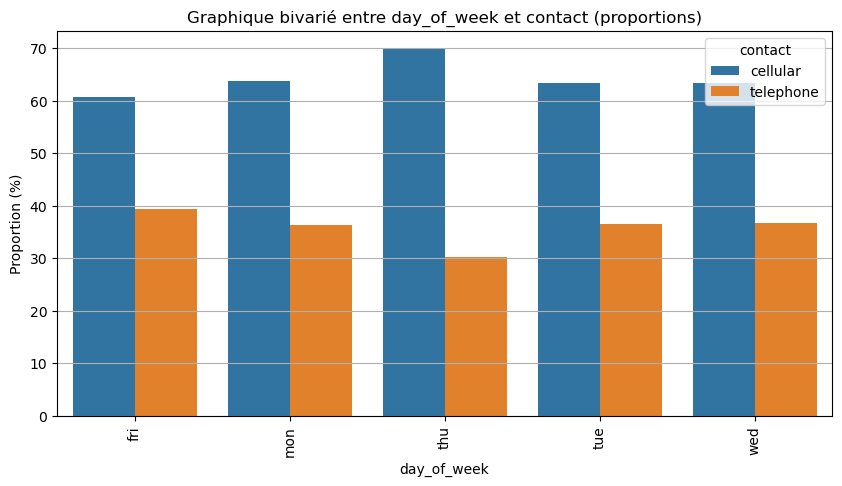

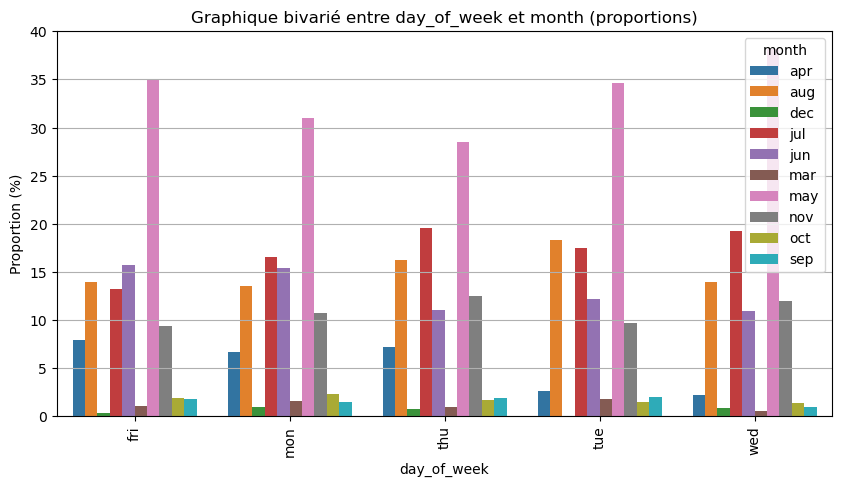

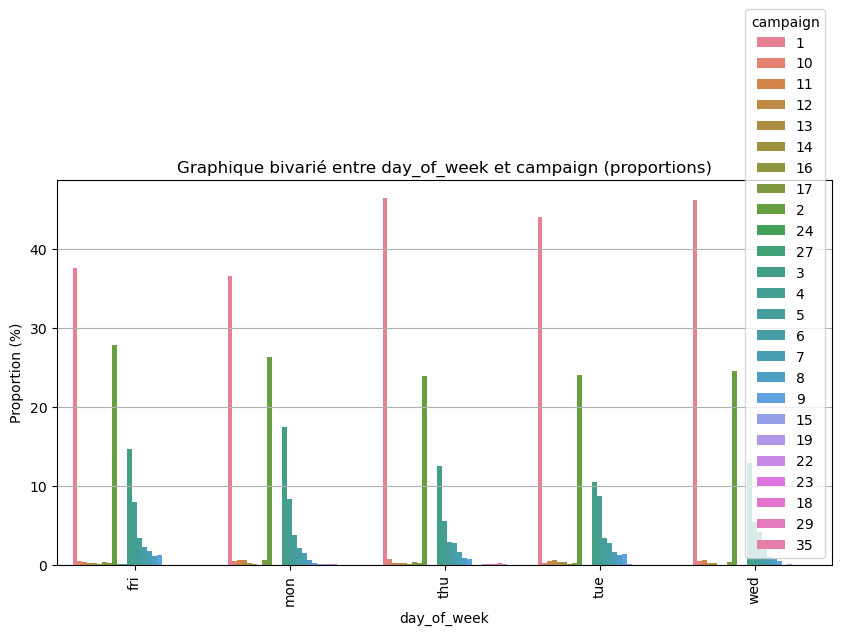

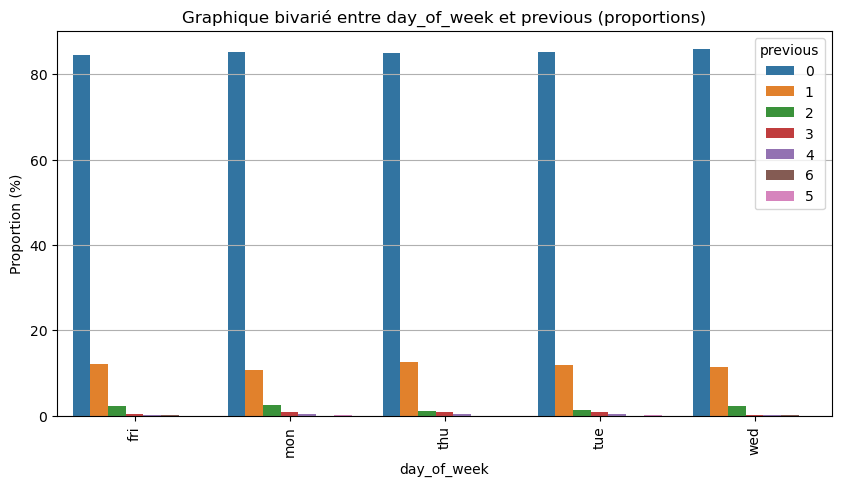

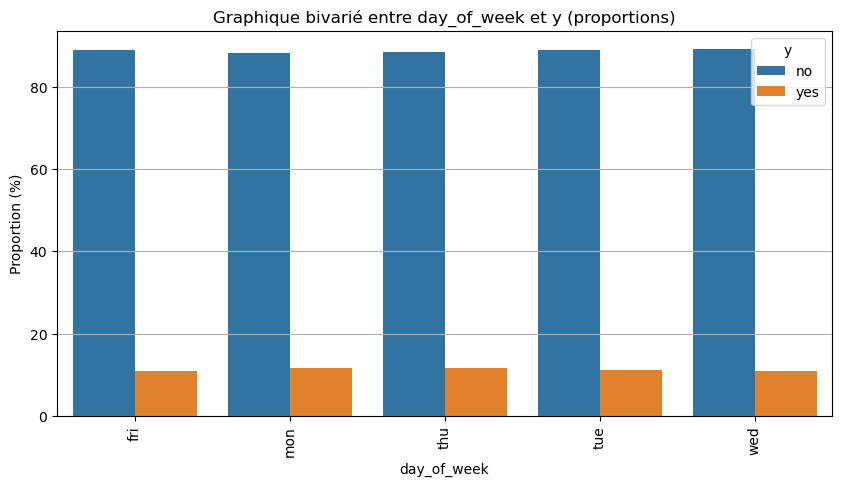

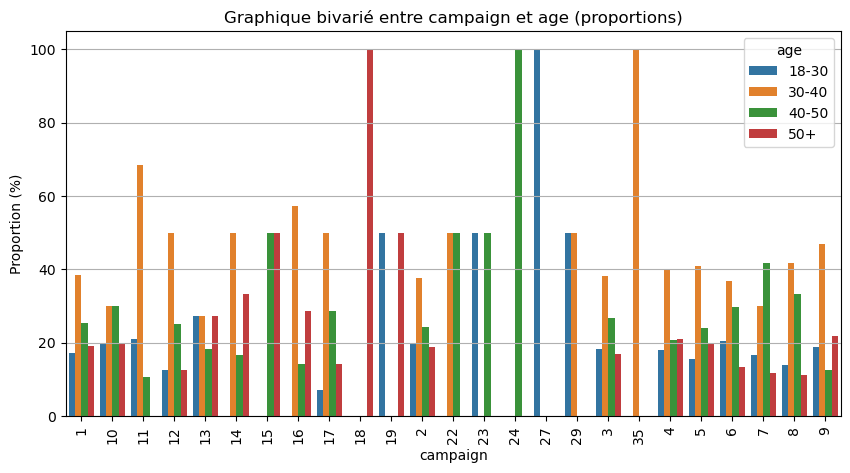

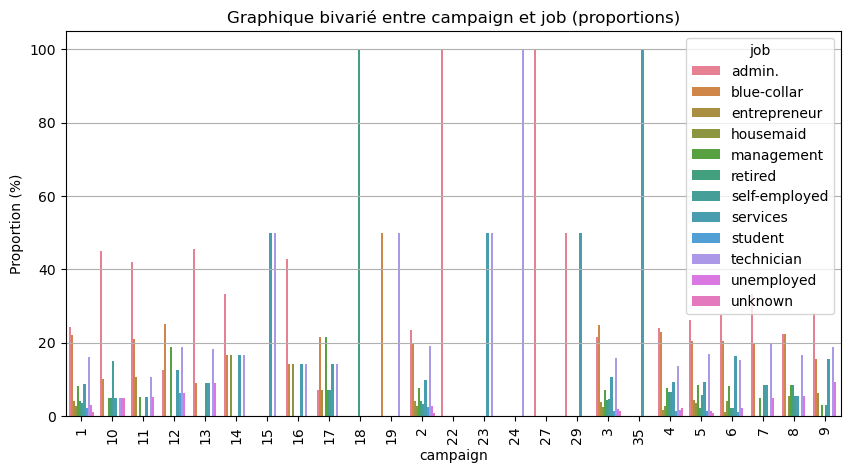

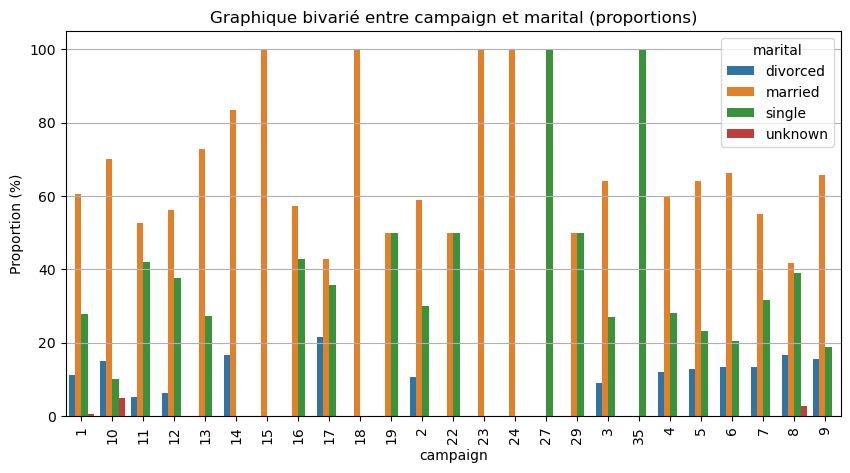

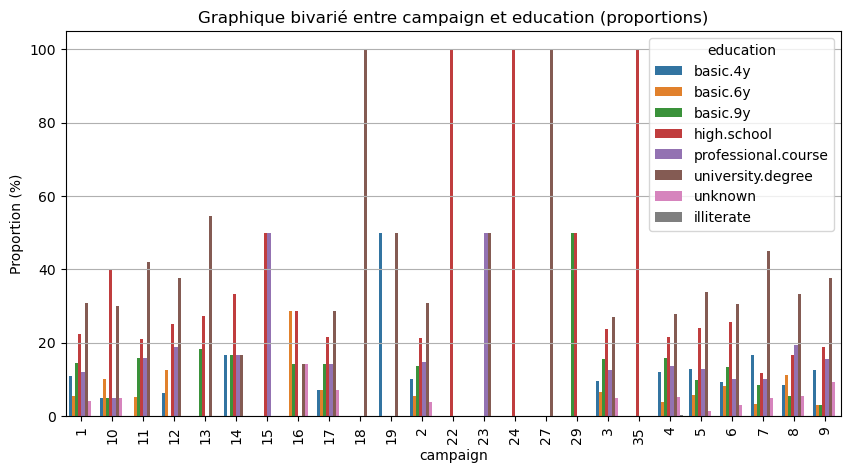

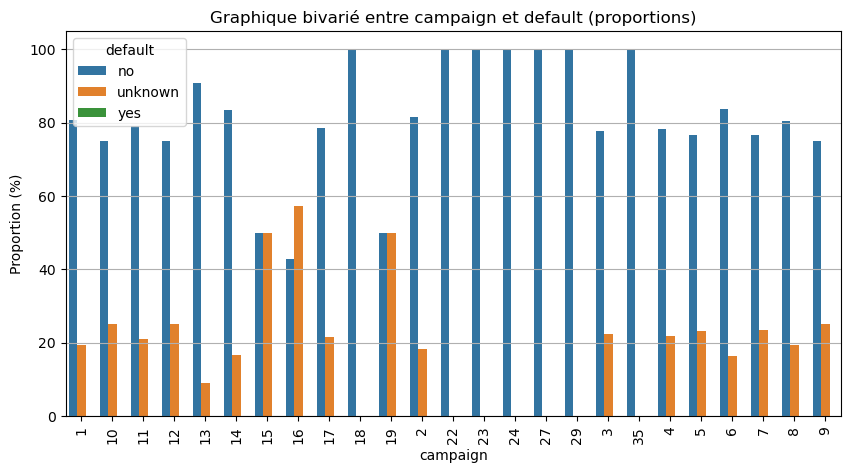

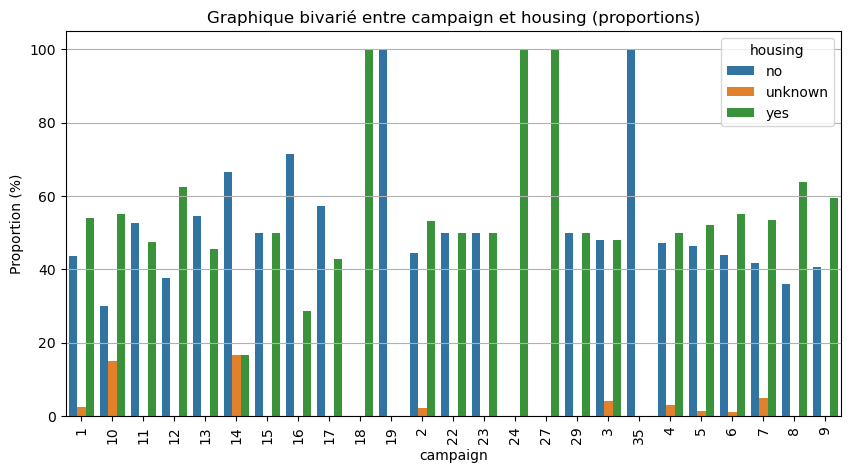

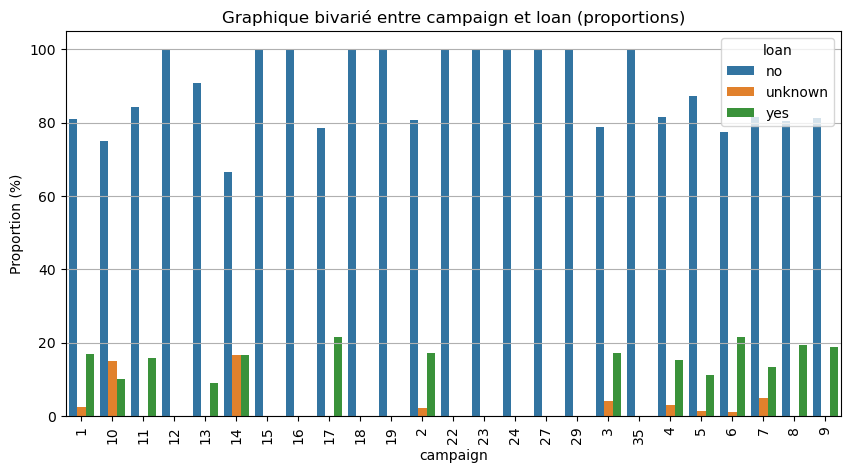

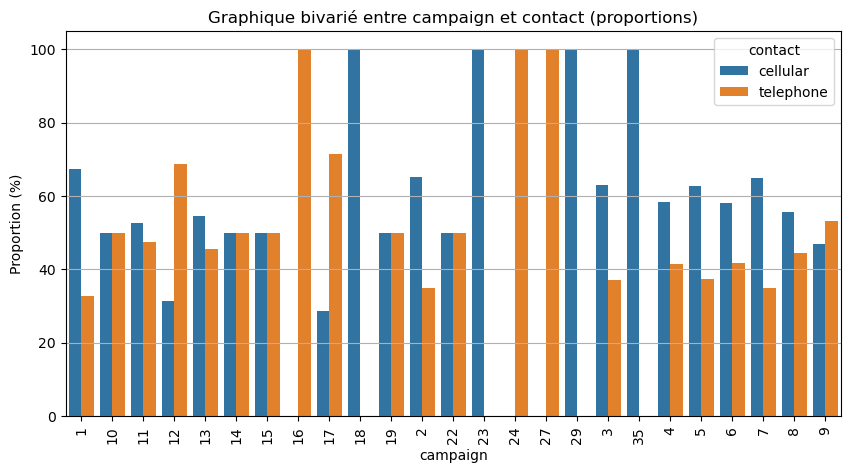

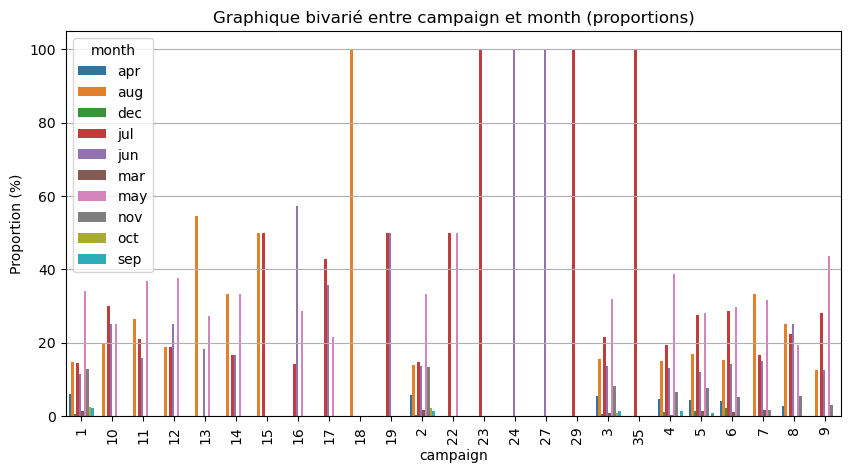

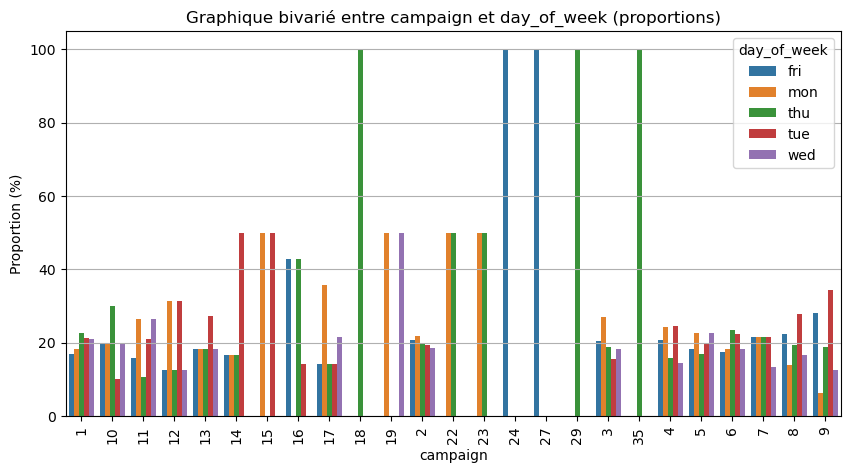

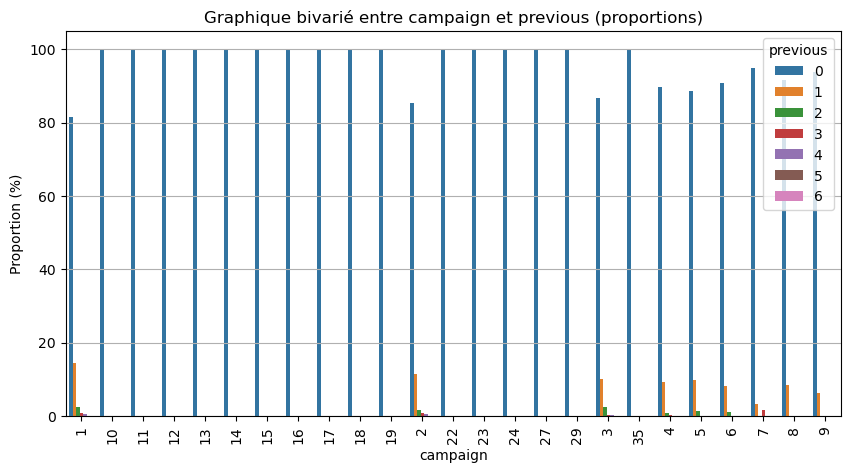

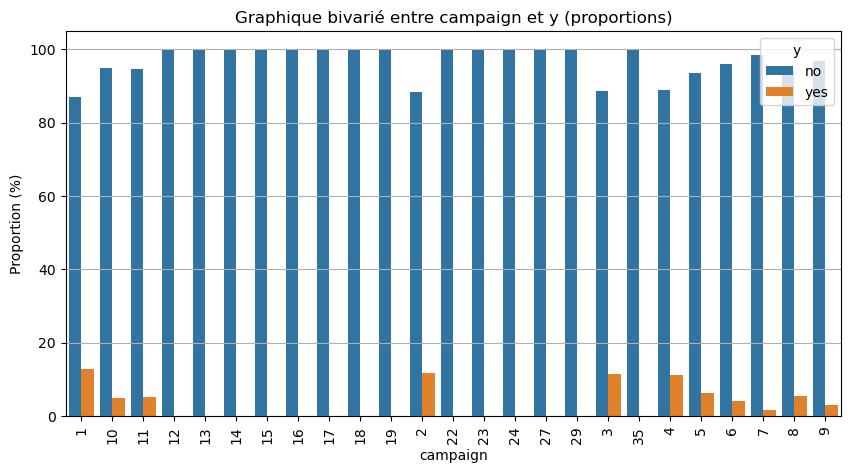

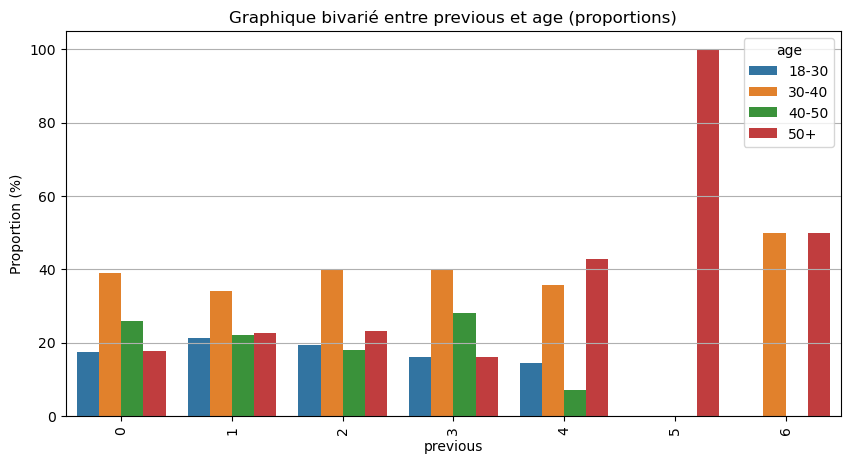

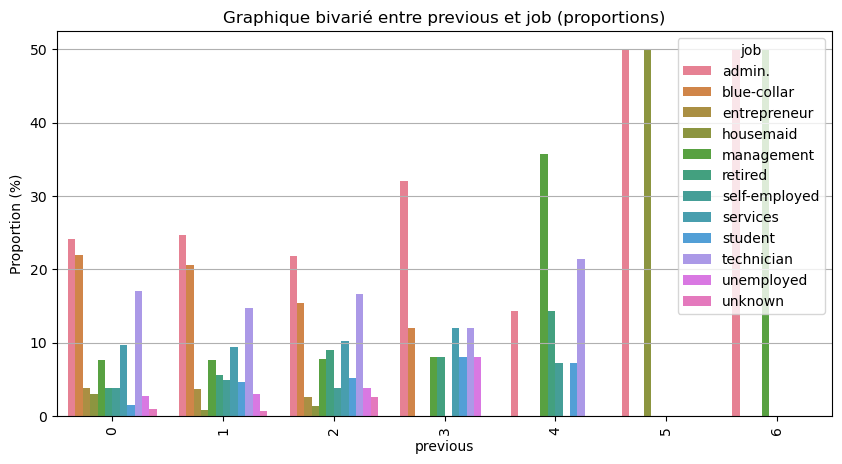

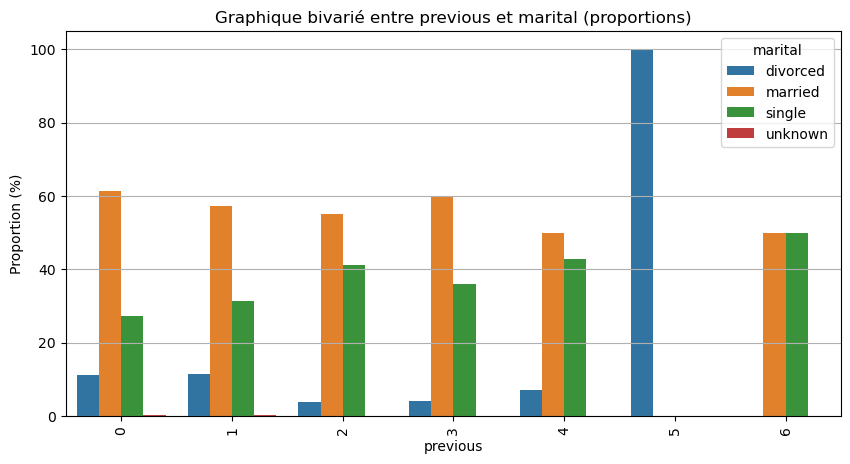

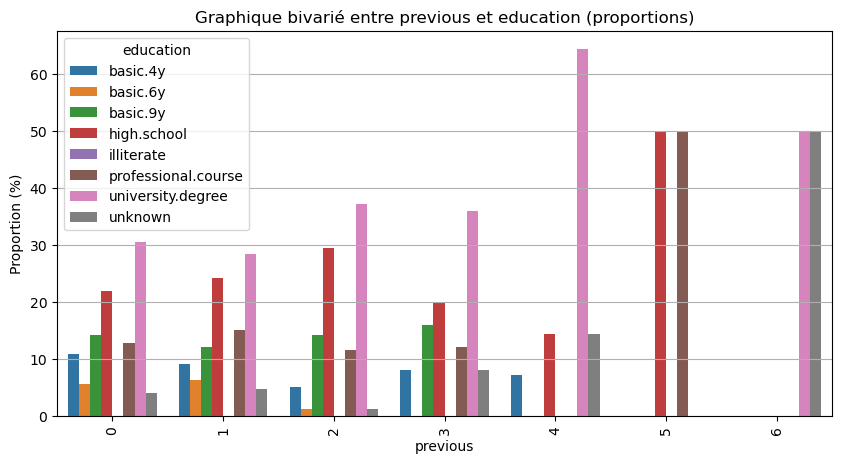

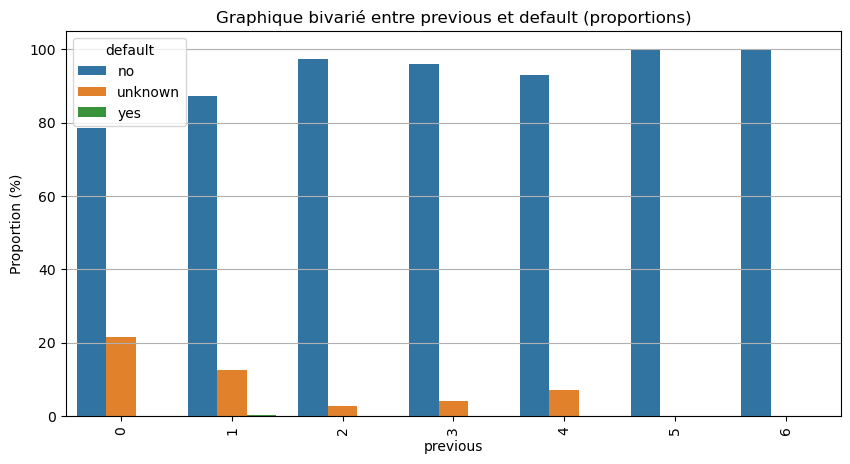

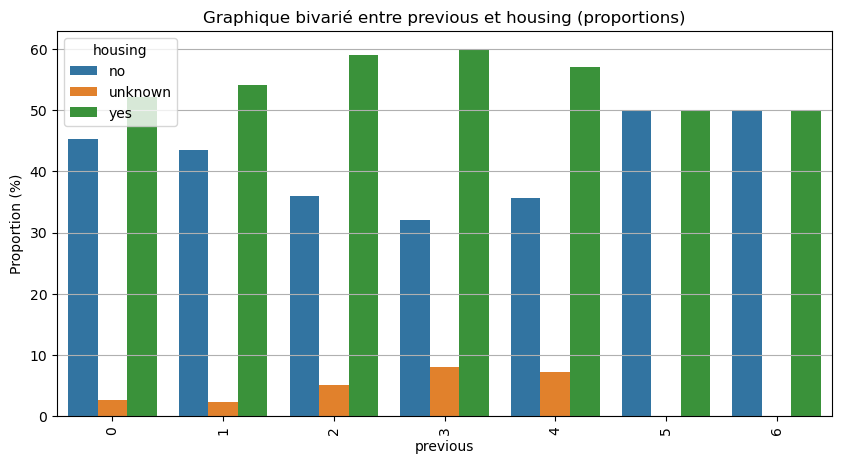

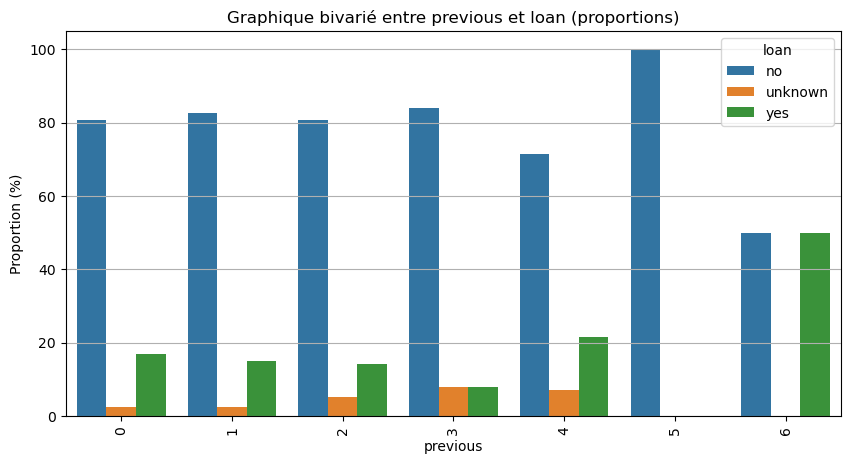

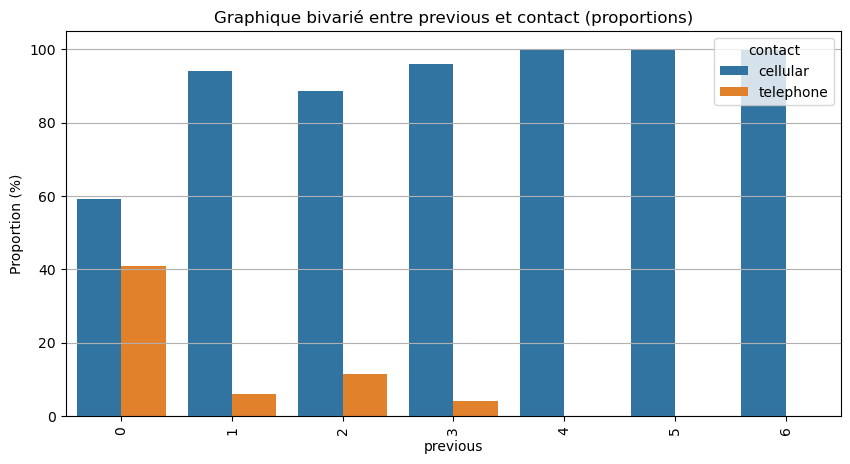

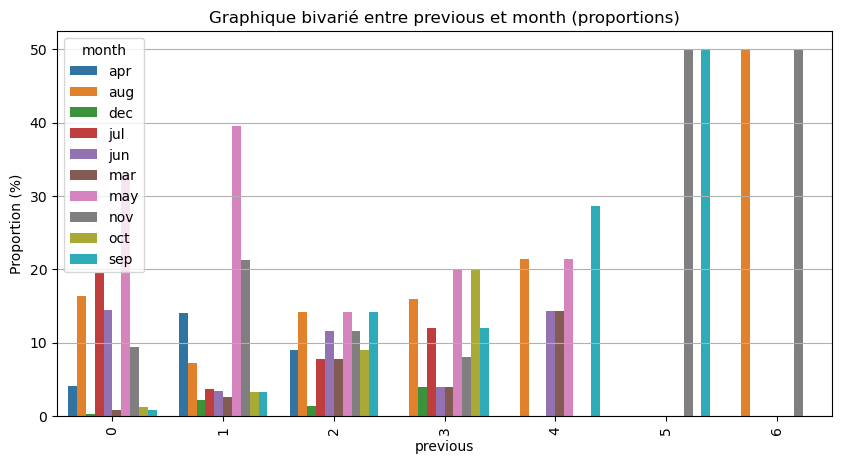

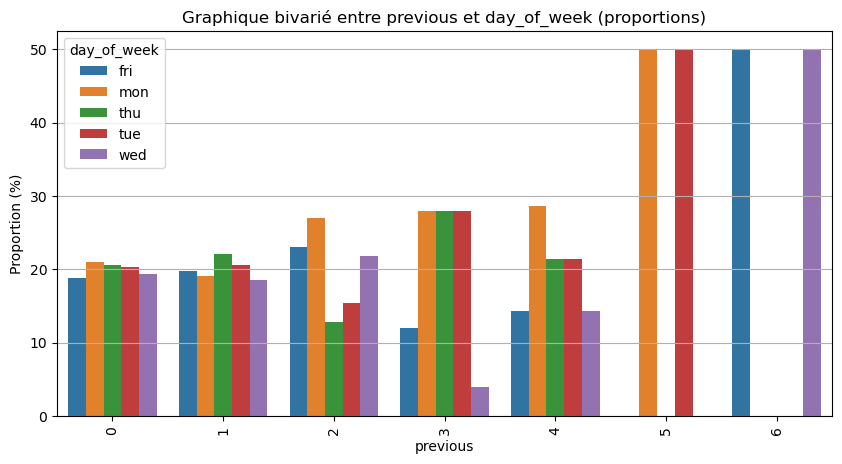

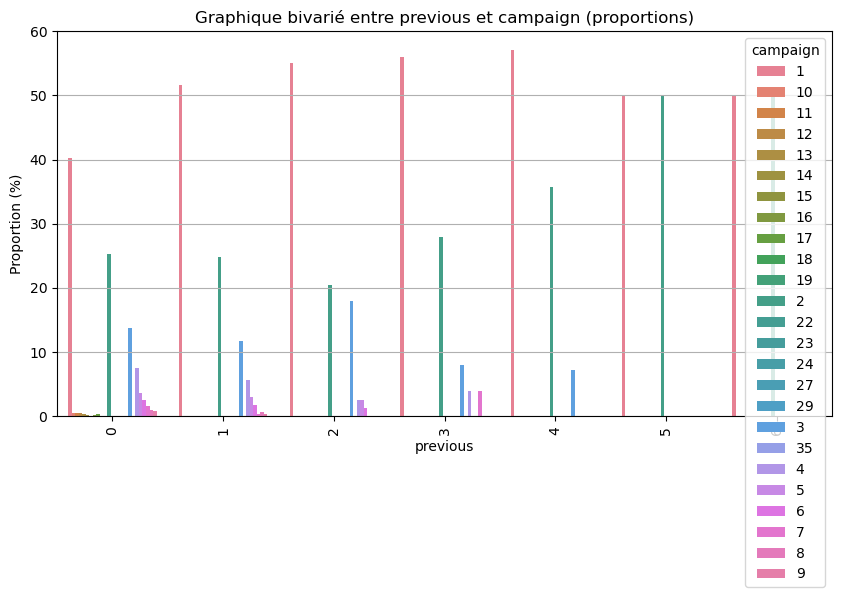

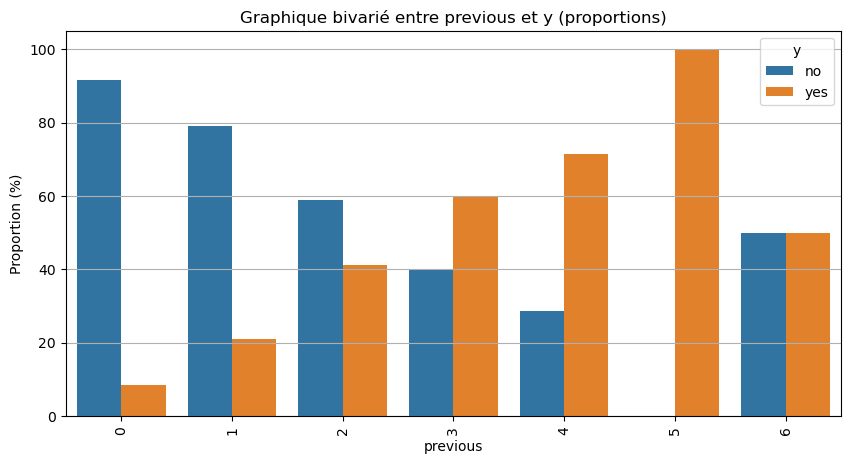

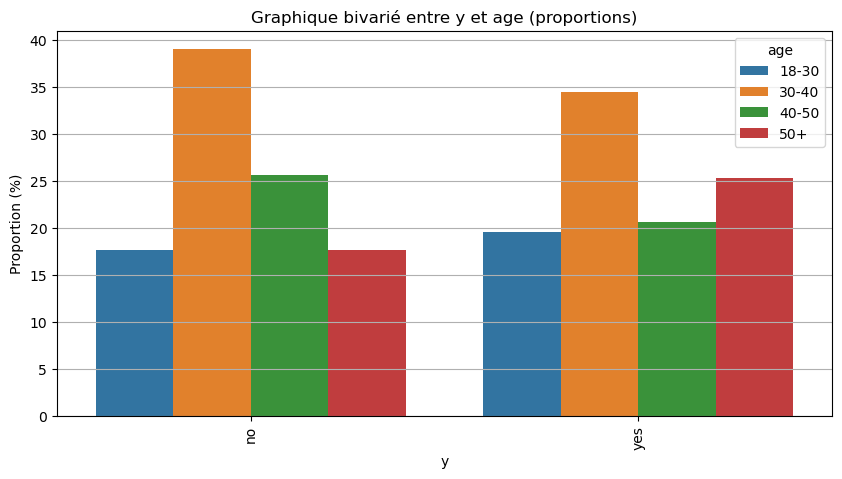

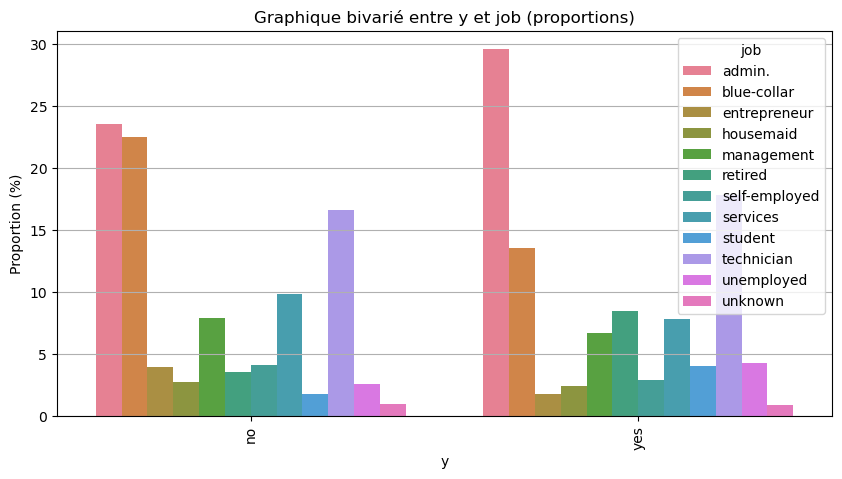

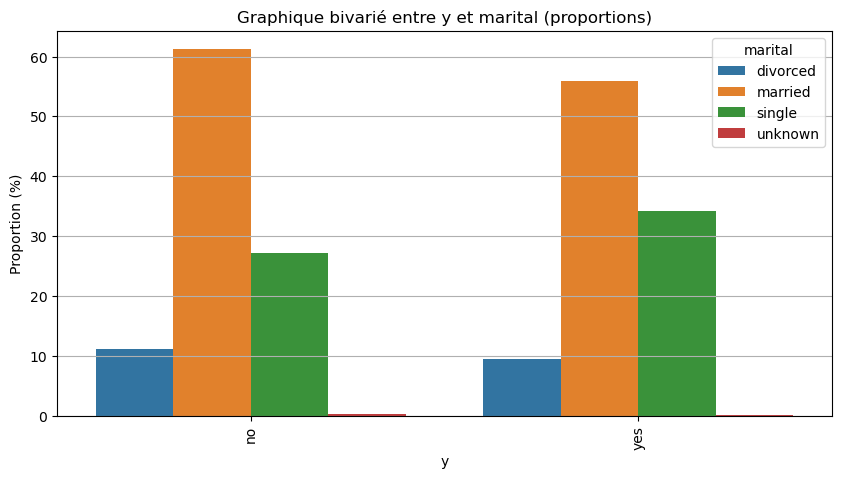

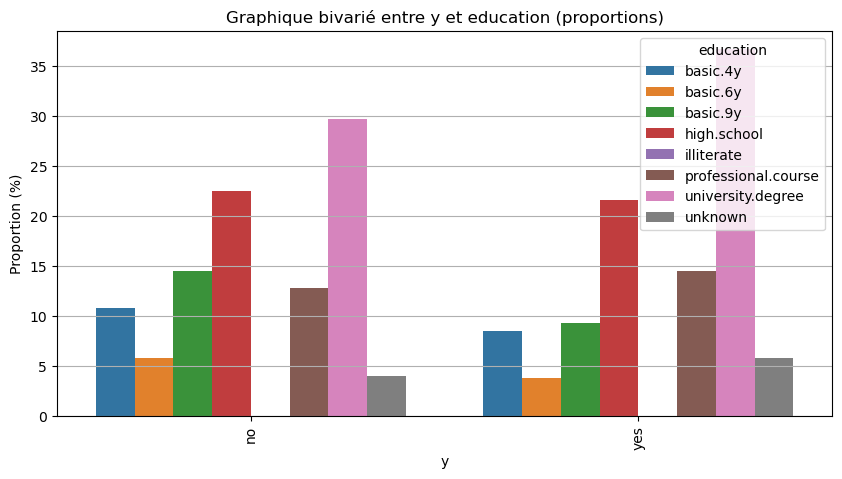

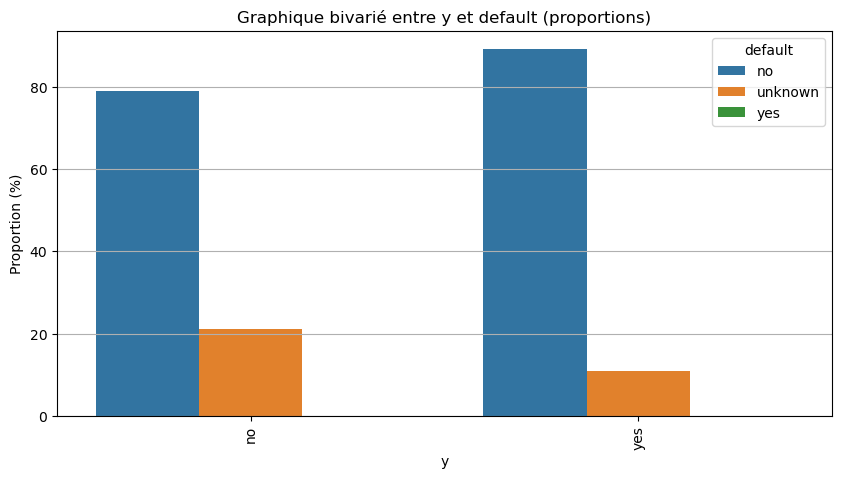

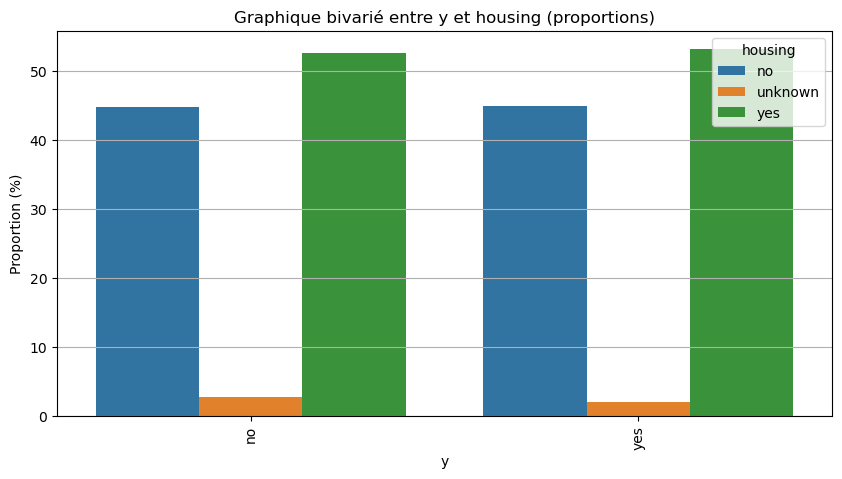

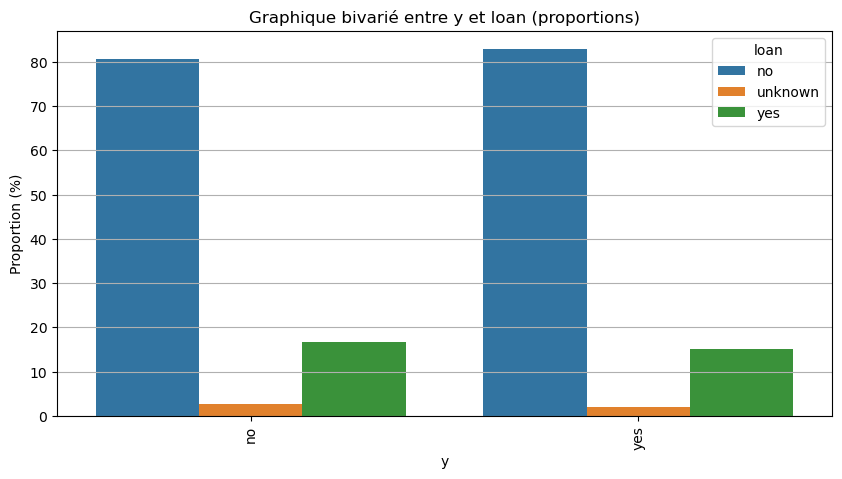

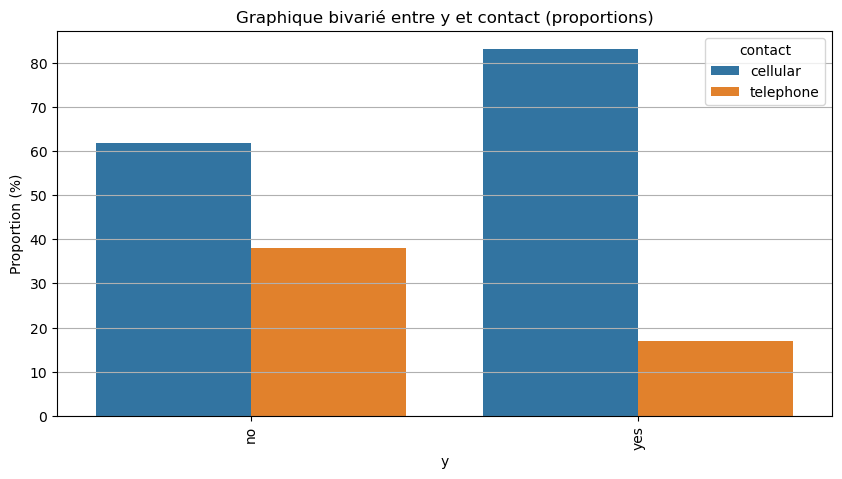

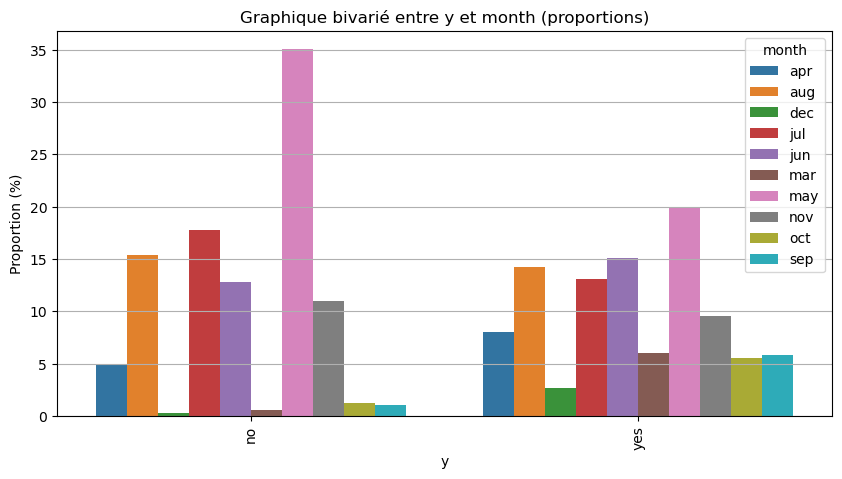

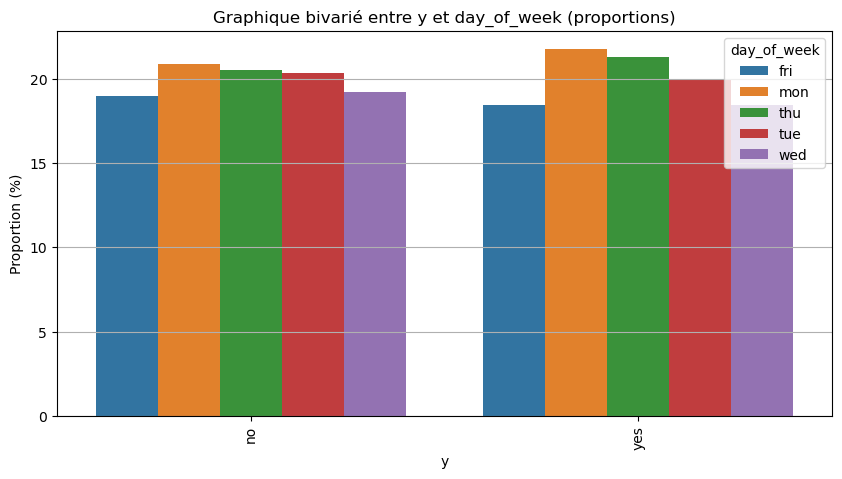

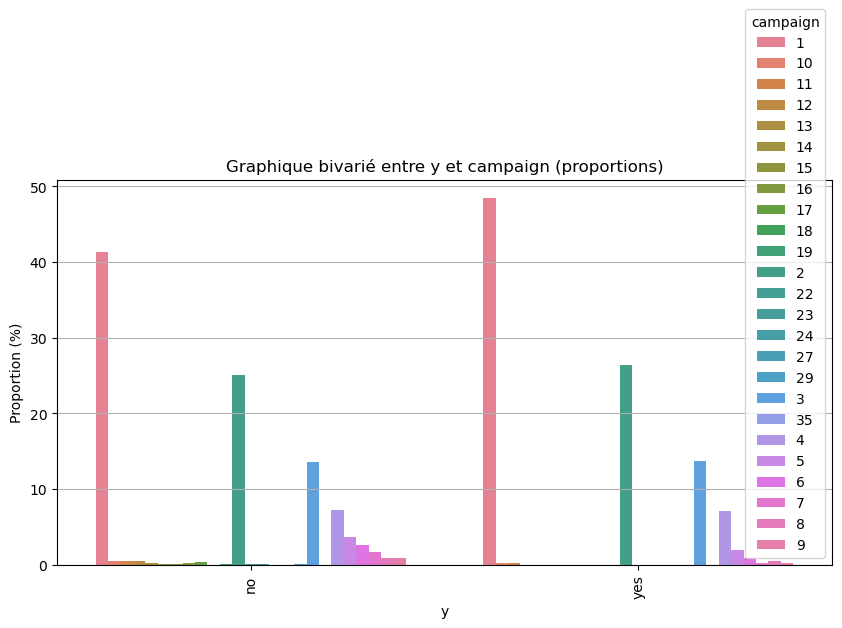

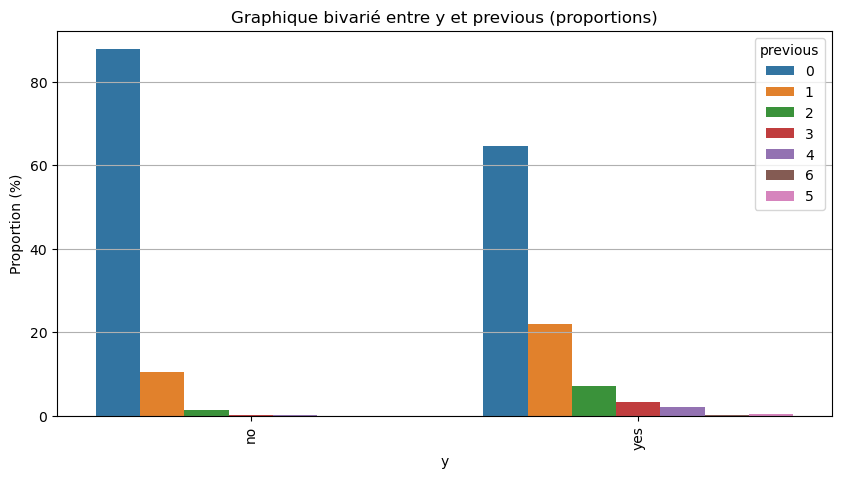

In [13]:
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            proportions = df.groupby([col1, col2]).size().reset_index(name='Count')
            proportions['Proportion'] = proportions['Count'] / proportions.groupby(col1)['Count'].transform('sum') * 100

            plt.figure(figsize=(10, 5))
            plt.grid()
            sns.barplot(x=col1, y='Proportion', hue=col2, data=proportions)
            plt.title(f"Graphique bivarié entre {col1} et {col2} (proportions)")
            plt.ylabel('Proportion (%)')
            plt.xticks(rotation=90)
            plt.show()